<a href="https://colab.research.google.com/github/aleksthegr8/MCF_projects/blob/main/ML_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import / install relevant Python packages
import numpy as np
from numpy import where
import pandas as pd
from pandas import set_option
import datetime as dt
import statsmodels.api as sm
from scipy.stats import (randint, loguniform)

from collections import Counter

from sklearn.datasets import make_blobs
from sklearn.datasets import make_multilabel_classification

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import (RFE, SelectFromModel)
from sklearn.model_selection import (KFold, GridSearchCV, RandomizedSearchCV, cross_val_score)
from sklearn import metrics
from sklearn.metrics import (classification_report, confusion_matrix)
from sklearn.svm import (SVC, LinearSVC)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import (DecisionTreeClassifier, plot_tree)
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('ggplot')
import seaborn as sns

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


### **1**

In [ ]:
# Import data 
data = pd.read_excel('default of credit card clients.xls')
data.head()

Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                           Y  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 25 columns]

In [ ]:
"we will use the describe and info fuction to get the initail feel for the data"

'we will use the describe and info fuction to get the initail feel for the data'

In [ ]:
data.describe()

Unnamed: 0     X1     X2     X3     X4     X5     X6     X7     X8  \
count       30001  30001  30001  30001  30001  30001  30001  30001  30001   
unique      30001     82      3      8      5     57     12     12     12   
top            ID  50000      2      2      2     29      0      0      0   
freq            1   3365  18112  14030  15964   1605  14737  15730  15764   

           X9  ...    X15    X16    X17    X18    X19    X20    X21    X22  \
count   30001  ...  30001  30001  30001  30001  30001  30001  30001  30001   
unique     12  ...  21549  21011  20605   7944   7900   7519   6938   6898   
top         0  ...      0      0      0      0      0      0      0      0   
freq    16455  ...   3195   3506   4020   5249   5396   5968   6408   6703   

          X23      Y  
count   30001  30001  
unique   6940      3  
top         0      0  
freq     7173  23364  

[4 rows x 25 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [ ]:
"we observe that there are no Nan"

'we observe that there are no Nan'

In [ ]:
#renaming and droping data to be congruent with our terminology#
data.drop('Unnamed: 0', axis = 1, inplace =True) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30001 non-null  object
 1   X2      30001 non-null  object
 2   X3      30001 non-null  object
 3   X4      30001 non-null  object
 4   X5      30001 non-null  object
 5   X6      30001 non-null  object
 6   X7      30001 non-null  object
 7   X8      30001 non-null  object
 8   X9      30001 non-null  object
 9   X10     30001 non-null  object
 10  X11     30001 non-null  object
 11  X12     30001 non-null  object
 12  X13     30001 non-null  object
 13  X14     30001 non-null  object
 14  X15     30001 non-null  object
 15  X16     30001 non-null  object
 16  X17     30001 non-null  object
 17  X18     30001 non-null  object
 18  X19     30001 non-null  object
 19  X20     30001 non-null  object
 20  X21     30001 non-null  object
 21  X22     30001 non-null  object
 22  X23     30001 non-null

In [ ]:
data.rename(columns={'Y':'DEFAULT'}, inplace=True)

In [ ]:
data.head()

X1   X2         X3        X4   X5     X6     X7     X8     X9  \
0  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
1      20000    2          2         1   24      2      2     -1     -1   
2     120000    2          2         2   26     -1      2      0      0   
3      90000    2          2         2   34      0      0      0      0   
4      50000    2          2         1   37      0      0      0      0   

     X10  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -2  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21       X22       X23                     DEFAULT  
0  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1         0         0         0                           1  
2      1000         0      2000                           1  
3      1000      1000      5000                           0  
4      1100      1069      1000                           0  

[5 rows x 24 columns]

In [ ]:
#checking for descrepencies#
# EDA: Print unique values for selected features
print('Gender (1 = male; 2 = female):')
print(data['X2'].unique())
print('-'*100)
print('Education (1 = graduate school; 2 = university; 3 = high school; 4 = others):')
print(data['X3'].unique())
print('-'*100)
print('Marital status (1 = married; 2 = single; 3 = others):')
print(data['X4'].unique())
print('-'*100)
print('Payment status (-1 = pay duly; K = payment delay for K months, for K=1,2,...,8; 9 = payment delay for nine months and above):')
print(data['X6'].unique())
print(data['X7'].unique())
print(data['X8'].unique())
print(data['X9'].unique())
print(data['X10'].unique())
print(data['X11'].unique())
print('-'*100)

Gender (1 = male; 2 = female):
['SEX' 2 1]
----------------------------------------------------------------------------------------------------
Education (1 = graduate school; 2 = university; 3 = high school; 4 = others):
['EDUCATION' 2 1 3 5 4 6 0]
----------------------------------------------------------------------------------------------------
Marital status (1 = married; 2 = single; 3 = others):
['MARRIAGE' 1 2 3 0]
----------------------------------------------------------------------------------------------------
Payment status (-1 = pay duly; K = payment delay for K months, for K=1,2,...,8; 9 = payment delay for nine months and above):
['PAY_0' 2 -1 0 -2 1 3 4 8 7 5 6]
['PAY_2' 2 0 -1 -2 3 5 7 4 1 6 8]
['PAY_3' -1 0 2 -2 3 4 6 7 1 5 8]
['PAY_4' -1 0 -2 2 3 4 5 7 6 1 8]
['PAY_5' -2 0 -1 2 3 5 4 7 8 6]
['PAY_6' -2 2 0 -1 3 6 4 7 8 5]
----------------------------------------------------------------------------------------------------


In [ ]:
#we have a discrepency in the data what does 0 mean for education,0 and -2 for pay and marital status#

In [ ]:
# we will try to corect the data for education and marriage
data['X3']=np.where(data['X3'] == 5, 4, data['X3'])
data['X3']=np.where(data['X3'] == 6, 4, data['X3'])
data['X3']=np.where(data['X3'] == 0, 4, data['X3'])
data['X4']=np.where(data['X4'] == 0, 3, data['X4'])

In [ ]:
data_of_variable=data.iloc[1: , :].astype(int)
data_of_variable

X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  ...    X15    X16    X17  \
1       20000   2   2   1  24   2   2  -1  -1   -2  ...      0      0      0   
2      120000   2   2   2  26  -1   2   0   0    0  ...   3272   3455   3261   
3       90000   2   2   2  34   0   0   0   0    0  ...  14331  14948  15549   
4       50000   2   2   1  37   0   0   0   0    0  ...  28314  28959  29547   
5       50000   1   2   1  57  -1   0  -1   0    0  ...  20940  19146  19131   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...    ...    ...    ...   
29996  220000   1   3   1  39   0   0   0   0    0  ...  88004  31237  15980   
29997  150000   1   3   2  43  -1  -1  -1  -1    0  ...   8979   5190      0   
29998   30000   1   2   2  37   4   3   2  -1    0  ...  20878  20582  19357   
29999   80000   1   3   1  41   1  -1   0   0    0  ...  52774  11855  48944   
30000   50000   1   2   1  46   0   0   0   0    0  ...  36535  32428  15313   

         X18    X19    X20   X21    X22   X23  DEFAULT  
1          0    689      0     0      0     0        1  
2          0   1000   1000  1000      0  2000        1  
3       1518   1500   1000  1000   1000  5000        0  
4       2000   2019   1200  1100   1069  1000        0  
5       2000  36681  10000  9000    689   679        0  
...      ...    ...    ...   ...    ...   ...      ...  
29996   8500  20000   5003  3047   5000  1000        0  
29997   1837   3526   8998   129      0     0        0  
29998      0      0  22000  4200   2000  3100        1  
29999  85900   3409   1178  1926  52964  1804        1  
30000   2078   1800   1430  1000   1000  1000        1  

[30000 rows x 24 columns]

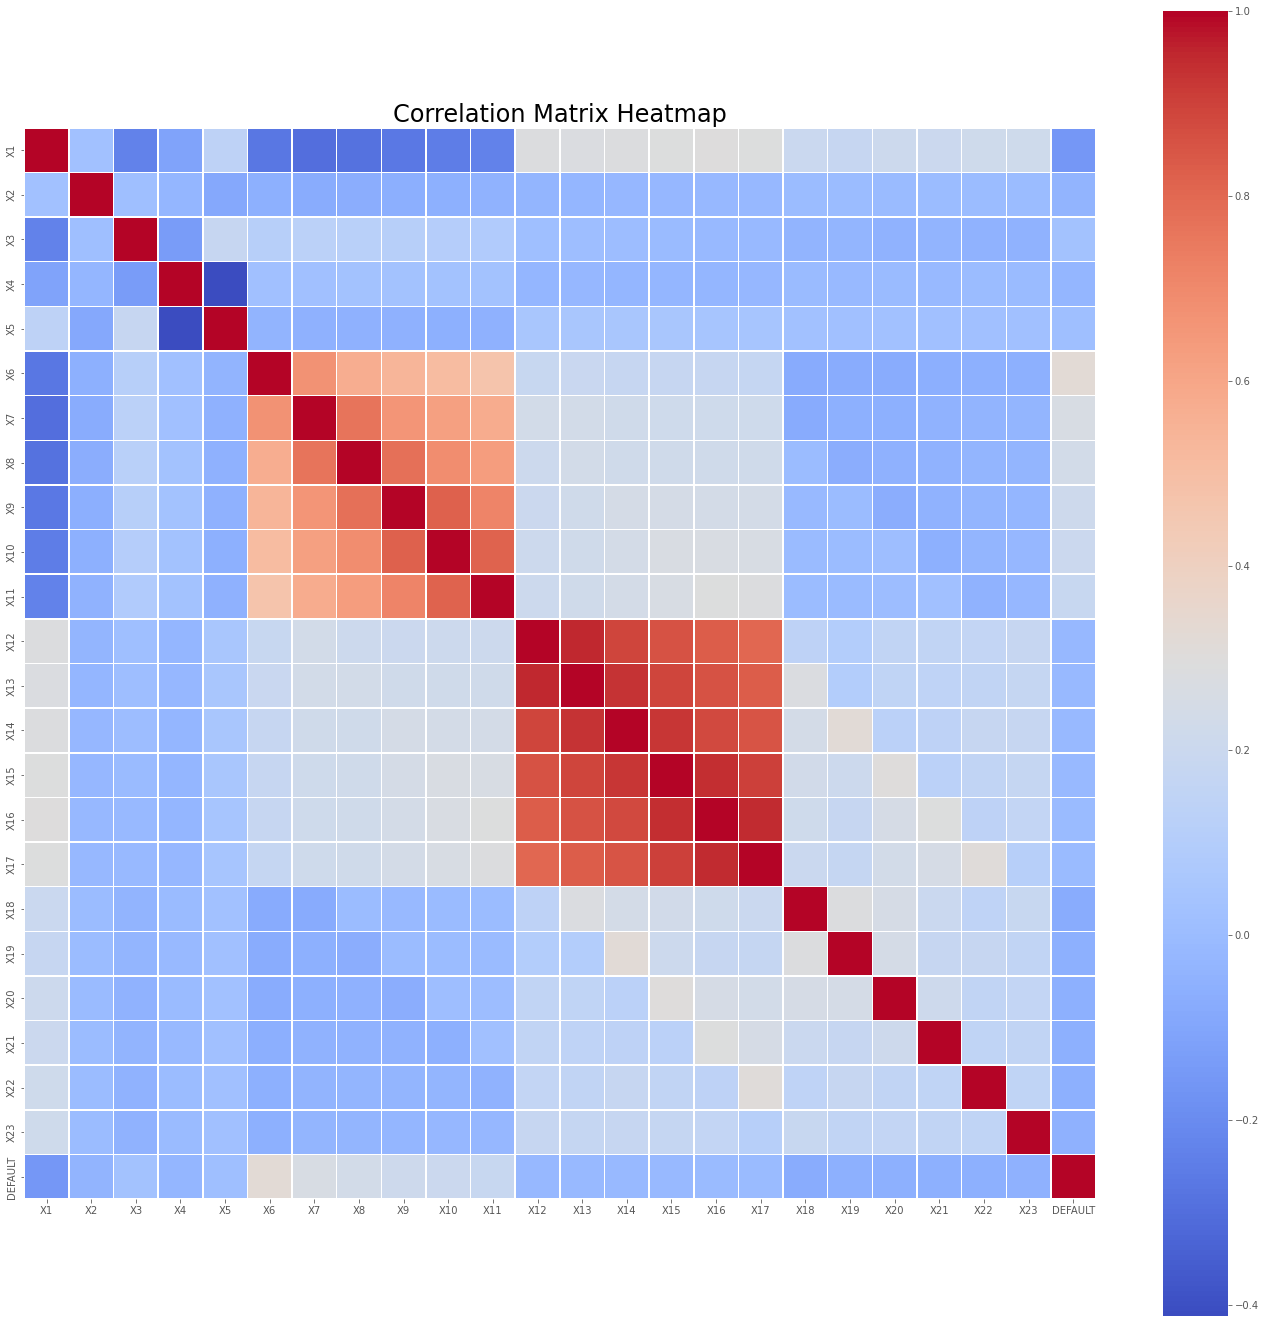

In [ ]:
corr = data_of_variable.corr() 
fig, ax = plt.subplots(figsize=(24,24))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True, cmap='coolwarm', linewidths=.5, ax=ax)
plt.title('Correlation Matrix Heatmap', size=24)
plt.show()

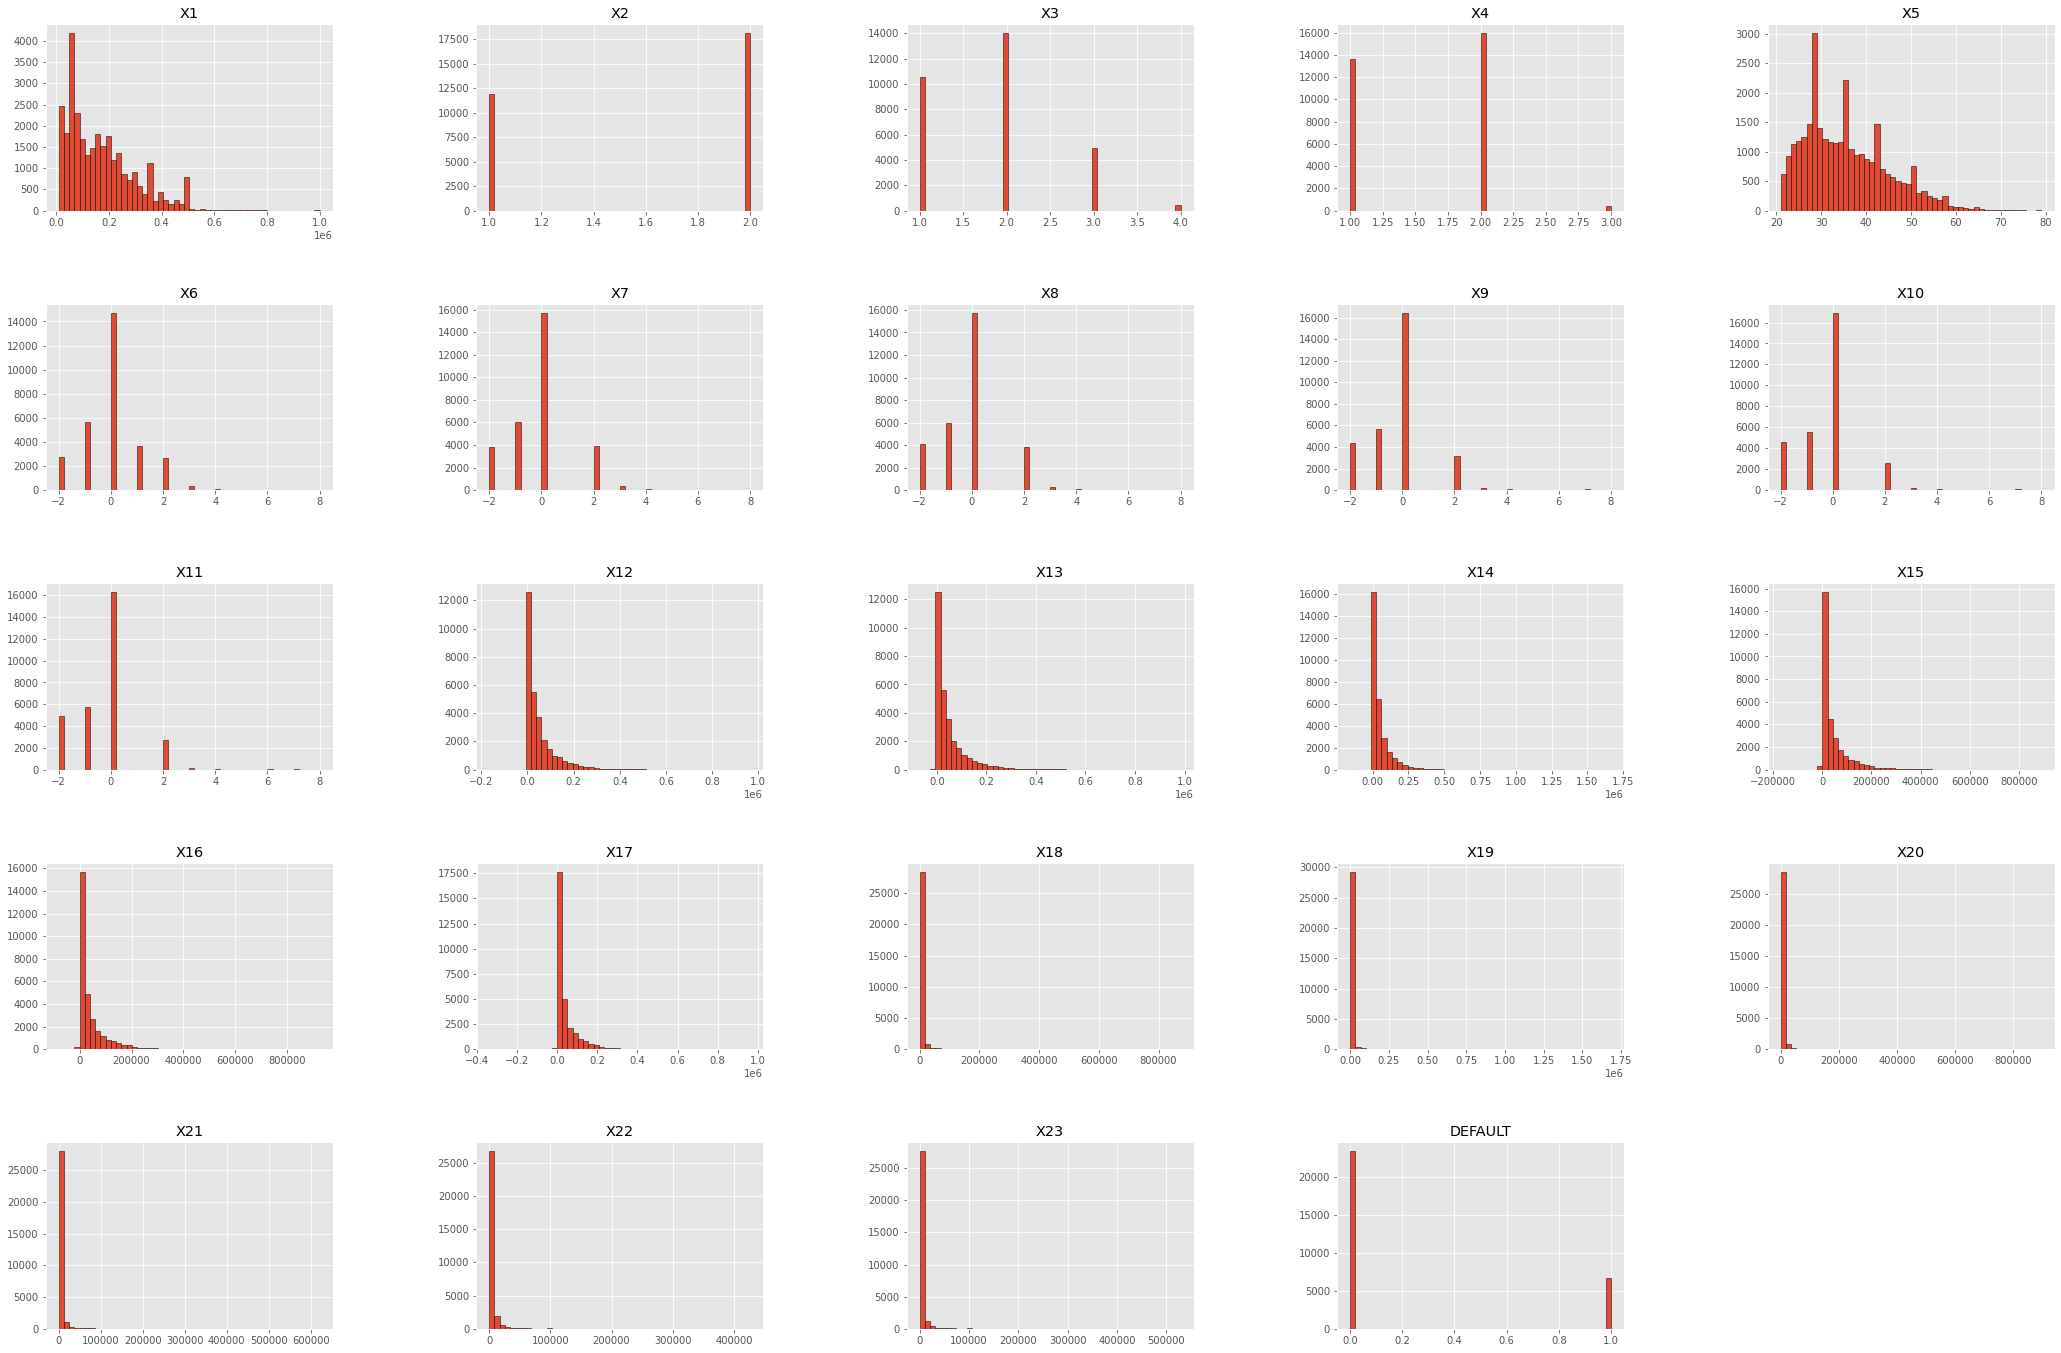

In [ ]:
data_of_variable.hist(figsize=(36, 24), bins=50, edgecolor='black')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()
#we observe that there is a lot of grouping of the data#

In [ ]:
#defining the variables#
X = data_of_variable.drop('DEFAULT', axis = 1, inplace = False)
y = data_of_variable['DEFAULT']

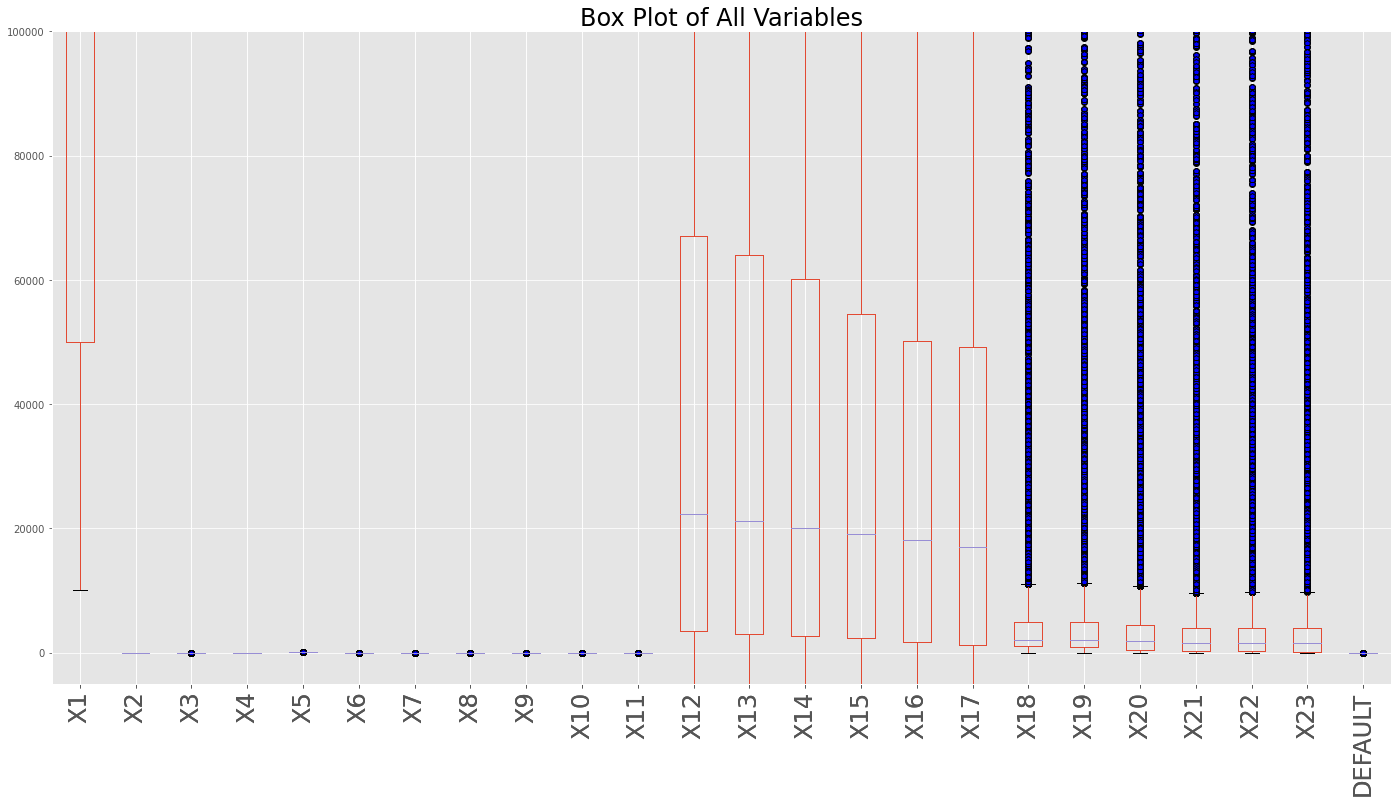

In [ ]:
## EDA: Box plot of all variables
plt.figure(figsize=(24,12))
ax = data_of_variable.boxplot(data_of_variable.columns.name, rot=90)
outliers = dict(markerfacecolor='b', marker='p')
ax= data_of_variable.boxplot(data_of_variable.columns.name, rot=90, flierprops=outliers)
plt.xticks(size=24)
plt.title('Box Plot of All Variables', size=24)
ax.set_ylim([-5000,100000])
plt.show()

In [ ]:
#In the data the variables are of diffrent scale we will proceed to standardize them.#
#In addtion the data has a lot of outliers. #

In [ ]:
X_stand = (X - X.mean()) / (X.std())  


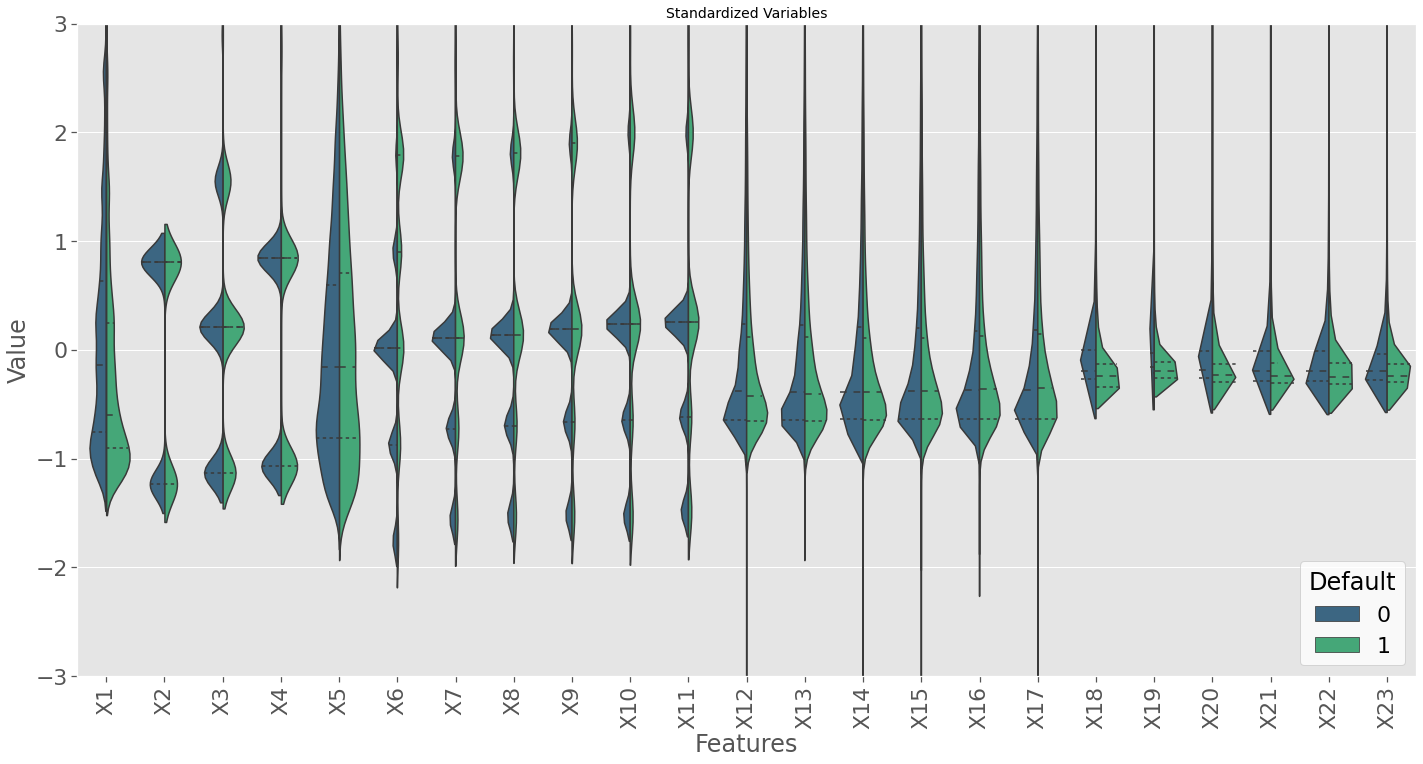

In [ ]:
scaled = pd.concat([y,X_stand.iloc[:,:]],axis=1)
scaled = pd.melt(scaled, id_vars='DEFAULT', var_name='Features', value_name='Value')

plt.figure(figsize=(24,12))
sns.set_context('notebook', font_scale=2)
ax = sns.violinplot(y='Value', x='Features', hue='DEFAULT', data=scaled, split=True, 
                    inner='quart', palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.legend(loc=4, title= 'Default', facecolor='white')
plt.ylim([-3,3])
plt.title('Standardized Variables', size=14)
plt.show()

In [ ]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_stand, y, test_size=0.333, 
                                                                                stratify=y, random_state=42)

In [ ]:
#we will try to use the pricipal componets to transform the data(because of correlation in the data),#
#we will also continue to work with the scaled data for comparison i  the end#

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)#lets try with 5 components
X_train_pca=pca.fit_transform(X_scaled_train)
X_test_pca=pca.fit_transform(X_scaled_test)

In [ ]:
# Recursive feature selection (rough estimate)
n_features = 5
logit = LogisticRegression()
RFE_scaled = RFE(estimator=logit,n_features_to_select=n_features,step=1)
fit_scaled  = RFE_scaled.fit(X_scaled_train, y_scaled_train)

print('Number of features:', fit_scaled.n_features_)
print('Selected features:', fit_scaled.support_)
print('Ranking of model features:', fit_scaled.ranking_)

score_scaled = RFE_scaled.score(X_stand,y)
print('Standardized model score with selected features is: %f (%f)' % (score_scaled.mean(), score_scaled.std()))

feature_names = np.array(X.columns)
print('Most important features (RFE): %s'% feature_names[RFE_scaled.support_])

Number of features: 5
Selected features: [False False False False False  True False  True False False False  True
 False False False False False  True  True False False False False]
Ranking of model features: [ 4 11  7  5  8  1  3  1  6 15 13  1 14  2 19  9 16  1  1 18 10 17 12]
Standardized model score with selected features is: 0.809433 (0.000000)
Most important features (RFE): ['X6' 'X8' 'X12' 'X18' 'X19']


In [ ]:
#now for pca#
logit = LogisticRegression()
logit.fit(X_train_pca,y_scaled_train)
logit.coef_




array([[ 0.06005119, -0.40140022, -0.17877371, -0.01794157, -0.10437655]])

In [ ]:
logit.score(X_train_pca,y_scaled_train)

0.7977011494252874

In [ ]:
X_scaled_train[['X6','X8','X12','X18','X19']]

X6        X8       X12       X18       X19
11583  0.014860  0.138862  0.006759 -0.218953 -0.213584
6644   0.014860  1.809891 -0.493324 -0.150549 -0.256985
10610  0.014860  0.138862  0.252997 -0.202471 -0.170183
23915  0.014860  0.138862 -0.426577 -0.263449 -0.199262
9668   0.014860  0.138862 -0.502545 -0.247631 -0.157119
...         ...       ...       ...       ...       ...
25781  0.014860 -1.532166 -0.550307 -0.341936 -0.256985
13922  0.014860  0.138862  0.829931 -0.088363 -0.079041
3795   0.014860  0.138862  0.333705 -0.118550 -0.169185
27566  0.904697 -0.696652 -0.695630 -0.341936 -0.219660
27127 -0.874977 -0.696652 -0.678709 -0.268460 -0.242316

[20010 rows x 5 columns]

In [ ]:
#not much of a diffrence we will try to see who predicts better #

In [ ]:
# searching for optimal hyper-parameters for the train sample
n_cv_logit = 5

# Define the maximum number of iterations
n_max_iter = 500

# Create an instance of the class LogisticRegression
logit_model = LogisticRegression(max_iter=n_max_iter)

# Define the search space for the hyperparameters
search_space = dict()
search_space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
search_space['solver']  = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
search_space['C']       = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# Create an instance of the class GridSearchCV with desired characteristics
logit_grid_search_cv_original = GridSearchCV(estimator=logit_model, 
                                             param_grid=search_space, 
                                             scoring='accuracy', 
                                             cv=n_cv_logit, 
                                             n_jobs=-1)

# Run the search algorithm and summarize resuts 
logit_grid_search_cv_original.fit(X_scaled_train[['X6','X8','X12','X18','X19']], y_scaled_train)

print(f'Best score: {logit_grid_search_cv_original.best_score_:.4f}')
print('Best hyperparameters: %s' % logit_grid_search_cv_original.best_params_)

Best score: 0.8100
Best hyperparameters: {'C': 1e-05, 'penalty': 'none', 'solver': 'newton-cg'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is 

In [ ]:
# searching for optimal hyper-parameters for the train sample in the case for pca
n_cv_logit = 5

# Define the maximum number of iterations
n_max_iter = 500

# Create an instance of the class LogisticRegression
logit_model = LogisticRegression(max_iter=n_max_iter)

# Define the search space for the hyperparameters
search_space = dict()
search_space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
search_space['solver']  = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
search_space['C']       = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# Create an instance of the class GridSearchCV with desired characteristics
logit_grid_search_cv_original = GridSearchCV(estimator=logit_model, 
                                             param_grid=search_space, 
                                             scoring='accuracy', 
                                             cv=n_cv_logit, 
                                             n_jobs=-1)

# Run the search algorithm and summarize resuts 
logit_grid_search_cv_original.fit(X_train_pca, y_scaled_train)

print(f'Best score: {logit_grid_search_cv_original.best_score_:.4f}')
print('Best hyperparameters: %s' % logit_grid_search_cv_original.best_params_)

Best score: 0.8037
Best hyperparameters: {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is 

In [ ]:
#it seems that the standard approach with stadardized features seems to work better in insample fitting #
#we will proceed to prediction#

In [ ]:
logit_ccd_original = LogisticRegression(penalty='none', 
                                        solver='newton-cg', 
                                        C= 1e-05)

# Fit the model
logit_ccd_original.fit(X_scaled_train[['X6','X8','X12','X18','X19']], y_scaled_train)
print('Logistic regression coefficients:')
print(logit_ccd_original.coef_.T)
print(100*'-')

# Predict outcomes in the training and testing subsamples and calculate accuracy
y_pred_train = logit_ccd_original.predict(X_scaled_train[['X6','X8','X12','X18','X19']])


print(f'Accuracy (train): {metrics.accuracy_score(y_pred_train,y_scaled_train):.4f}')
print(100*'-')

y_pred_test  = logit_ccd_original.predict(X_scaled_test[['X6','X8','X12','X18','X19']])


print(f'Accuracy (test): {metrics.accuracy_score(y_pred_test,y_scaled_test):.4f}')
print(100*'-')

## Calculate and display cross-validation scores for the training and testing subsamples
logit_cv_scores = cross_val_score(logit_ccd_original, X_scaled_train, y_scaled_train, cv=n_cv_logit)
print(f'Average CV score (+/- one standard deviation): {logit_cv_scores.mean():.4f} +/- {logit_cv_scores.std():.4f}')

print(classification_report(y_scaled_train, y_pred_train))
print(classification_report(y_scaled_test, y_pred_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


Logistic regression coefficients:
[[ 0.71290549]
 [ 0.24818286]
 [-0.17990909]
 [-0.18600527]
 [-0.25466065]]
----------------------------------------------------------------------------------------------------
Accuracy (train): 0.8100
----------------------------------------------------------------------------------------------------
Accuracy (test): 0.8081
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


Average CV score (+/- one standard deviation): 0.8113 +/- 0.0034
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     15584
           1       0.72      0.23      0.35      4426

    accuracy                           0.81     20010
   macro avg       0.77      0.60      0.62     20010
weighted avg       0.80      0.81      0.77     20010

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7780
           1       0.70      0.23      0.35      2210

    accuracy                           0.81      9990
   macro avg       0.76      0.60      0.62      9990
weighted avg       0.79      0.81      0.77      9990



In [ ]:
logit_ccd_original_pca = LogisticRegression(penalty='l2', 
                                        solver='liblinear', 
                                        C=0.0001)

# Fit the model
logit_ccd_original_pca.fit(X_train_pca, y_scaled_train)
print('Logistic regression coefficients:')
print(logit_ccd_original_pca.coef_.T)
print(100*'-')

# Predict outcomes in the training and testing subsamples and calculate accuracy
y_pred_train_pca = logit_ccd_original_pca.predict(X_train_pca)


print(f'Accuracy (train): {metrics.accuracy_score(y_pred_train,y_scaled_train):.4f}')
print(100*'-')

y_pred_test_pca  = logit_ccd_original_pca.predict(X_test_pca)


print(f'Accuracy (test): {metrics.accuracy_score(y_pred_test,y_scaled_test):.4f}')
print(100*'-')

## Calculate and display cross-validation scores for the training and testing subsamples
logit_cv_scores = cross_val_score(logit_ccd_original_pca, X_scaled_train, y_scaled_train, cv=n_cv_logit)
print(f'Average CV score (+/- one standard deviation): {logit_cv_scores.mean():.4f} +/- {logit_cv_scores.std():.4f}')

print(classification_report(y_scaled_train, y_pred_train))
print(classification_report(y_scaled_test, y_pred_test))

Logistic regression coefficients:
[[ 0.04128927]
 [-0.16900838]
 [-0.00922722]
 [ 0.02469287]
 [-0.02157295]]
----------------------------------------------------------------------------------------------------
Accuracy (train): 0.8100
----------------------------------------------------------------------------------------------------
Accuracy (test): 0.8081
----------------------------------------------------------------------------------------------------
Average CV score (+/- one standard deviation): 0.8111 +/- 0.0054
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     15584
           1       0.72      0.23      0.35      4426

    accuracy                           0.81     20010
   macro avg       0.77      0.60      0.62     20010
weighted avg       0.80      0.81      0.77     20010

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7780
           1       0.70      0.23    

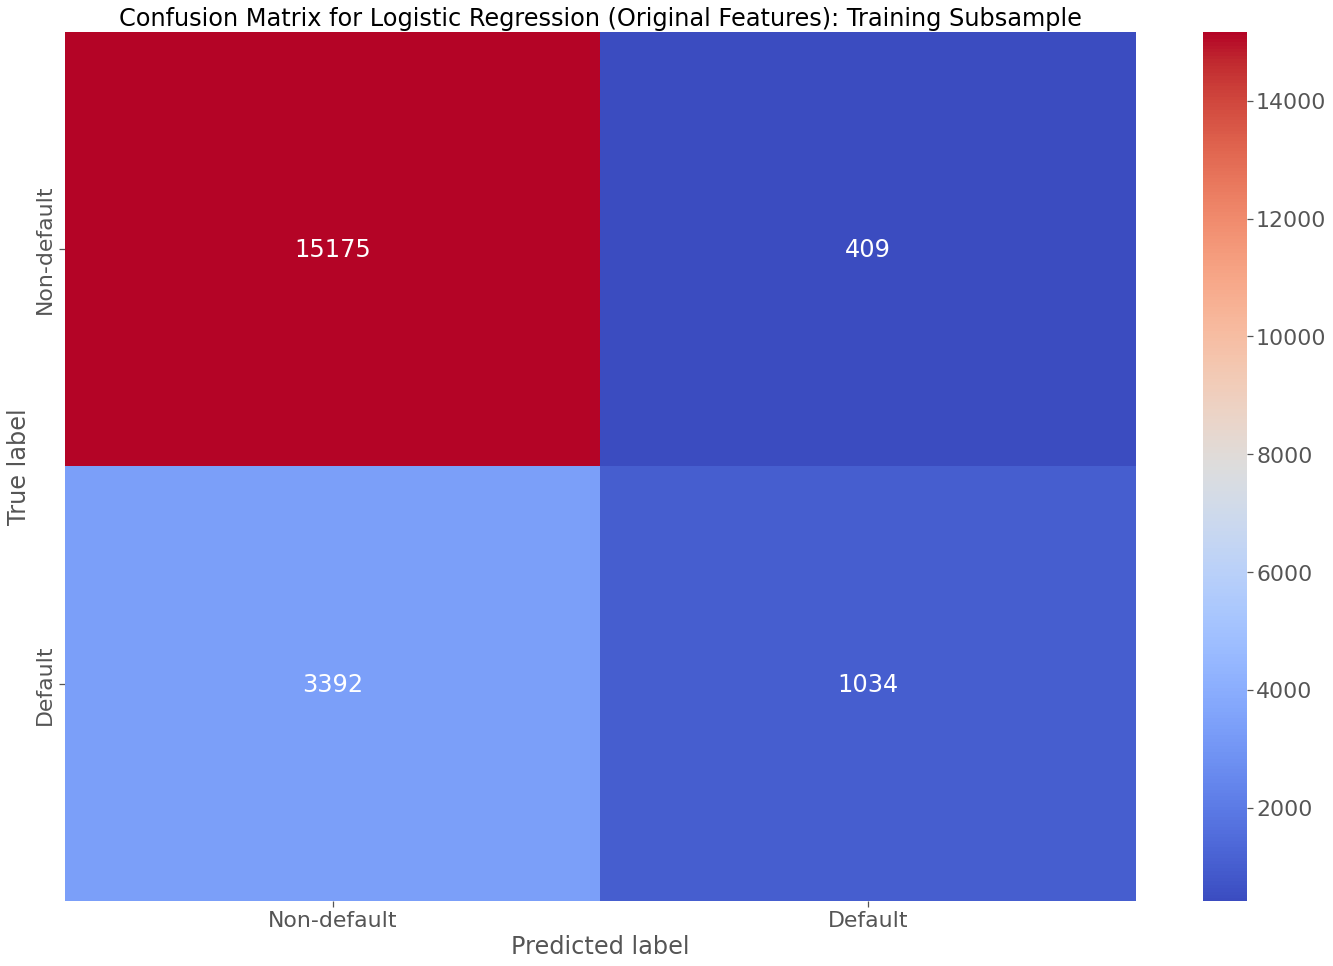

In [ ]:
#it seems that the standardized approach seems to give the same accuracy as the PCA transformation#
#we will proceed to the confusion matrix
# Plot the confusion matrix (training subsample)
plt.figure(figsize=(24,16))
confusion_train = confusion_matrix(y_scaled_train,y_pred_train)
sns.heatmap(confusion_train, annot=True, annot_kws={'size':24}, cmap='coolwarm', fmt='d', 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label', size=24)
plt.xlabel('Predicted label', size=24)
plt.title('Confusion Matrix for Logistic Regression (Original Features): Training Subsample', size=24)
plt.show()#

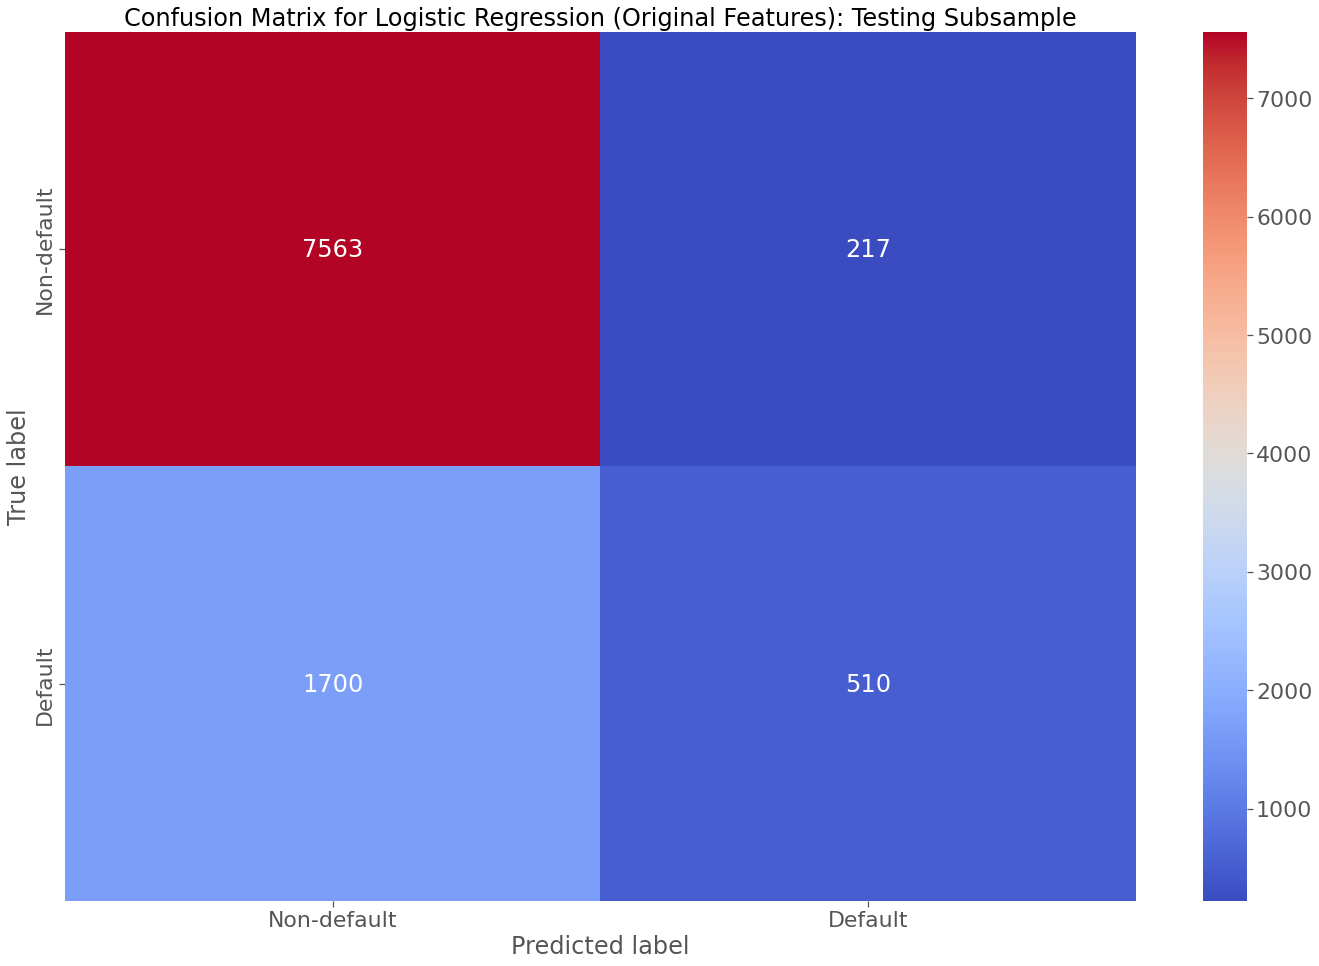

In [ ]:
# Plot the confusion matrix (testing subsample)
plt.figure(figsize=(24,16))
confusion_test = confusion_matrix(y_scaled_test,y_pred_test)
sns.heatmap(confusion_test, annot=True, annot_kws={'size':24}, cmap='coolwarm', fmt='d', 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label', size=24)
plt.xlabel('Predicted label', size=24)
plt.title('Confusion Matrix for Logistic Regression (Original Features): Testing Subsample', size=24)
plt.show()

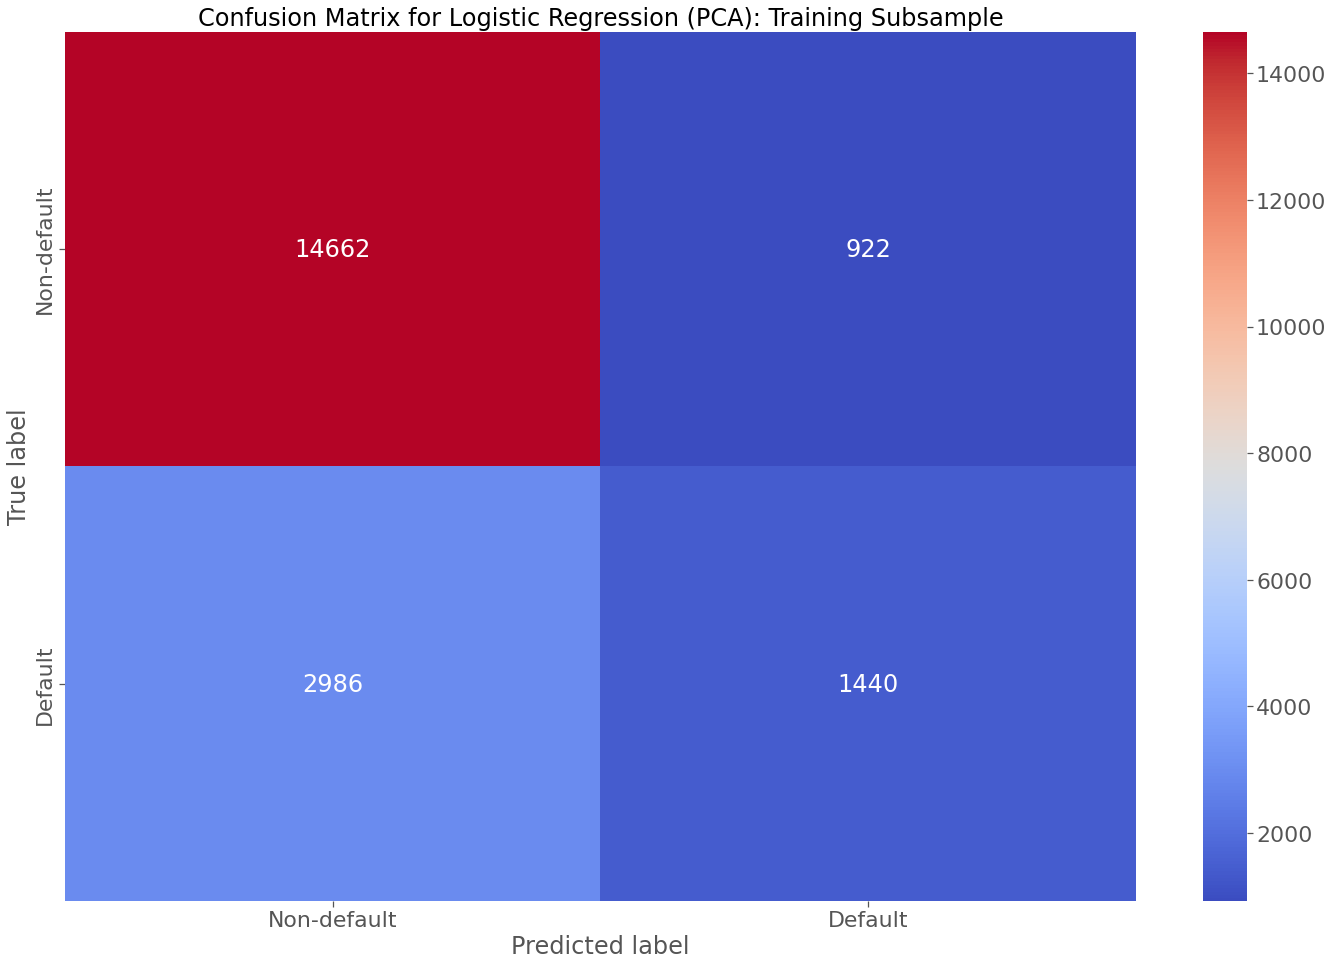

In [ ]:
#lets check out the pca example#
# Plot the confusion matrix (training subsample)
plt.figure(figsize=(24,16))
confusion_train = confusion_matrix(y_scaled_train,y_pred_train_pca)
sns.heatmap(confusion_train, annot=True, annot_kws={'size':24}, cmap='coolwarm', fmt='d', 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label', size=24)
plt.xlabel('Predicted label', size=24)
plt.title('Confusion Matrix for Logistic Regression (PCA): Training Subsample', size=24)
plt.show()#

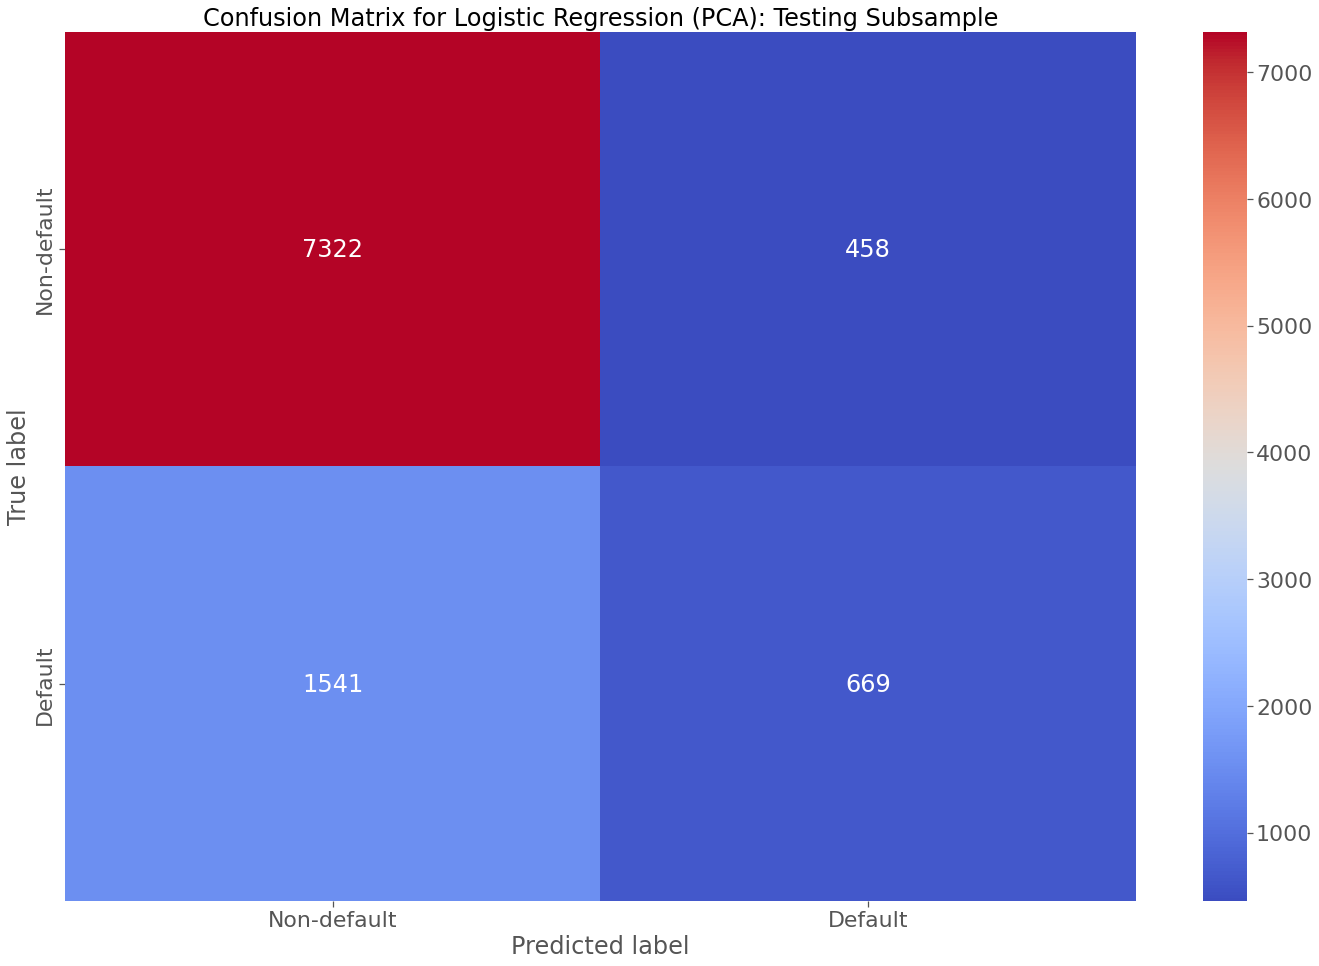

In [ ]:

# Plot the confusion matrix (testing subsample)
plt.figure(figsize=(24,16))
confusion_test = confusion_matrix(y_scaled_test,y_pred_test_pca)
sns.heatmap(confusion_test, annot=True, annot_kws={'size':24}, cmap='coolwarm', fmt='d', 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label', size=24)
plt.xlabel('Predicted label', size=24)
plt.title('Confusion Matrix for Logistic Regression (PCA): Testing Subsample', size=24)
plt.show()

In [ ]:

#the PCA made less mistakes in pred non default and true default field and more accuratly predicted the true defaults.#
#The reason why it was over all worse is of the remaining two fields it can be argued that the PCA is a more conservative approach in this case (and is safer bet),#
#but would probally lead to the bank giving less loans and not making hypotheticly as much money #
#furhter analysis would be requaired to deduce the optimal method#

In [ ]:
X_scaled_train[['X6','X8','X12','X18','X19']]

X6        X8       X12       X18       X19
11583  0.014860  0.138862  0.006759 -0.218953 -0.213584
6644   0.014860  1.809891 -0.493324 -0.150549 -0.256985
10610  0.014860  0.138862  0.252997 -0.202471 -0.170183
23915  0.014860  0.138862 -0.426577 -0.263449 -0.199262
9668   0.014860  0.138862 -0.502545 -0.247631 -0.157119
...         ...       ...       ...       ...       ...
25781  0.014860 -1.532166 -0.550307 -0.341936 -0.256985
13922  0.014860  0.138862  0.829931 -0.088363 -0.079041
3795   0.014860  0.138862  0.333705 -0.118550 -0.169185
27566  0.904697 -0.696652 -0.695630 -0.341936 -0.219660
27127 -0.874977 -0.696652 -0.678709 -0.268460 -0.242316

[20010 rows x 5 columns]

In [ ]:
summary = pd.DataFrame(columns=['Model name', 'AUC Train', 'AUC Test', 'F1 Train', 'F1 Test'])
summary

Empty DataFrame
Columns: [Model name, AUC Train, AUC Test, F1 Train, F1 Test]
Index: []

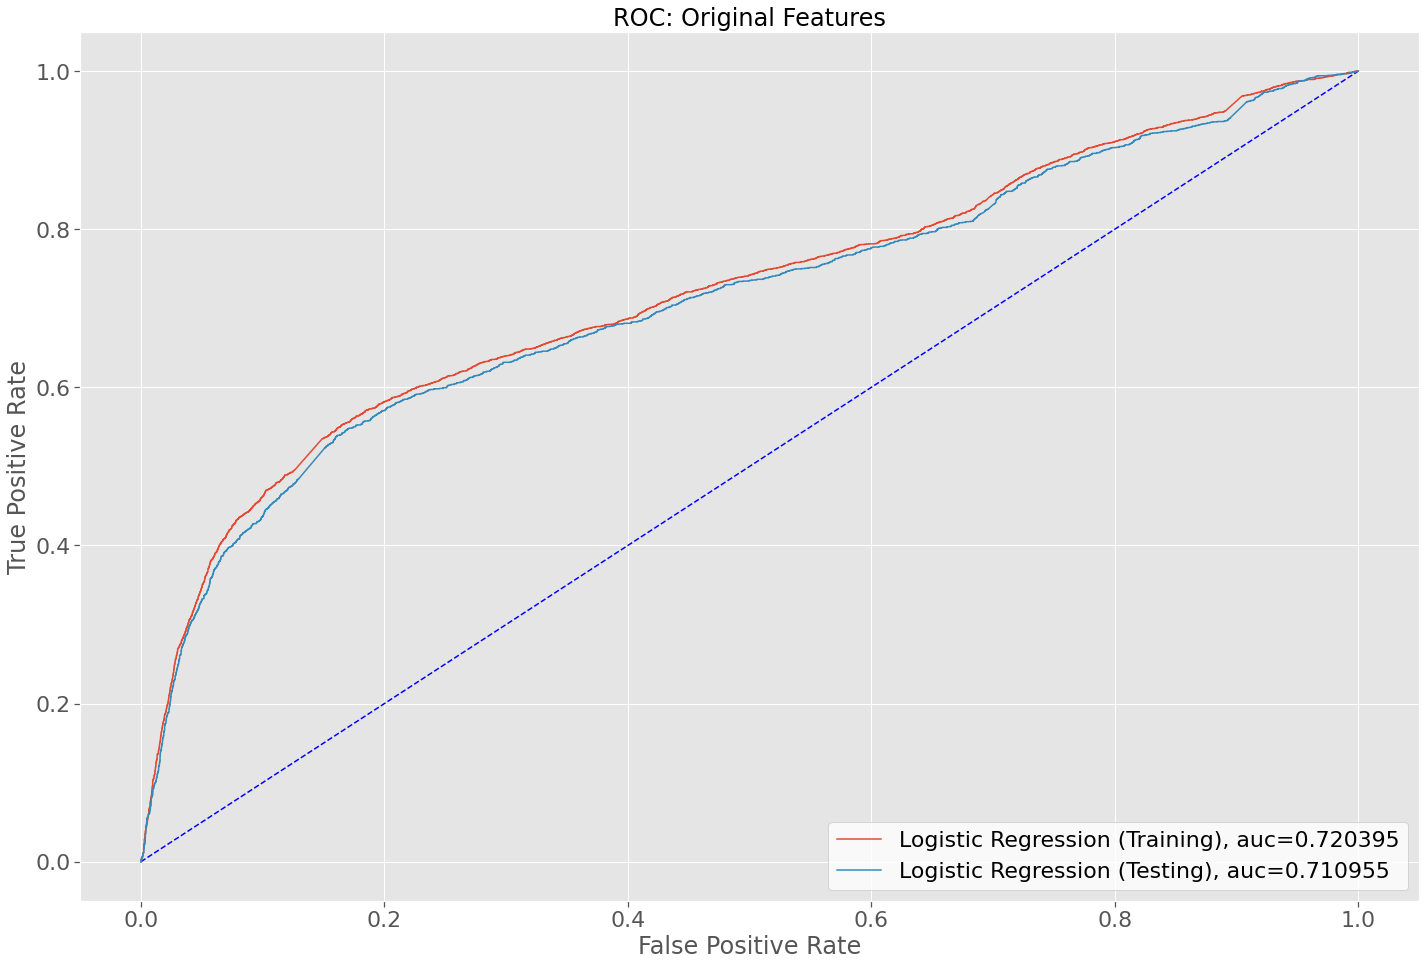

In [ ]:
#ROC and AUC for standarized approach
y_pred_proba_train      = logit_ccd_original.predict_proba(X_scaled_train[['X6','X8','X12','X18','X19']])[::,1]
fpr_train, tpr_train, threshold_train = metrics.roc_curve(y_scaled_train, y_pred_proba_train)
auc_train               = metrics.roc_auc_score(y_scaled_train, y_pred_proba_train)

y_pred_proba_test      = logit_ccd_original.predict_proba(X_scaled_test[['X6','X8','X12','X18','X19']])[::,1]
fpr_test, tpr_test, threshold_test  = metrics.roc_curve(y_scaled_test, y_pred_proba_test)
auc_test               = metrics.roc_auc_score(y_scaled_test, y_pred_proba_test)

# Plot the ROC curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [0, 1], 'b--')
plt.plot(fpr_train, tpr_train, label='Logistic Regression (Training), auc='+str(round(auc_train,6)))
plt.plot(fpr_test, tpr_test, label='Logistic Regression (Testing), auc='+str(round(auc_test,6)))
plt.legend(loc=4, facecolor='white')
plt.xlabel('False Positive Rate', size=24)
plt.ylabel('True Positive Rate', size=24)
plt.title('ROC: Original Features', size=24)
plt.show()

model_summary_lr = {'Model name': 'Logistic Regression', 'AUC Train': auc_train, 'AUC Test': auc_test}

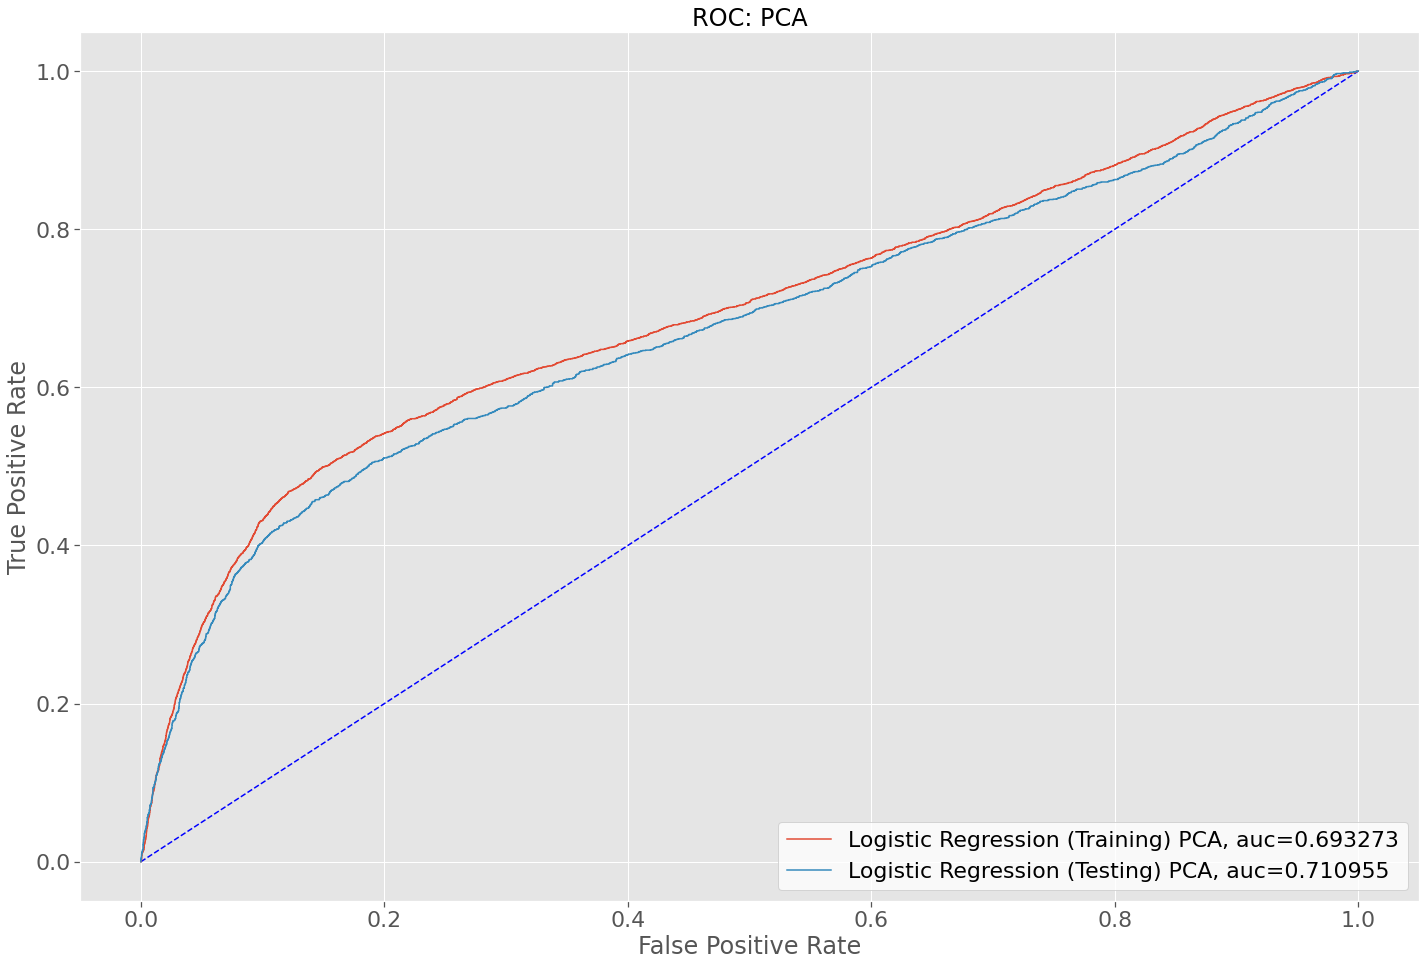

In [ ]:
#ROC and AUC for pca
y_pred_proba_train_pca     = logit_ccd_original_pca.predict_proba(X_train_pca)[::,1]
fpr_train_pca, tpr_train_pca, threshold_train_pca = metrics.roc_curve(y_scaled_train, y_pred_proba_train_pca)
auc_train_pca               = metrics.roc_auc_score(y_scaled_train, y_pred_proba_train_pca)

y_pred_proba_test_pca      = logit_ccd_original_pca.predict_proba(X_test_pca)[::,1]
fpr_test_pca, tpr_test_pca, threshold_test_pca  = metrics.roc_curve(y_scaled_test, y_pred_proba_test_pca)
auc_test_pca              = metrics.roc_auc_score(y_scaled_test, y_pred_proba_test)

# Plot the ROC curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [0, 1], 'b--')
plt.plot(fpr_train_pca, tpr_train_pca, label='Logistic Regression (Training) PCA, auc='+str(round(auc_train_pca,6)))
plt.plot(fpr_test_pca, tpr_test_pca, label='Logistic Regression (Testing) PCA, auc='+str(round(auc_test_pca,6)))
plt.legend(loc=4, facecolor='white')
plt.xlabel('False Positive Rate', size=24)
plt.ylabel('True Positive Rate', size=24)
plt.title('ROC: PCA', size=24)
plt.show()

model_summary_lr_pca = {'Model name': 'Logistic Regression PCA', 'AUC Train': auc_train, 'AUC Test': auc_test, }

In [ ]:
#finally when it comes to AUC and ROC the standardized method is better#

In [ ]:
#finding optimal probability for standardized approach#
# Calculate the geometric mean for each threshold for the training and testing subsamples
vec_gmeans_train = np.sqrt(tpr_train * (1-fpr_train))
vec_gmeans_test  = np.sqrt(tpr_test * (1-fpr_test))

# locate the index of the largest g-mean
ix_train = np.argmax(vec_gmeans_train)
ix_test  = np.argmax(vec_gmeans_test)

# Summarize the results
print('Training (Original features):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_train[ix_train], vec_gmeans_train[ix_train]))
print(100*'-')
print('Testing (Original features):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_test[ix_test], vec_gmeans_test[ix_test]))
print(100*'-')

Training (Original features):
Best threshold = 0.226850, Geometric mean = 0.683
----------------------------------------------------------------------------------------------------
Testing (Original features):
Best threshold = 0.226793, Geometric mean = 0.677
----------------------------------------------------------------------------------------------------


In [ ]:
#finding optimal probability for standardized approach#
# Calculate the geometric mean for each threshold for the training and testing subsamples
vec_gmeans_train = np.sqrt(tpr_train_pca * (1-fpr_train_pca))
vec_gmeans_test  = np.sqrt(tpr_test_pca * (1-fpr_test_pca))

# locate the index of the largest g-mean
ix_train = np.argmax(vec_gmeans_train)
ix_test  = np.argmax(vec_gmeans_test)

# Summarize the results
print('Training (PCA):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_train_pca[ix_train], vec_gmeans_train[ix_train]))
print(100*'-')
print('Testing ( PCA):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_test_pca[ix_test], vec_gmeans_test[ix_test]))
print(100*'-')

Training (PCA):
Best threshold = 0.441056, Geometric mean = 0.660
----------------------------------------------------------------------------------------------------
Testing ( PCA):
Best threshold = 0.439800, Geometric mean = 0.641
----------------------------------------------------------------------------------------------------


In [ ]:
#both approaches gives us the same prob treshhold

Training (Original features):
Best threshold = 0.282049, F1 score = 0.520
----------------------------------------------------------------------------------------------------
Testing (Original features):
Best threshold = 0.244356, F1 score = 0.512
----------------------------------------------------------------------------------------------------


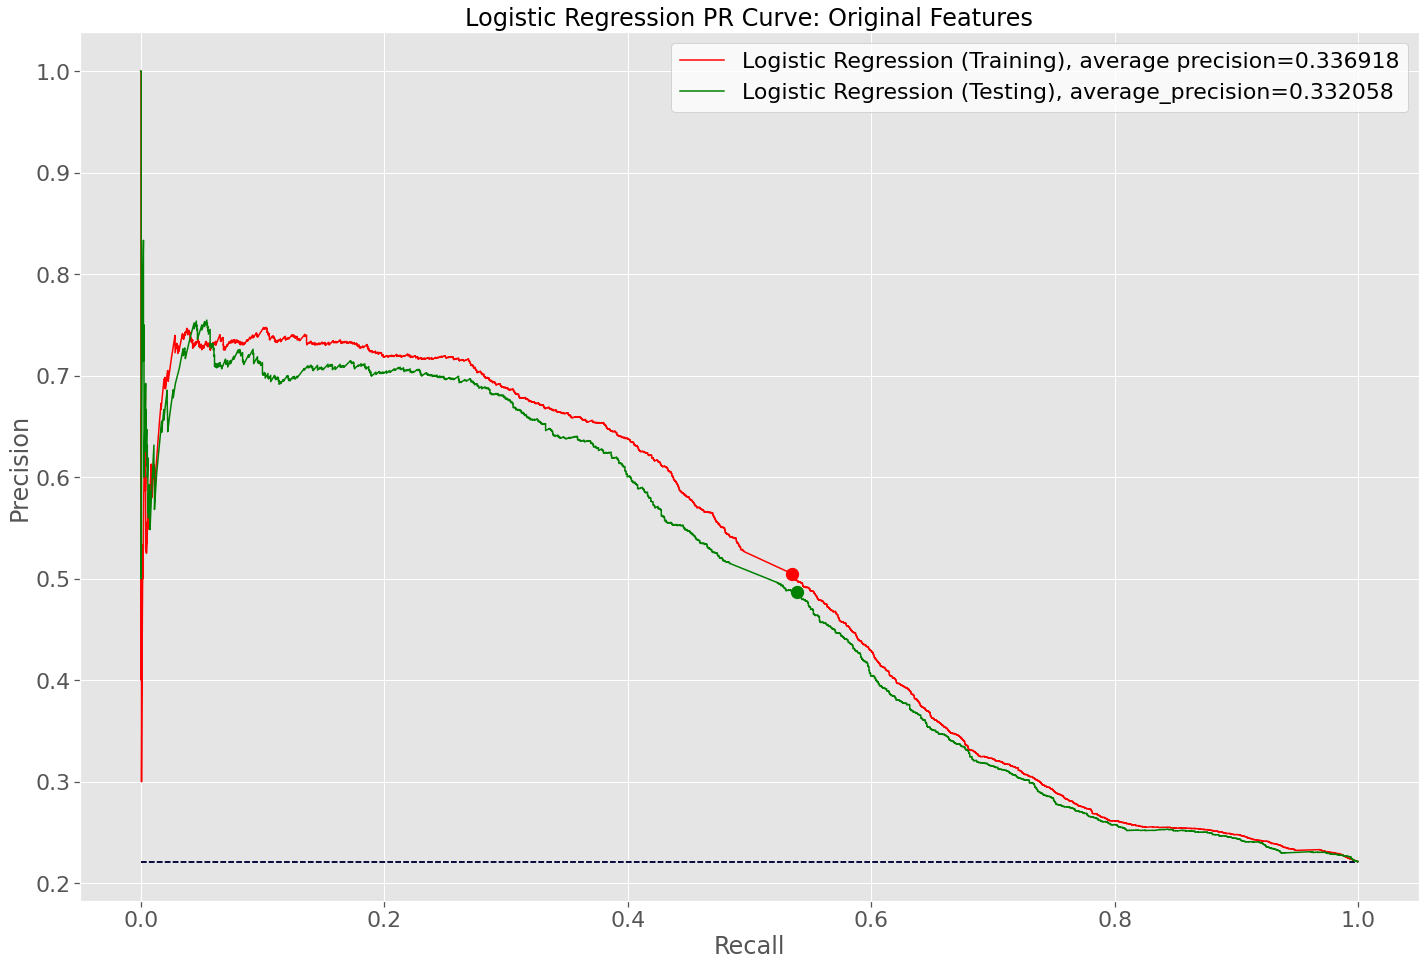

In [ ]:
# Calculate the precision and recall for different values of threshold in the training and testing subsamples standardized approach
precision_train, recall_train, threshold_train = metrics.precision_recall_curve(y_scaled_train, y_pred_proba_train)
average_precision_train                        = metrics.average_precision_score(y_scaled_train, y_pred_train)

precision_test, recall_test, threshold_test    = metrics.precision_recall_curve(y_scaled_test, y_pred_proba_test)
average_precision_test                         = metrics.average_precision_score(y_scaled_test, y_pred_test)

# Calculate the F1 score
vec_f1_train = 2 * precision_train * recall_train / (precision_train + recall_train)
vec_f1_test  = 2 * precision_test * recall_test / (precision_test + recall_test)

# locate the index of the largest F1 score
ix_f1_train = np.argmax(vec_f1_train)
ix_f1_test  = np.argmax(vec_f1_test)

# Summarize the results
print('Training (Original features):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_train[ix_f1_train], vec_f1_train[ix_f1_train]))
print(100*'-')
print('Testing (Original features):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_test[ix_f1_test], vec_f1_test[ix_f1_test]))
print(100*'-')

# Calculate benchmark values for the training and testing subsamples
nopower_scaled_train = len(y_scaled_train[y_scaled_train==1]) / len(y_scaled_train)
nopower_scaled_test  = len(y_scaled_test[y_scaled_test==1]) / len(y_scaled_test)

# Plot the PR curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [nopower_scaled_train, nopower_scaled_train], 'b--')
plt.plot([0, 1], [nopower_scaled_test, nopower_scaled_test], 'k--')
plt.plot(recall_train, precision_train, 'r-', label='Logistic Regression (Training), average precision='+str(round(average_precision_train,6)))
plt.plot(recall_test, precision_test, 'g-', label='Logistic Regression (Testing), average_precision='+str(round(average_precision_test,6)))
plt.scatter(recall_train[ix_f1_train], precision_train[ix_f1_train], marker='o', color='red', s =150)
plt.scatter(recall_test[ix_f1_test], precision_test[ix_f1_test], marker='o', color='green', s=150)
plt.legend(loc=1, facecolor='white')
plt.xlabel('Recall', size=24)
plt.ylabel('Precision', size=24)
plt.title('Logistic Regression PR Curve: Original Features', size=24)
plt.show()

model_summary_lr['F1 Train'] = vec_f1_train[ix_f1_train]
model_summary_lr['F1 Test'] = vec_f1_test[ix_f1_test]
summary = summary.append(model_summary_lr, ignore_index=True)

Training (PCA):
Best threshold = 0.459867, F1 score = 0.494
----------------------------------------------------------------------------------------------------
Testing (PCA ):
Best threshold = 0.455105, F1 score = 0.467
----------------------------------------------------------------------------------------------------


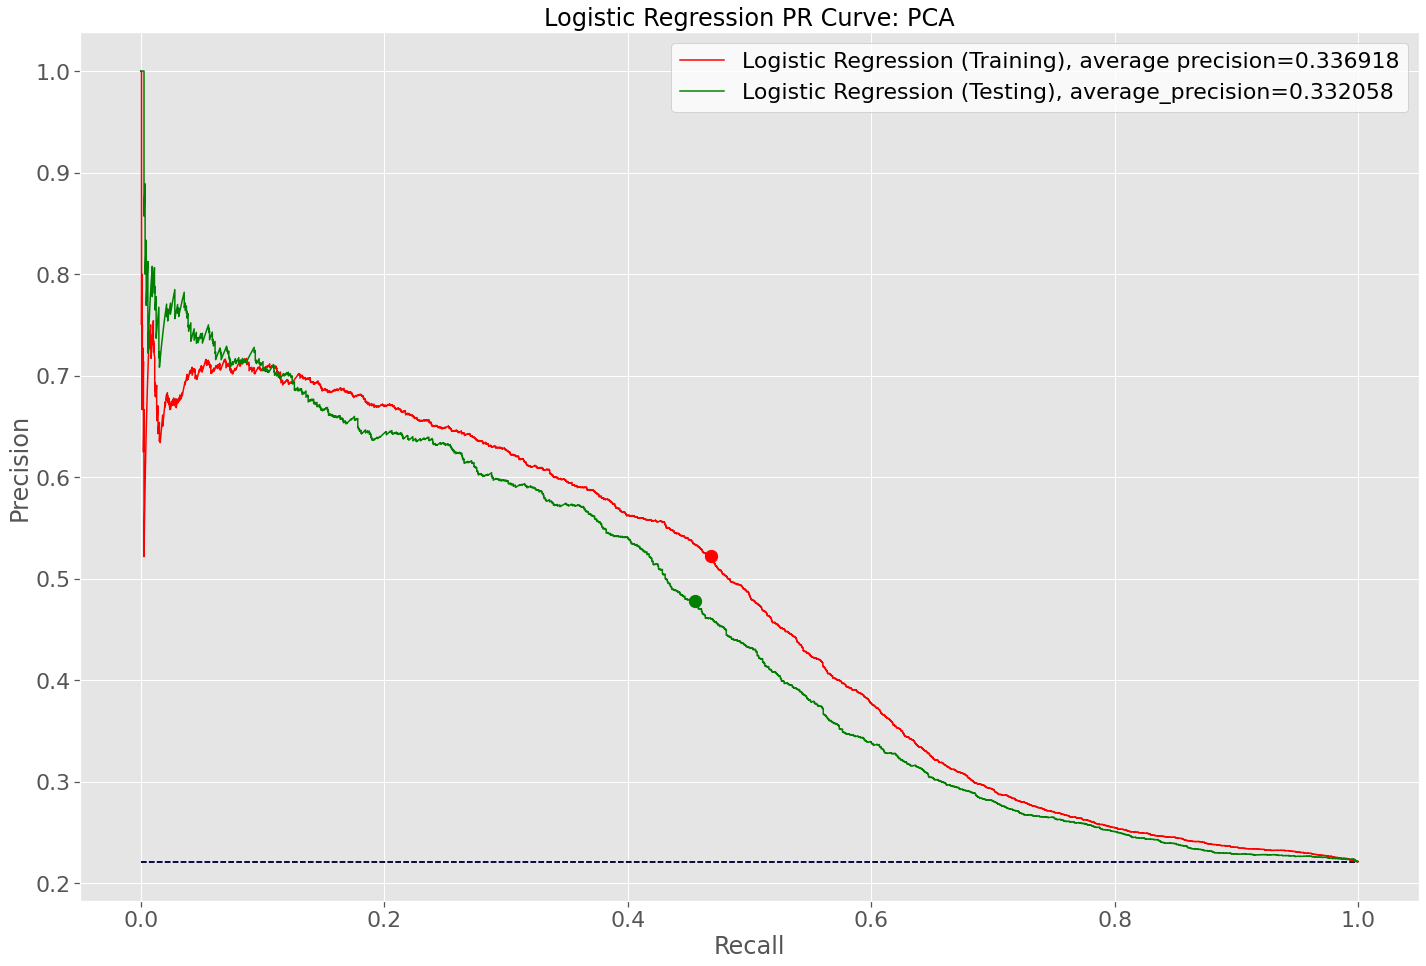

In [ ]:
# Calculate the precision and recall for different values of threshold in the training and testing subsamples  PCA approach
precision_train_pca, recall_train_pca, threshold_train_pca = metrics.precision_recall_curve(y_scaled_train, y_pred_proba_train_pca)
average_precision_train_pca                       = metrics.average_precision_score(y_scaled_train, y_pred_train)

precision_test_pca, recall_test_pca, threshold_test_pca    = metrics.precision_recall_curve(y_scaled_test, y_pred_proba_test_pca)
average_precision_test_pca                        = metrics.average_precision_score(y_scaled_test, y_pred_test)

# Calculate the F1 score
vec_f1_train = 2 * precision_train_pca * recall_train_pca / (precision_train_pca + recall_train_pca)
vec_f1_test  = 2 * precision_test_pca * recall_test_pca / (precision_test_pca+ recall_test_pca)

# locate the index of the largest F1 score
ix_f1_train = np.argmax(vec_f1_train)
ix_f1_test  = np.argmax(vec_f1_test)

# Summarize the results
print('Training (PCA):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_train_pca[ix_f1_train], vec_f1_train[ix_f1_train]))
print(100*'-')
print('Testing (PCA ):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_test_pca[ix_f1_test], vec_f1_test[ix_f1_test]))
print(100*'-')

# Calculate benchmark values for the training and testing subsamples
nopower_scaled_train = len(y_scaled_train[y_scaled_train==1]) / len(y_scaled_train)
nopower_scaled_test  = len(y_scaled_test[y_scaled_test==1]) / len(y_scaled_test)

# Plot the PR curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [nopower_scaled_train, nopower_scaled_train], 'b--')
plt.plot([0, 1], [nopower_scaled_test, nopower_scaled_test], 'k--')
plt.plot(recall_train_pca, precision_train_pca, 'r-', label='Logistic Regression (Training), average precision='+str(round(average_precision_train_pca,6)))
plt.plot(recall_test_pca, precision_test_pca, 'g-', label='Logistic Regression (Testing), average_precision='+str(round(average_precision_test_pca,6)))
plt.scatter(recall_train_pca[ix_f1_train], precision_train_pca[ix_f1_train], marker='o', color='red', s =150)
plt.scatter(recall_test_pca[ix_f1_test], precision_test_pca[ix_f1_test], marker='o', color='green', s=150)
plt.legend(loc=1, facecolor='white')
plt.xlabel('Recall', size=24)
plt.ylabel('Precision', size=24)
plt.title('Logistic Regression PR Curve: PCA', size=24)
plt.show()

model_summary_lr_pca['F1 Train'] = vec_f1_train[ix_f1_train]
model_summary_lr_pca['F1 Test'] = vec_f1_test[ix_f1_test]
summary = summary.append(model_summary_lr_pca, ignore_index=True)

In [ ]:
#the PCA has a worse f1 score#

### **2**



In [ ]:
#we will start our anallysis with Linear SVC#

In [ ]:
# Linear SVC cross-validation approach
n_cv_lsvc = 5

# Define the maximum number of iterations
n_max_iter = 2000

# Create an instance of the class LinearSVC
lsvc_model = LinearSVC(max_iter=n_max_iter)

# Define the search space for the hyperparameters
search_space = dict()
search_space['penalty'] = ['l1', 'l2']
search_space['loss']    = ['hinge', 'squared_hinge']
search_space['C']       = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

# Create an instance of the class GridSearchCV with desired characteristics
lsvc_grid_search_cv_scaled = GridSearchCV(estimator=lsvc_model, 
                                          param_grid=search_space, 
                                          scoring='accuracy', 
                                          cv=n_cv_lsvc, 
                                          n_jobs=-1)

# Run the search algorithm and summarize resuts 
lsvc_grid_search_cv_scaled.fit(X_scaled_train, y_scaled_train)

print(f'Best score: {lsvc_grid_search_cv_scaled.best_score_:.4f}')
print('Best hyperparameters: %s' % lsvc_grid_search_cv_scaled.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_classes.py", line 272, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/usr/loc

Best score: 0.8106
Best hyperparameters: {'C': 10, 'loss': 'hinge', 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Create an instance of the class LinearSVC with specific selection of hyperparameters
lsvc_ccd_scaled = LinearSVC(penalty=lsvc_grid_search_cv_scaled.best_params_['penalty'], 
                            loss=lsvc_grid_search_cv_scaled.best_params_['loss'], 
                            C=lsvc_grid_search_cv_scaled.best_params_['C'], 
                            max_iter=n_max_iter)

# Fit the model
lsvc_ccd_scaled.fit(X_scaled_train, y_scaled_train)
print(lsvc_ccd_scaled.coef_.T)
print(100*'-')

# Predict outcomes in the training and testing subsamples and calculate accuracy
y_scaled_pred_train = lsvc_ccd_scaled.predict(X_scaled_train)
print(f'Accuracy: {metrics.accuracy_score(y_scaled_pred_train,y_scaled_train):.4f}')

y_scaled_pred_test = lsvc_ccd_scaled.predict(X_scaled_test)
print(f'Accuracy: {metrics.accuracy_score(y_scaled_pred_test,y_scaled_test):.4f}')

# Calculate and display cross-validation scores for the training and testing subsamples
lsvc_cv_scores_scaled =cross_val_score(lsvc_ccd_scaled, X_scaled_train, y_scaled_train, cv=n_cv_lsvc)
print(f'Average CV score (+/- one standard deviation): {lsvc_cv_scores_scaled.mean():.4f} +/- {lsvc_cv_scores_scaled.std():.4f}')

print(classification_report(y_scaled_train, y_scaled_pred_train))
print(classification_report(y_scaled_test, y_scaled_pred_test))

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[[-1.33756289e-03]
 [ 9.89588939e-05]
 [-3.03271724e-03]
 [ 3.95424153e-04]
 [ 2.92394991e-03]
 [ 5.20686411e-01]
 [ 2.70982380e-01]
 [ 8.63364607e-03]
 [ 1.09297410e-02]
 [ 9.47743256e-03]
 [ 1.01255442e-02]
 [ 1.85643421e-03]
 [ 3.29625996e-03]
 [-3.76979054e-03]
 [ 2.38392874e-03]
 [-3.73924042e-03]
 [ 1.44071180e-03]
 [-5.21198772e-03]
 [-6.96504258e-03]
 [ 1.75332369e-03]
 [ 3.77772262e-02]
 [ 9.19245192e-05]
 [-3.57855552e-03]]
----------------------------------------------------------------------------------------------------
Accuracy: 0.8103
Accuracy: 0.8083


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Average CV score (+/- one standard deviation): 0.8098 +/- 0.0034
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     15584
           1       0.70      0.25      0.37      4426

    accuracy                           0.81     20010
   macro avg       0.76      0.61      0.63     20010
weighted avg       0.79      0.81      0.77     20010

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7780
           1       0.68      0.25      0.36      2210

    accuracy                           0.81      9990
   macro avg       0.75      0.61      0.63      9990
weighted avg       0.79      0.81      0.77      9990



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Training (Scaled features):
Best threshold = 0.202777, Geometric mean = 0.655
----------------------------------------------------------------------------------------------------
Testing (Scaled features):
Best threshold = 0.205181, Geometric mean = 0.658
----------------------------------------------------------------------------------------------------


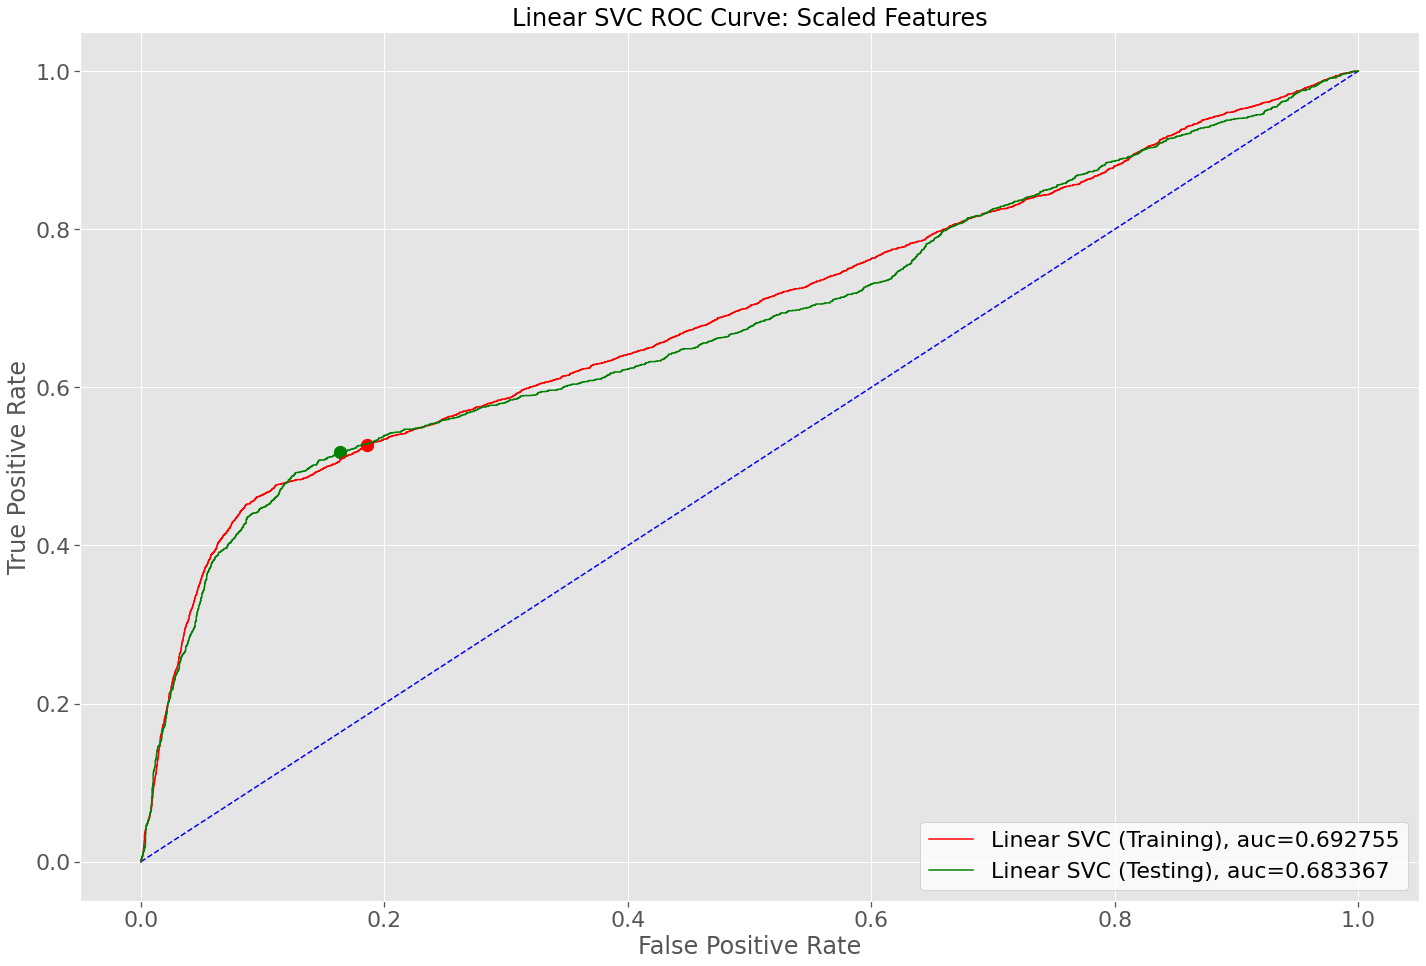

In [ ]:
# Estimate probabilities, and calcualate relevant ROC/AUC scores 
lsvc_calibrated_classifier_cv_ccd_scaled = CalibratedClassifierCV(lsvc_ccd_scaled) 
lsvc_calibrated_classifier_cv_ccd_scaled.fit(X_scaled_train, y_scaled_train)
y_scaled_pred_proba_train = lsvc_calibrated_classifier_cv_ccd_scaled.predict_proba(X_scaled_train)[::,1]

fpr_scaled_train, tpr_scaled_train, threshold_scaled_train  = metrics.roc_curve(y_scaled_train, y_scaled_pred_proba_train)
auc_scaled_train          = metrics.roc_auc_score(y_scaled_train, y_scaled_pred_proba_train)

lsvc_calibrated_classifier_cv_ccd_scaled.fit(X_scaled_test, y_scaled_test)
y_scaled_pred_proba_test  = lsvc_calibrated_classifier_cv_ccd_scaled.predict_proba(X_scaled_test)[::,1]
fpr_scaled_test, tpr_scaled_test, threshold_scaled_test = metrics.roc_curve(y_scaled_test, y_scaled_pred_proba_test)
auc_scaled_test           = metrics.roc_auc_score(y_scaled_test, y_scaled_pred_proba_test)

# Calculate the geometric mean for each threshold for the training and testing subsamples
vec_gmeans_scaled_train   = np.sqrt(tpr_scaled_train * (1-fpr_scaled_train))
vec_gmeans_scaled_test    = np.sqrt(tpr_scaled_test * (1-fpr_scaled_test))

# locate the index of the largest g-mean
ix_scaled_train = np.argmax(vec_gmeans_scaled_train)
ix_scaled_test  = np.argmax(vec_gmeans_scaled_test)

# Summarize the results
print('Training (Scaled features):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_scaled_train[ix_scaled_train], vec_gmeans_scaled_train[ix_scaled_train]))
print(100*'-')
print('Testing (Scaled features):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_scaled_test[ix_scaled_test], vec_gmeans_scaled_test[ix_scaled_test]))
print(100*'-')

# Plot the ROC curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [0, 1], 'b--')
plt.plot(fpr_scaled_train, tpr_scaled_train, 'r-', label='Linear SVC (Training), auc='+str(round(auc_scaled_train,6)))
plt.plot(fpr_scaled_test, tpr_scaled_test, 'g-', label='Linear SVC (Testing), auc='+str(round(auc_scaled_test,6)))
plt.scatter(fpr_scaled_train[ix_scaled_train], tpr_scaled_train[ix_scaled_train], marker='o', color='red', s=150)
plt.scatter(fpr_scaled_test[ix_scaled_test], tpr_scaled_test[ix_scaled_test], marker='o', color='green', s=150)
plt.legend(loc=4, facecolor='white')
plt.xlabel('False Positive Rate', size=24)
plt.ylabel('True Positive Rate', size=24)
plt.title('Linear SVC ROC Curve: Scaled Features', size=24)
plt.show()

model_summary_svc = {'Model name': 'Linear SVC', 'AUC Train': auc_scaled_train, 'AUC Test': auc_scaled_test}

Training (Scaled features):
Best threshold = 0.322114, F1 score = 0.514
----------------------------------------------------------------------------------------------------
Testing (Scaled features):
Best threshold = 0.206820, F1 score = 0.508
----------------------------------------------------------------------------------------------------


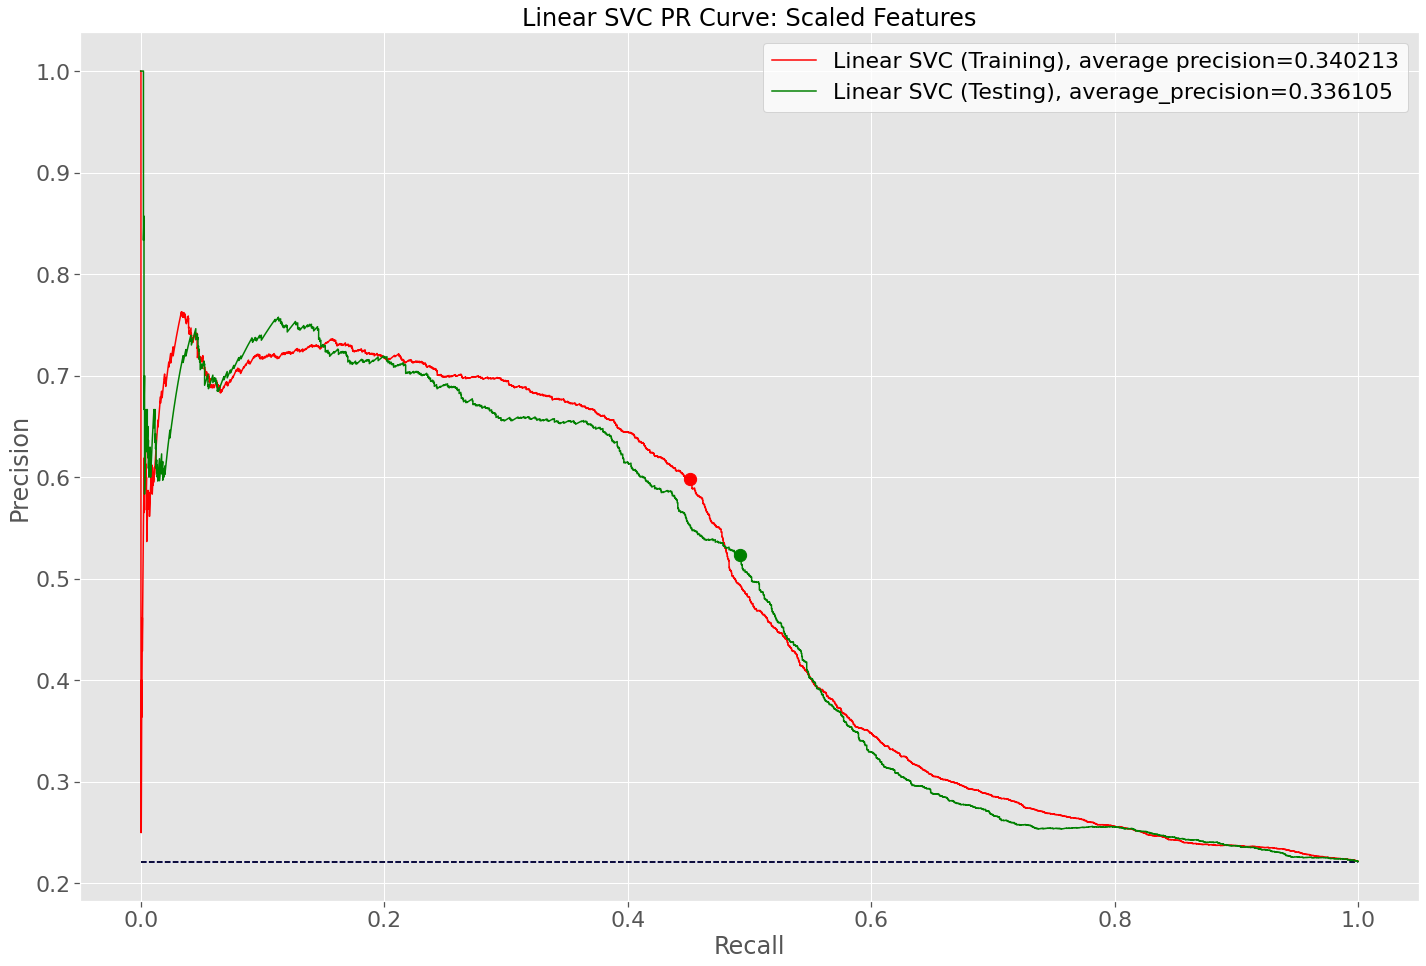

In [ ]:
# Calculate the precision and recall for different values of threshold in the training and testing subsamples
precision_scaled_train, recall_scaled_train, threshold_scaled_train = metrics.precision_recall_curve(y_scaled_train, y_scaled_pred_proba_train)
average_precision_scaled_train = metrics.average_precision_score(y_scaled_train, y_scaled_pred_train)

precision_scaled_test, recall_scaled_test, threshold_scaled_test = metrics.precision_recall_curve(y_scaled_test, y_scaled_pred_proba_test)
average_precision_scaled_test = metrics.average_precision_score(y_scaled_test, y_scaled_pred_test)

# Calculate the F1 score
vec_f1_scaled_train = 2 * precision_scaled_train * recall_scaled_train / (precision_scaled_train + recall_scaled_train)
vec_f1_scaled_test  = 2 * precision_scaled_test * recall_scaled_test / (precision_scaled_test + recall_scaled_test)

# locate the index of the largest F1 score
ix_f1_scaled_train = np.argmax(vec_f1_scaled_train)
ix_f1_scaled_test  = np.argmax(vec_f1_scaled_test)

# Summarize the results
print('Training (Scaled features):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_scaled_train[ix_f1_scaled_train], vec_f1_scaled_train[ix_f1_scaled_train]))
print(100*'-')
print('Testing (Scaled features):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_scaled_test[ix_f1_scaled_test], vec_f1_scaled_test[ix_f1_scaled_test]))
print(100*'-')

# Calculate benchmark values for the training and testing subsamples
nopower_scaled_train = len(y_scaled_train[y_scaled_train==1]) / len(y_scaled_train)
nopower_scaled_test = len(y_scaled_test[y_scaled_test==1]) / len(y_scaled_test)

# Plot the PR curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [nopower_scaled_train, nopower_scaled_train], 'b--')
plt.plot([0, 1], [nopower_scaled_test, nopower_scaled_test], 'k--')
plt.plot(recall_scaled_train, precision_scaled_train, 'r-', label='Linear SVC (Training), average precision='+str(round(average_precision_scaled_train,6)))
plt.plot(recall_scaled_test, precision_scaled_test, 'g-', label='Linear SVC (Testing), average_precision='+str(round(average_precision_scaled_test,6)))
plt.scatter(recall_scaled_train[ix_f1_scaled_train], precision_scaled_train[ix_f1_scaled_train], marker='o', color='red', s =150)
plt.scatter(recall_scaled_test[ix_f1_scaled_test], precision_scaled_test[ix_f1_scaled_test], marker='o', color='green', s=150)
plt.legend(loc=1, facecolor='white')
plt.xlabel('Recall', size=24)
plt.ylabel('Precision', size=24)
plt.title('Linear SVC PR Curve: Scaled Features', size=24)
plt.show()

model_summary_svc['F1 Train'] = vec_f1_scaled_train[ix_f1_scaled_train]
model_summary_svc['F1 Test'] = vec_f1_scaled_test[ix_f1_scaled_test]
summary = summary.append(model_summary_svc, ignore_index=True)

1
2
3
4
5
6
7
8
9


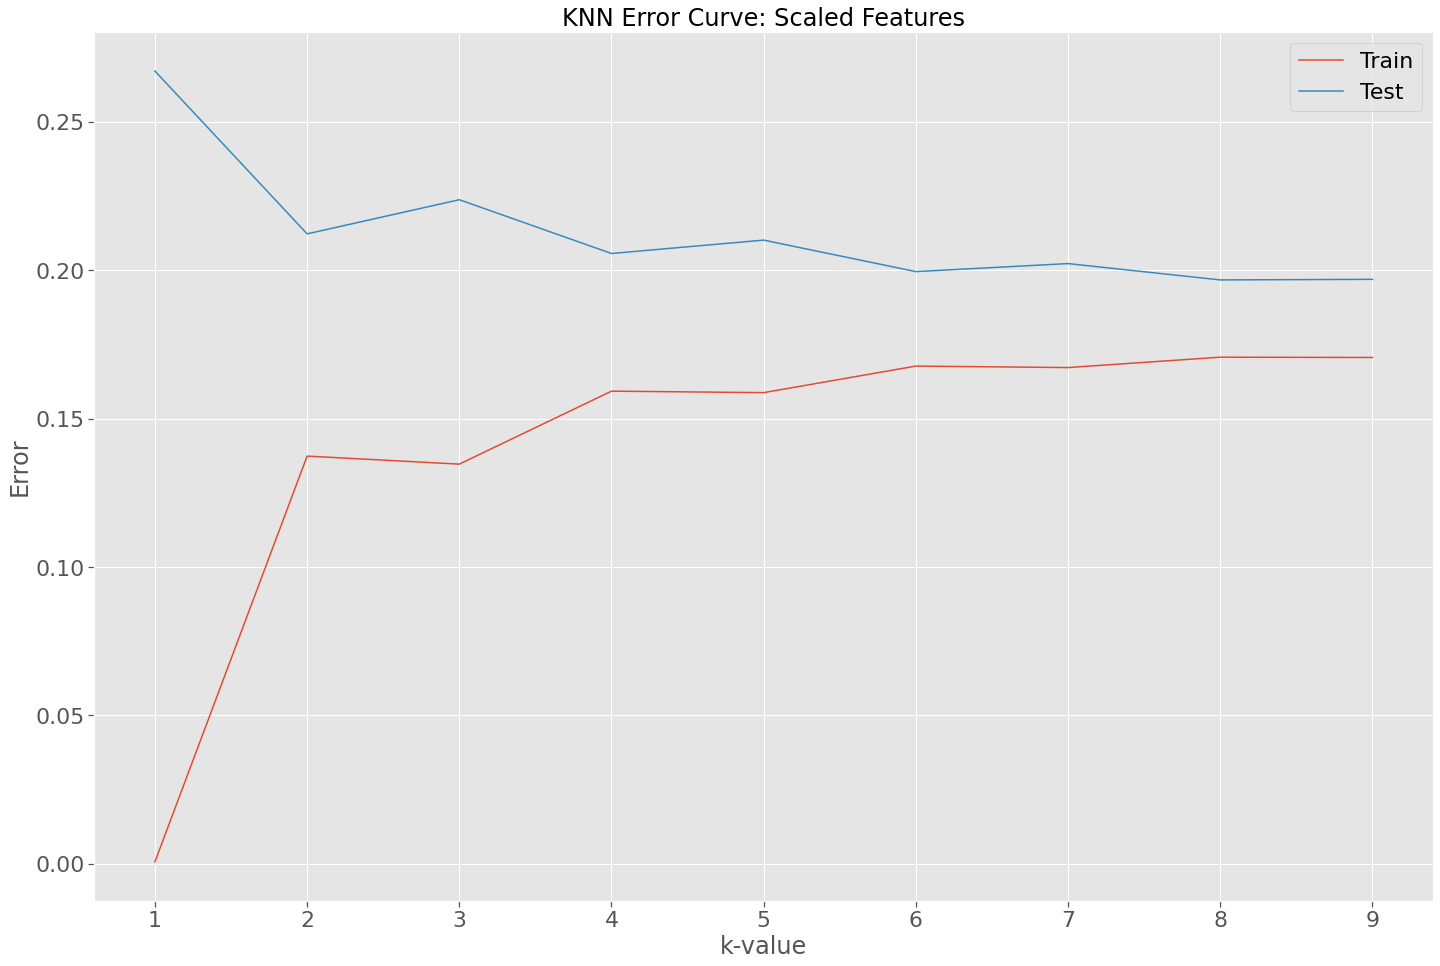

In [ ]:
#we proceed with  K-Nearest Neighbors#
# Initialize error vectors
error_train = []
error_test  = []

# Define lower and upper bounds for k and loop over all adimissible values
k_low  = 1
k_high = 10

for k in range(k_low,k_high):
    print(k)
    # Create an instance of the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Training sample
    knn_model.fit(X_scaled_train,y_scaled_train)
    y_scaled_pred_train = knn_model.predict(X_scaled_train)
    error_train.append(np.mean(y_scaled_train != y_scaled_pred_train))
    
    # Testing sample
    y_scaled_pred_test = knn_model.predict(X_scaled_test)
    error_test.append(np.mean(y_scaled_test!= y_scaled_pred_test))
    
# Plot the error curves
plt.figure(figsize=(24,16))
plt.plot(range(k_low,k_high),error_train,label='Train')
plt.plot(range(k_low,k_high),error_test,label='Test')
plt.xlabel('k-value', size=24)
plt.ylabel('Error', size=24)
plt.title('KNN Error Curve: Scaled Features', size=24)
plt.legend()
plt.show()


In [ ]:
# Define the cross-validation approach
n_cv_knn = 5

# Define the maximum number of iterations
n_max_iter = 2000

# Create an instance of the class LinearSVC
knn_model = KNeighborsClassifier()

# Define the search space for the hyperparameters
search_space = dict()
search_space['n_neighbors'] = [2, 4, 6, 8, 10]
search_space['metric']      = ['euclidean', 'manhattan']

# Create an instance of the class GridSearchCV with desired characteristics
knn_grid_search_cv_scaled = GridSearchCV(estimator=knn_model, 
                                         param_grid=search_space, 
                                         scoring='accuracy', 
                                         cv=n_cv_knn, 
                                         n_jobs=-1)

# Run the search algorithm and summarize resuts 
knn_grid_search_cv_scaled.fit(X_scaled_train, y_scaled_train)

print(f'Best score: {knn_grid_search_cv_scaled.best_score_:.4f}')
print('Best hyperparameters: %s' % knn_grid_search_cv_scaled.best_params_)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score: 0.8065
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 10}


In [ ]:
# Create an instance of the class LinearSVC with specific selection of hyperparameters
knn_ccd_scaled = KNeighborsClassifier(n_neighbors=knn_grid_search_cv_scaled.best_params_['n_neighbors'], 
                                      metric=knn_grid_search_cv_scaled.best_params_['metric'])

# Fit the model
knn_ccd_scaled.fit(X_scaled_train, y_scaled_train)

# Predict outcomes in the testing subsample and calculate accuracy
y_scaled_pred_test = knn_ccd_scaled.predict(X_scaled_test)
print(f'Accuracy: {metrics.accuracy_score(y_scaled_pred_test,y_scaled_test):.4f}')

# Display cross-validation scores for the testing subsample
print(classification_report(y_scaled_test, y_scaled_pred_test))

Accuracy: 0.8026
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7780
           1       0.62      0.28      0.39      2210

    accuracy                           0.80      9990
   macro avg       0.72      0.62      0.64      9990
weighted avg       0.78      0.80      0.77      9990



Testing (Scaled features):
Best threshold = 0.210052, Geometric mean = 0.752
----------------------------------------------------------------------------------------------------


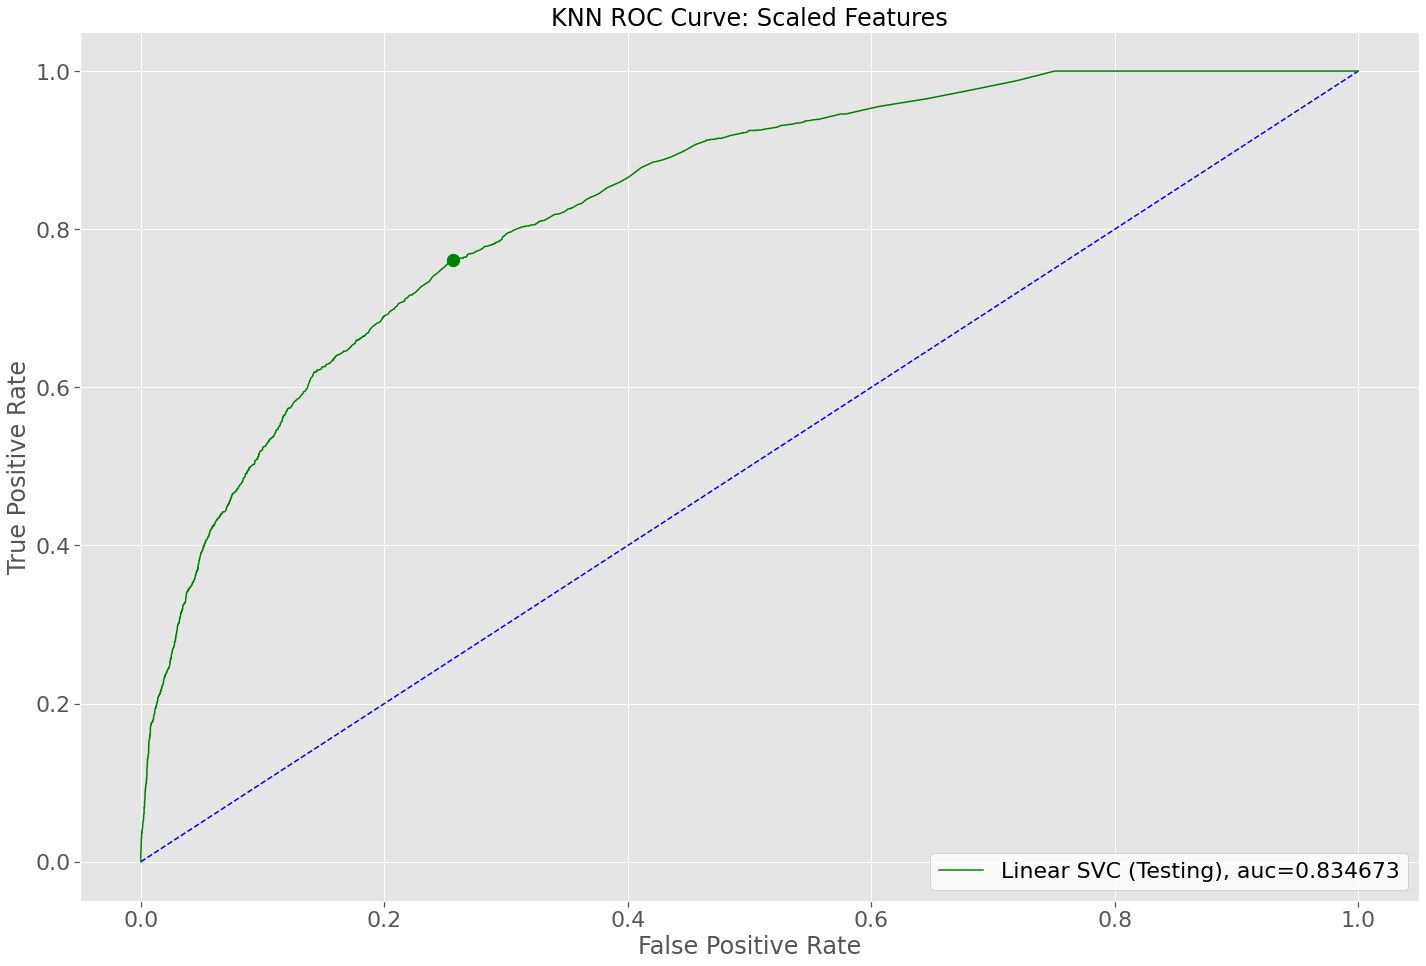

In [ ]:
# Estimate probabilities, and calcualate relevant ROC/AUC scores 
knn_calibrated_classifier_cv_ccd_scaled = CalibratedClassifierCV(knn_ccd_scaled) 
knn_calibrated_classifier_cv_ccd_scaled.fit(X_scaled_test, y_scaled_test)
y_scaled_pred_proba_test  = knn_calibrated_classifier_cv_ccd_scaled.predict_proba(X_scaled_test)[::,1]

fpr_scaled_test, tpr_scaled_test, threshold_scaled_test = metrics.roc_curve(y_scaled_test, y_scaled_pred_proba_test)
auc_scaled_test = metrics.roc_auc_score(y_scaled_test, y_scaled_pred_proba_test)

# Calculate the geometric mean for each threshold for the testing subsample
vec_gmeans_scaled_test    = np.sqrt(tpr_scaled_test * (1-fpr_scaled_test))

# locate the index of the largest g-mean
ix_scaled_test  = np.argmax(vec_gmeans_scaled_test)

# Summarize the results
print('Testing (Scaled features):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_scaled_test[ix_scaled_test], vec_gmeans_scaled_test[ix_scaled_test]))
print(100*'-')

# Plot the ROC curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [0, 1], 'b--')
plt.plot(fpr_scaled_test, tpr_scaled_test, 'g-', label='Linear SVC (Testing), auc='+str(round(auc_scaled_test,6)))
plt.scatter(fpr_scaled_test[ix_scaled_test], tpr_scaled_test[ix_scaled_test], marker='o', color='green', s=150)
plt.legend(loc=4, facecolor='white')
plt.xlabel('False Positive Rate', size=24)
plt.ylabel('True Positive Rate', size=24)
plt.title('KNN ROC Curve: Scaled Features', size=24)
plt.show()

model_summary_knn = {'Model name': 'KNN', 'AUC Train': None, 'AUC Test': auc_scaled_test}

Testing (Scaled features):
Best threshold = 0.267801, F1 score = 0.584
----------------------------------------------------------------------------------------------------


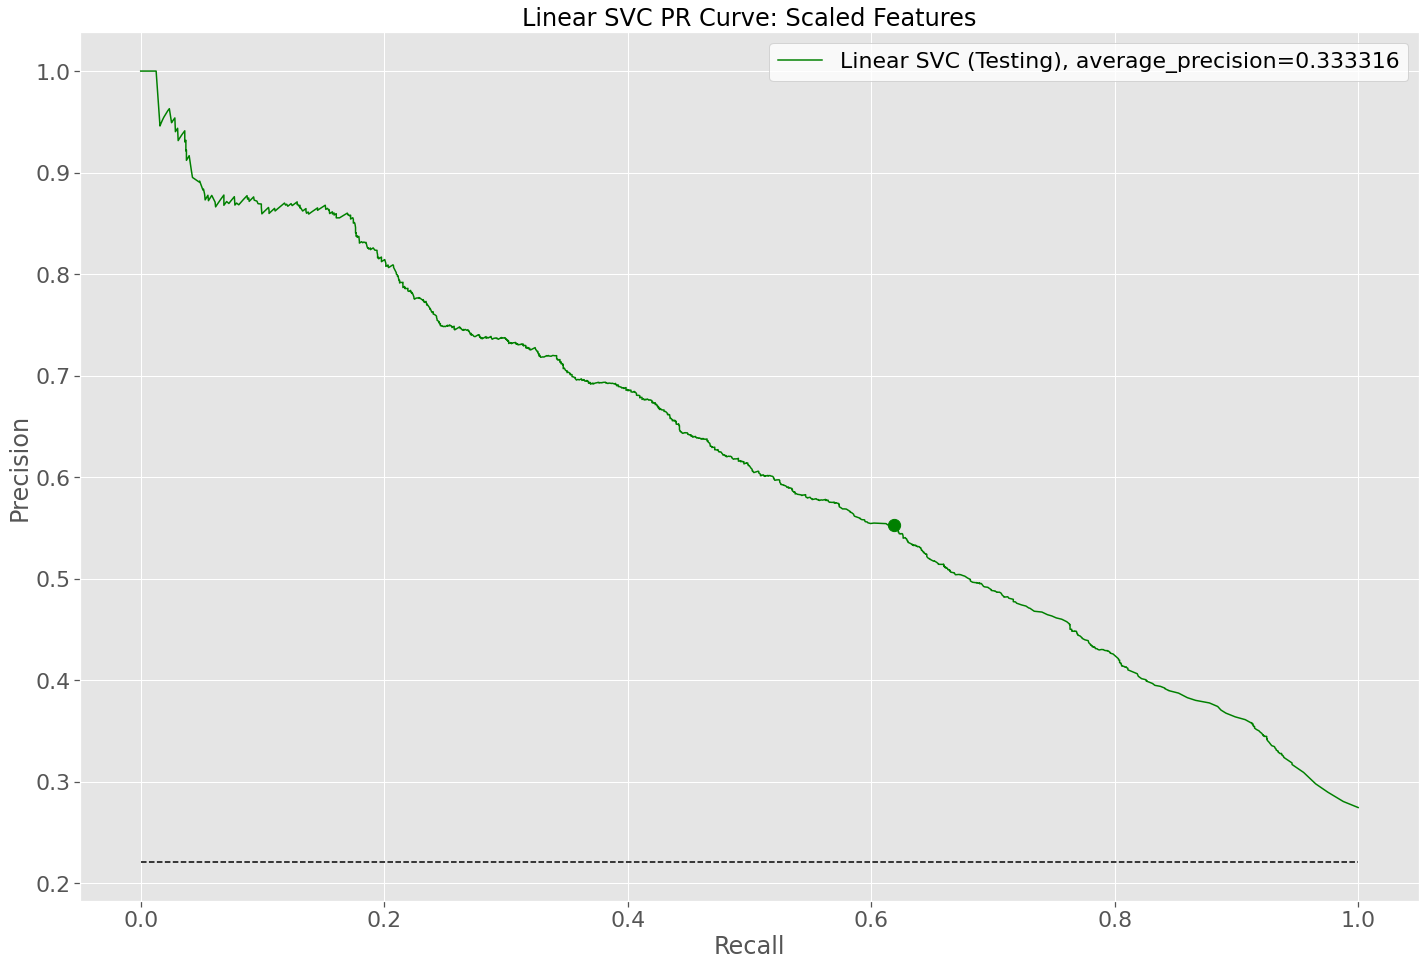

In [ ]:
# Calculate the precision and recall for different values of threshold in the training and testing subsamples
precision_scaled_test, recall_scaled_test, threshold_scaled_test = metrics.precision_recall_curve(y_scaled_test, y_scaled_pred_proba_test)
average_precision_scaled_test = metrics.average_precision_score(y_scaled_test, y_scaled_pred_test)

# Calculate the F1 score
vec_f1_scaled_test  = 2 * precision_scaled_test * recall_scaled_test / (precision_scaled_test + recall_scaled_test)

# locate the index of the largest F1 score
ix_f1_scaled_test  = np.argmax(vec_f1_scaled_test)

# Summarize the results
print('Testing (Scaled features):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_scaled_test[ix_f1_scaled_test], vec_f1_scaled_test[ix_f1_scaled_test]))
print(100*'-')

# Calculate benchmark values for the training and testing subsamples
nopower_scaled_train = len(y_scaled_train[y_scaled_train==1]) / len(y_scaled_train)
nopower_scaled_test = len(y_scaled_test[y_scaled_test==1]) / len(y_scaled_test)

# Plot the PR curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [nopower_scaled_test, nopower_scaled_test], 'k--')
plt.plot(recall_scaled_test, precision_scaled_test, 'g-', label='Linear SVC (Testing), average_precision='+str(round(average_precision_scaled_test,6)))
plt.scatter(recall_scaled_test[ix_f1_scaled_test], precision_scaled_test[ix_f1_scaled_test], marker='o', color='green', s=150)
plt.legend(loc=1, facecolor='white')
plt.xlabel('Recall', size=24)
plt.ylabel('Precision', size=24)
plt.title('Linear SVC PR Curve: Scaled Features', size=24)
plt.show()

model_summary_knn['F1 Test'] = vec_f1_scaled_test[ix_f1_scaled_test]
summary = summary.append(model_summary_knn, ignore_index=True)

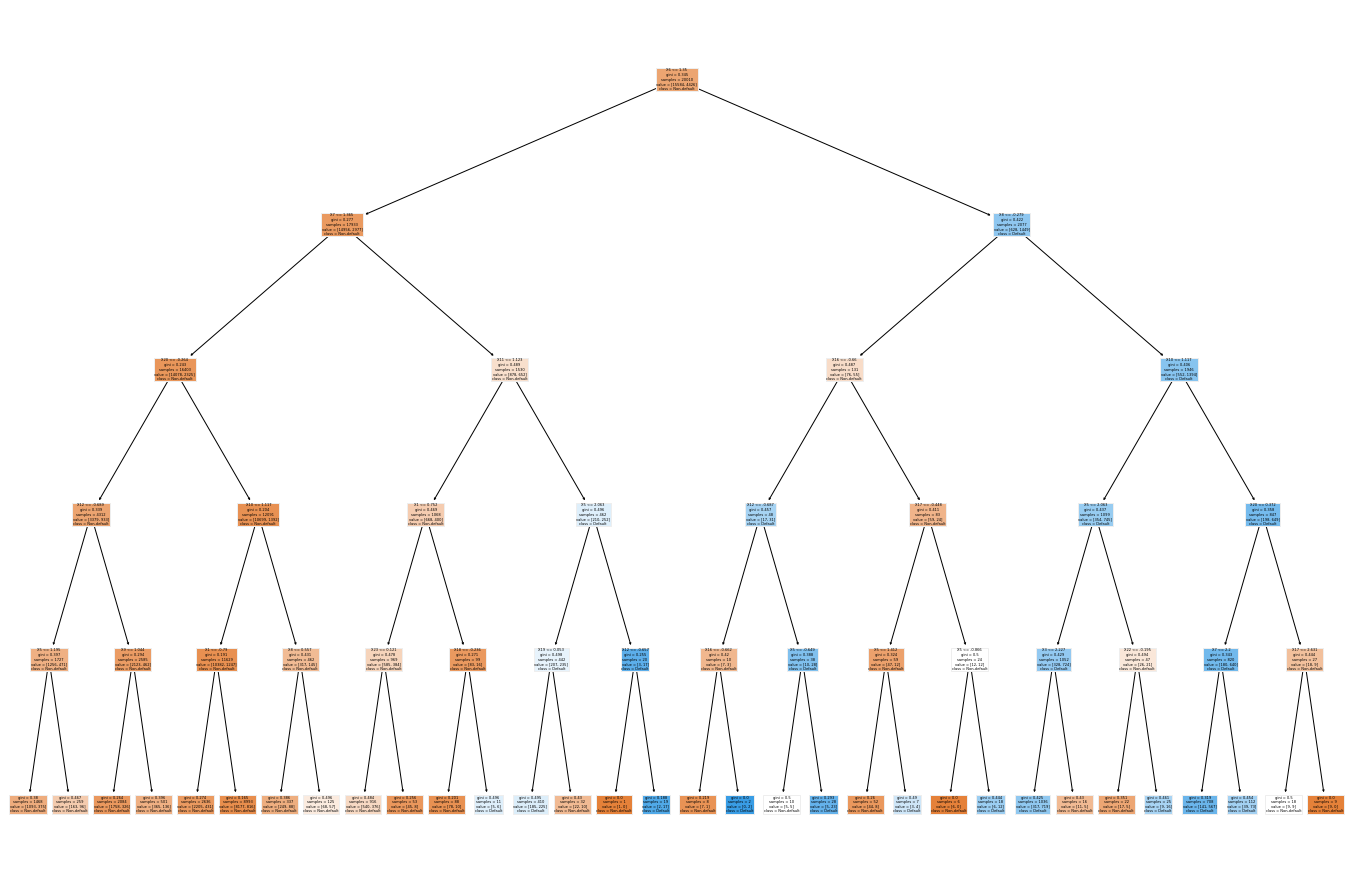

In [ ]:
#Descision Tree#
# Define inputs for DecisionTreeClassifier
n_max_depth = 5

# # Create an instance of the class DecisionTreeClassifier and fit a model on the training subsample
dt_model = DecisionTreeClassifier(max_depth=n_max_depth)
dt_model.fit(X_scaled_train,y_scaled_train)

# Plot the decision tree
plt.figure(figsize=(24,16))
plot_tree(dt_model, filled=True, feature_names=X_scaled_train.columns, class_names=['Non-default', 'Default'])
plt.show()

In [ ]:
# Define the cross-validation approach
n_cv_dt = 5

# Create an instance of the class DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Define the search space for the hyperparameters
search_space = dict()
search_space['max_depth']        = [2, 3, 4, 5, 6, 7]
search_space['max_features']     = [2, 3, 4, 5, 6, 7]
search_space['min_samples_leaf'] = [2, 3, 4, 5, 6, 7]
search_space['criterion']        = ['gini', 'entropy']

# Create an instance of the class RandomizedSearchCV with desired characteristics
dt_randomized_search_cv_scaled = RandomizedSearchCV(estimator=dt_model, 
                                                    param_distributions=search_space, 
                                                    scoring='accuracy', 
                                                    cv=n_cv_dt, 
                                                    n_jobs=-1)

# Run the search algorithm and summarize resuts 
dt_randomized_search_cv_scaled.fit(X_scaled_train, y_scaled_train)

print(f'Best score: {dt_randomized_search_cv_scaled.best_score_:.4f}')
print('Best hyperparameters: %s' % dt_randomized_search_cv_scaled.best_params_)

Best score: 0.8171
Best hyperparameters: {'min_samples_leaf': 7, 'max_features': 6, 'max_depth': 4, 'criterion': 'entropy'}


In [ ]:
# Create an instance of the class DecisionTreeClassifier with specific selection of hyperparameters
dt_ccd_scaled = DecisionTreeClassifier(max_depth=dt_randomized_search_cv_scaled.best_params_['max_depth'], 
                                       max_features=dt_randomized_search_cv_scaled.best_params_['max_features'], 
                                       min_samples_leaf=dt_randomized_search_cv_scaled.best_params_['min_samples_leaf'],
                                       criterion=dt_randomized_search_cv_scaled.best_params_['criterion'])

# Fit the model
dt_ccd_scaled.fit(X_scaled_train, y_scaled_train)

# Predict outcomes in the training and testing subsamples and calculate accuracy
y_scaled_pred_train = dt_ccd_scaled.predict(X_scaled_train)
print(f'Accuracy: {metrics.accuracy_score(y_scaled_pred_train,y_scaled_train):.4f}')

y_scaled_pred_test = dt_ccd_scaled.predict(X_scaled_test)
print(f'Accuracy: {metrics.accuracy_score(y_scaled_pred_test,y_scaled_test):.4f}')

# Calculate and display cross-validation scores for the training and testing subsamples
dt_cv_scores_scaled =cross_val_score(dt_ccd_scaled, X_scaled_train, y_scaled_train, cv=n_cv_dt)
print(f'Average CV score (+/- one standard deviation): {dt_cv_scores_scaled.mean():.4f} +/- {dt_cv_scores_scaled.std():.4f}')

print(classification_report(y_scaled_train, y_scaled_pred_train))
print(classification_report(y_scaled_test, y_scaled_pred_test))

Accuracy: 0.8144
Accuracy: 0.8089
Average CV score (+/- one standard deviation): 0.8107 +/- 0.0052
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     15584
           1       0.68      0.30      0.42      4426

    accuracy                           0.81     20010
   macro avg       0.76      0.63      0.65     20010
weighted avg       0.80      0.81      0.79     20010

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7780
           1       0.65      0.29      0.40      2210

    accuracy                           0.81      9990
   macro avg       0.74      0.62      0.64      9990
weighted avg       0.79      0.81      0.78      9990



Training (Scaled features):
Best threshold = 0.175994, Geometric mean = 0.714
----------------------------------------------------------------------------------------------------
Testing (Scaled features):
Best threshold = 0.178749, Geometric mean = 0.712
----------------------------------------------------------------------------------------------------


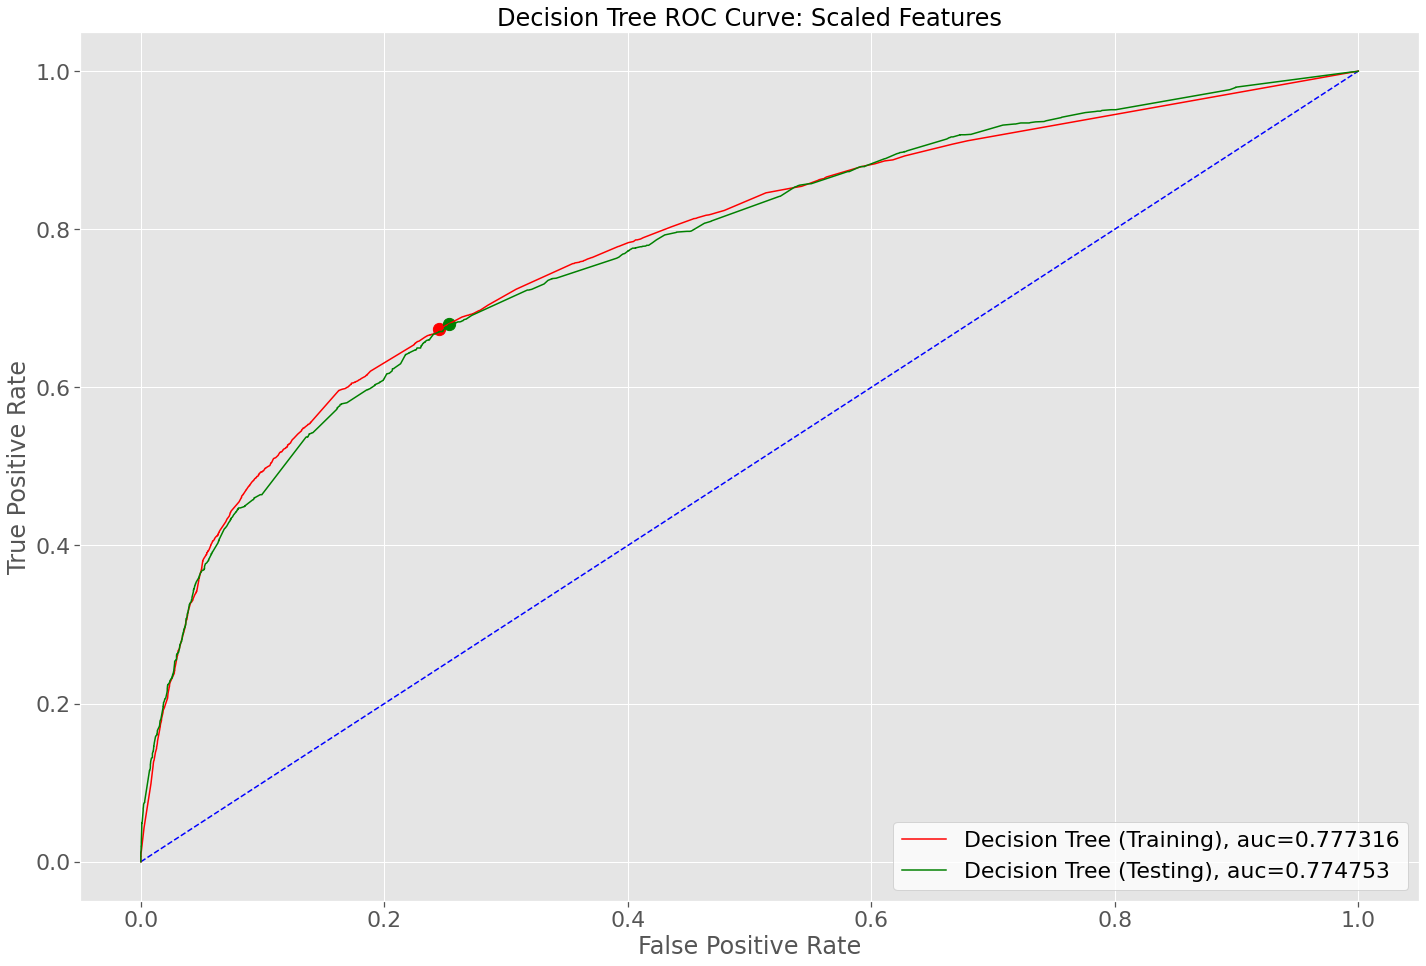

In [ ]:
# Estimate probabilities, and calcualate relevant ROC/AUC scores 
dt_calibrated_classifier_cv_ccd_scaled = CalibratedClassifierCV(dt_ccd_scaled) 
dt_calibrated_classifier_cv_ccd_scaled.fit(X_scaled_train, y_scaled_train)
y_scaled_pred_proba_train = dt_calibrated_classifier_cv_ccd_scaled.predict_proba(X_scaled_train)[::,1]

fpr_scaled_train, tpr_scaled_train, threshold_scaled_train  = metrics.roc_curve(y_scaled_train, y_scaled_pred_proba_train)
auc_scaled_train          = metrics.roc_auc_score(y_scaled_train, y_scaled_pred_proba_train)

dt_calibrated_classifier_cv_ccd_scaled.fit(X_scaled_test, y_scaled_test)
y_scaled_pred_proba_test  = dt_calibrated_classifier_cv_ccd_scaled.predict_proba(X_scaled_test)[::,1]
fpr_scaled_test, tpr_scaled_test, threshold_scaled_test = metrics.roc_curve(y_scaled_test, y_scaled_pred_proba_test)
auc_scaled_test           = metrics.roc_auc_score(y_scaled_test, y_scaled_pred_proba_test)

# Calculate the geometric mean for each threshold for the training and testing subsamples
vec_gmeans_scaled_train   = np.sqrt(tpr_scaled_train * (1-fpr_scaled_train))
vec_gmeans_scaled_test    = np.sqrt(tpr_scaled_test * (1-fpr_scaled_test))

# locate the index of the largest g-mean
ix_scaled_train = np.argmax(vec_gmeans_scaled_train)
ix_scaled_test  = np.argmax(vec_gmeans_scaled_test)

# Summarize the results
print('Training (Scaled features):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_scaled_train[ix_scaled_train], vec_gmeans_scaled_train[ix_scaled_train]))
print(100*'-')
print('Testing (Scaled features):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_scaled_test[ix_scaled_test], vec_gmeans_scaled_test[ix_scaled_test]))
print(100*'-')

# Plot the ROC curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [0, 1], 'b--')
plt.plot(fpr_scaled_train, tpr_scaled_train, 'r-', label='Decision Tree (Training), auc='+str(round(auc_scaled_train,6)))
plt.plot(fpr_scaled_test, tpr_scaled_test, 'g-', label='Decision Tree (Testing), auc='+str(round(auc_scaled_test,6)))
plt.scatter(fpr_scaled_train[ix_scaled_train], tpr_scaled_train[ix_scaled_train], marker='o', color='red', s=150)
plt.scatter(fpr_scaled_test[ix_scaled_test], tpr_scaled_test[ix_scaled_test], marker='o', color='green', s=150)
plt.legend(loc=4, facecolor='white')
plt.xlabel('False Positive Rate', size=24)
plt.ylabel('True Positive Rate', size=24)
plt.title('Decision Tree ROC Curve: Scaled Features', size=24)
plt.show()

model_summary_dt = {'Model name': 'Decision Tree', 'AUC Train': auc_scaled_train, 'AUC Test': auc_scaled_test}

Training (Scaled features):
Best threshold = 0.207413, F1 score = 0.550
----------------------------------------------------------------------------------------------------
Testing (Scaled features):
Best threshold = 0.226445, F1 score = 0.537
----------------------------------------------------------------------------------------------------


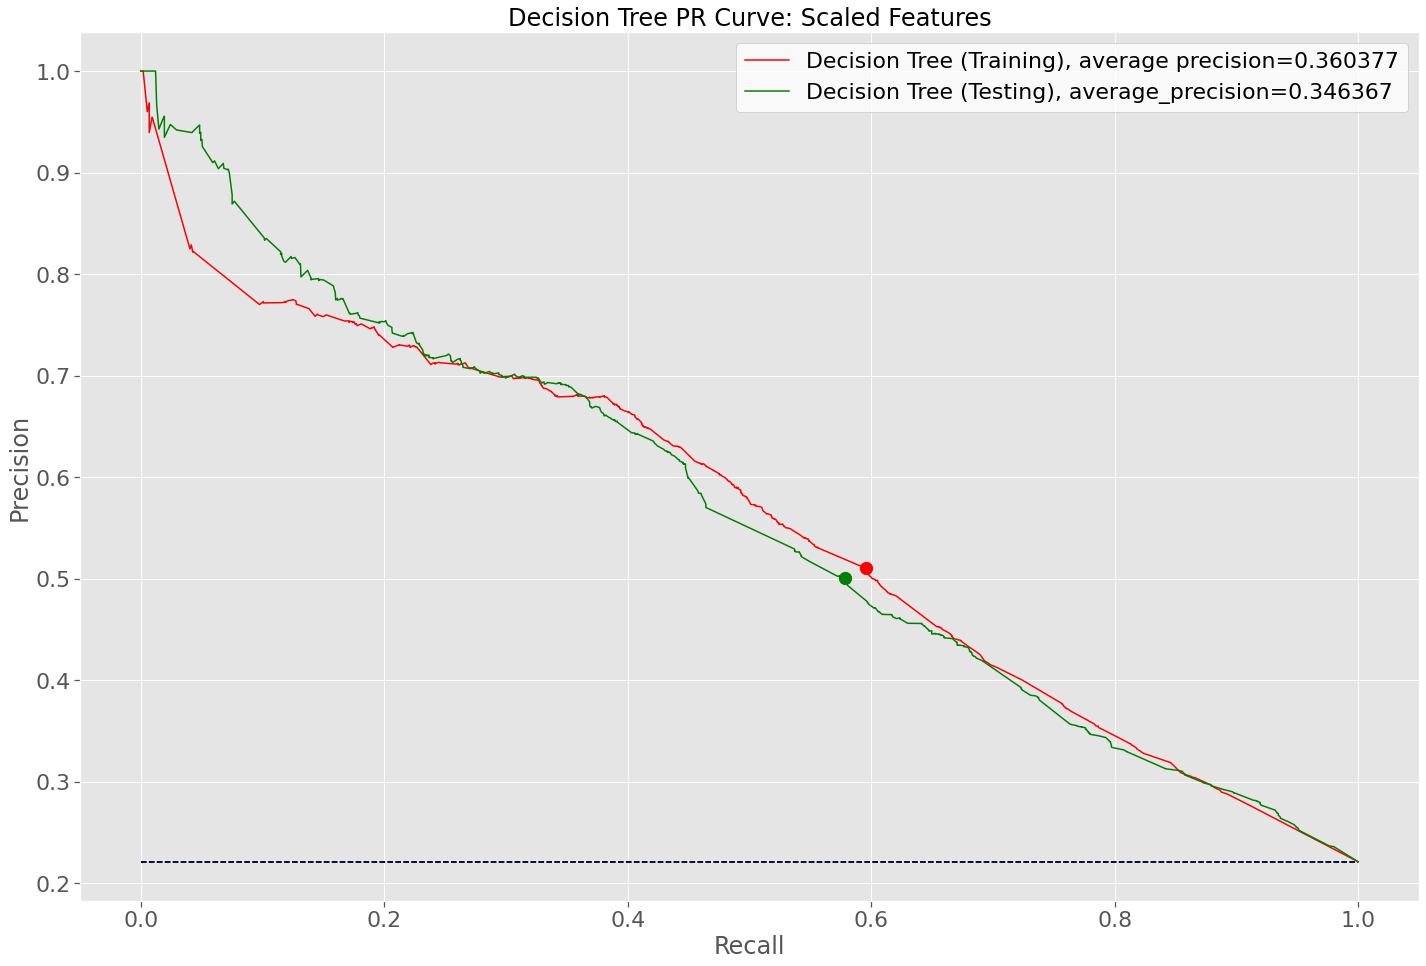

In [ ]:
# Calculate the precision and recall for different values of threshold in the training and testing subsamples
precision_scaled_train, recall_scaled_train, threshold_scaled_train = metrics.precision_recall_curve(y_scaled_train, y_scaled_pred_proba_train)
average_precision_scaled_train = metrics.average_precision_score(y_scaled_train, y_scaled_pred_train)

precision_scaled_test, recall_scaled_test, threshold_scaled_test = metrics.precision_recall_curve(y_scaled_test, y_scaled_pred_proba_test)
average_precision_scaled_test = metrics.average_precision_score(y_scaled_test, y_scaled_pred_test)

# Calculate the F1 score
vec_f1_scaled_train = 2 * precision_scaled_train * recall_scaled_train / (precision_scaled_train + recall_scaled_train)
vec_f1_scaled_test  = 2 * precision_scaled_test * recall_scaled_test / (precision_scaled_test + recall_scaled_test)

# locate the index of the largest F1 score
ix_f1_scaled_train = np.argmax(vec_f1_scaled_train)
ix_f1_scaled_test  = np.argmax(vec_f1_scaled_test)

# Summarize the results
print('Training (Scaled features):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_scaled_train[ix_f1_scaled_train], vec_f1_scaled_train[ix_f1_scaled_train]))
print(100*'-')
print('Testing (Scaled features):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_scaled_test[ix_f1_scaled_test], vec_f1_scaled_test[ix_f1_scaled_test]))
print(100*'-')

# Calculate benchmark values for the training and testing subsamples
nopower_scaled_train = len(y_scaled_train[y_scaled_train==1]) / len(y_scaled_train)
nopower_scaled_test = len(y_scaled_test[y_scaled_test==1]) / len(y_scaled_test)

# Plot the PR curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [nopower_scaled_train, nopower_scaled_train], 'b--')
plt.plot([0, 1], [nopower_scaled_test, nopower_scaled_test], 'k--')
plt.plot(recall_scaled_train, precision_scaled_train, 'r-', label='Decision Tree (Training), average precision='+str(round(average_precision_scaled_train,6)))
plt.plot(recall_scaled_test, precision_scaled_test, 'g-', label='Decision Tree (Testing), average_precision='+str(round(average_precision_scaled_test,6)))
plt.scatter(recall_scaled_train[ix_f1_scaled_train], precision_scaled_train[ix_f1_scaled_train], marker='o', color='red', s =150)
plt.scatter(recall_scaled_test[ix_f1_scaled_test], precision_scaled_test[ix_f1_scaled_test], marker='o', color='green', s=150)
plt.legend(loc=1, facecolor='white')
plt.xlabel('Recall', size=24)
plt.ylabel('Precision', size=24)
plt.title('Decision Tree PR Curve: Scaled Features', size=24)
plt.show()

model_summary_dt['F1 Train'] = vec_f1_scaled_train[ix_f1_scaled_train]
model_summary_dt['F1 Test'] = vec_f1_scaled_test[ix_f1_scaled_test]
summary = summary.append(model_summary_dt, ignore_index=True)

In [ ]:
#Random Forest#
# Define the cross-validation approach
n_cv_rf = 5

# Create an instance of the class RandomForestClassifier
rf_model = RandomForestClassifier()

# Define the search space for the hyperparameters
search_space = dict()
search_space['n_estimators']     = [50, 100, 150, 200, 250]
search_space['max_depth']        = [2, 3, 4, 5, 6, 7]
search_space['max_features']     = [2, 3, 4, 5, 6, 7]
search_space['min_samples_leaf'] = [2, 3, 4, 5, 6, 7]
search_space['criterion']        = ['gini', 'entropy']

# Create an instance of the class RandomizedSearchCV with desired characteristics
rf_randomized_search_cv_scaled = RandomizedSearchCV(estimator=rf_model, 
                                                    param_distributions=search_space, 
                                                    scoring='accuracy', 
                                                    cv=n_cv_rf, 
                                                    n_jobs=-1)

# Run the search algorithm and summarize resuts 
rf_randomized_search_cv_scaled.fit(X_scaled_train, y_scaled_train)

print(f'Best score: {rf_randomized_search_cv_scaled.best_score_:.4f}')
print('Best hyperparameters: %s' % rf_randomized_search_cv_scaled.best_params_)

Best score: 0.8237
Best hyperparameters: {'n_estimators': 250, 'min_samples_leaf': 3, 'max_features': 7, 'max_depth': 7, 'criterion': 'entropy'}


In [ ]:
# Create an instance of the class RandomForestClassifier with specific selection of hyperparameters
rf_ccd_scaled = RandomForestClassifier(n_estimators=rf_randomized_search_cv_scaled.best_params_['n_estimators'], 
                                       max_depth=rf_randomized_search_cv_scaled.best_params_['max_depth'], 
                                       max_features=rf_randomized_search_cv_scaled.best_params_['max_features'], 
                                       min_samples_leaf=rf_randomized_search_cv_scaled.best_params_['min_samples_leaf'],
                                       criterion=rf_randomized_search_cv_scaled.best_params_['criterion'])

# Fit the model
rf_ccd_scaled.fit(X_scaled_train, y_scaled_train)

# Predict outcomes in the training and testing subsamples and calculate accuracy
y_scaled_pred_train = rf_ccd_scaled.predict(X_scaled_train)
print(f'Accuracy: {metrics.accuracy_score(y_scaled_pred_train,y_scaled_train):.4f}')

y_scaled_pred_test = rf_ccd_scaled.predict(X_scaled_test)
print(f'Accuracy: {metrics.accuracy_score(y_scaled_pred_test,y_scaled_test):.4f}')

# Calculate and display cross-validation scores for the training and testing subsamples
rf_cv_scores_scaled =cross_val_score(rf_ccd_scaled, X_scaled_train, y_scaled_train, cv=n_cv_rf)
print(f'Average CV score (+/- one standard deviation): {rf_cv_scores_scaled.mean():.4f} +/- {rf_cv_scores_scaled.std():.4f}')

print(classification_report(y_scaled_train, y_scaled_pred_train))
print(classification_report(y_scaled_test, y_scaled_pred_test))

Accuracy: 0.8315
Accuracy: 0.8183
Average CV score (+/- one standard deviation): 0.8231 +/- 0.0028
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     15584
           1       0.73      0.38      0.50      4426

    accuracy                           0.83     20010
   macro avg       0.79      0.67      0.70     20010
weighted avg       0.82      0.83      0.81     20010

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7780
           1       0.67      0.35      0.46      2210

    accuracy                           0.82      9990
   macro avg       0.75      0.65      0.68      9990
weighted avg       0.80      0.82      0.80      9990



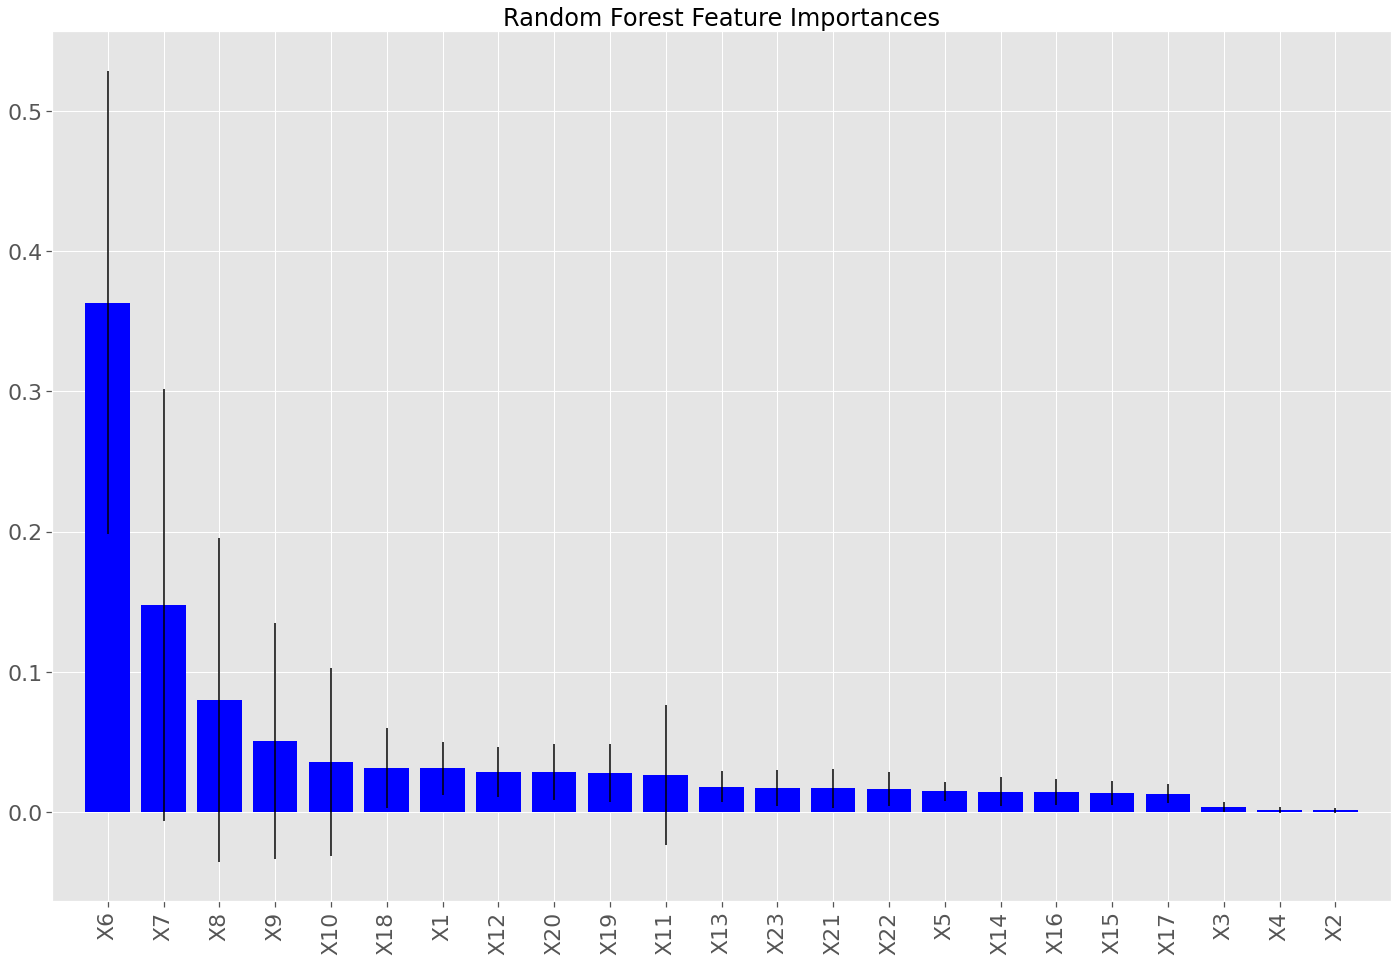

In [ ]:
# Extract importances
importances = rf_ccd_scaled.feature_importances_
std         = np.std([tree.feature_importances_ for tree in rf_ccd_scaled.estimators_],
                     axis=0)

ix_importances = np.argsort(importances)[::-1]

# Plot the feature importances for the random forest
plt.figure(figsize=(24, 16))
plt.bar(range(X_scaled_train.shape[1]), importances[ix_importances],
       color='b', yerr=std[ix_importances], align='center')
plt.xticks(range(X_scaled_train.shape[1]), X_scaled_train.columns[ix_importances],rotation=90)
plt.xlim([-1, X_scaled_train.shape[1]])
plt.title('Random Forest Feature Importances', size=24)
plt.show()

Training (Scaled features):
Best threshold = 0.186044, Geometric mean = 0.709
----------------------------------------------------------------------------------------------------
Testing (Scaled features):
Best threshold = 0.198745, Geometric mean = 0.712
----------------------------------------------------------------------------------------------------


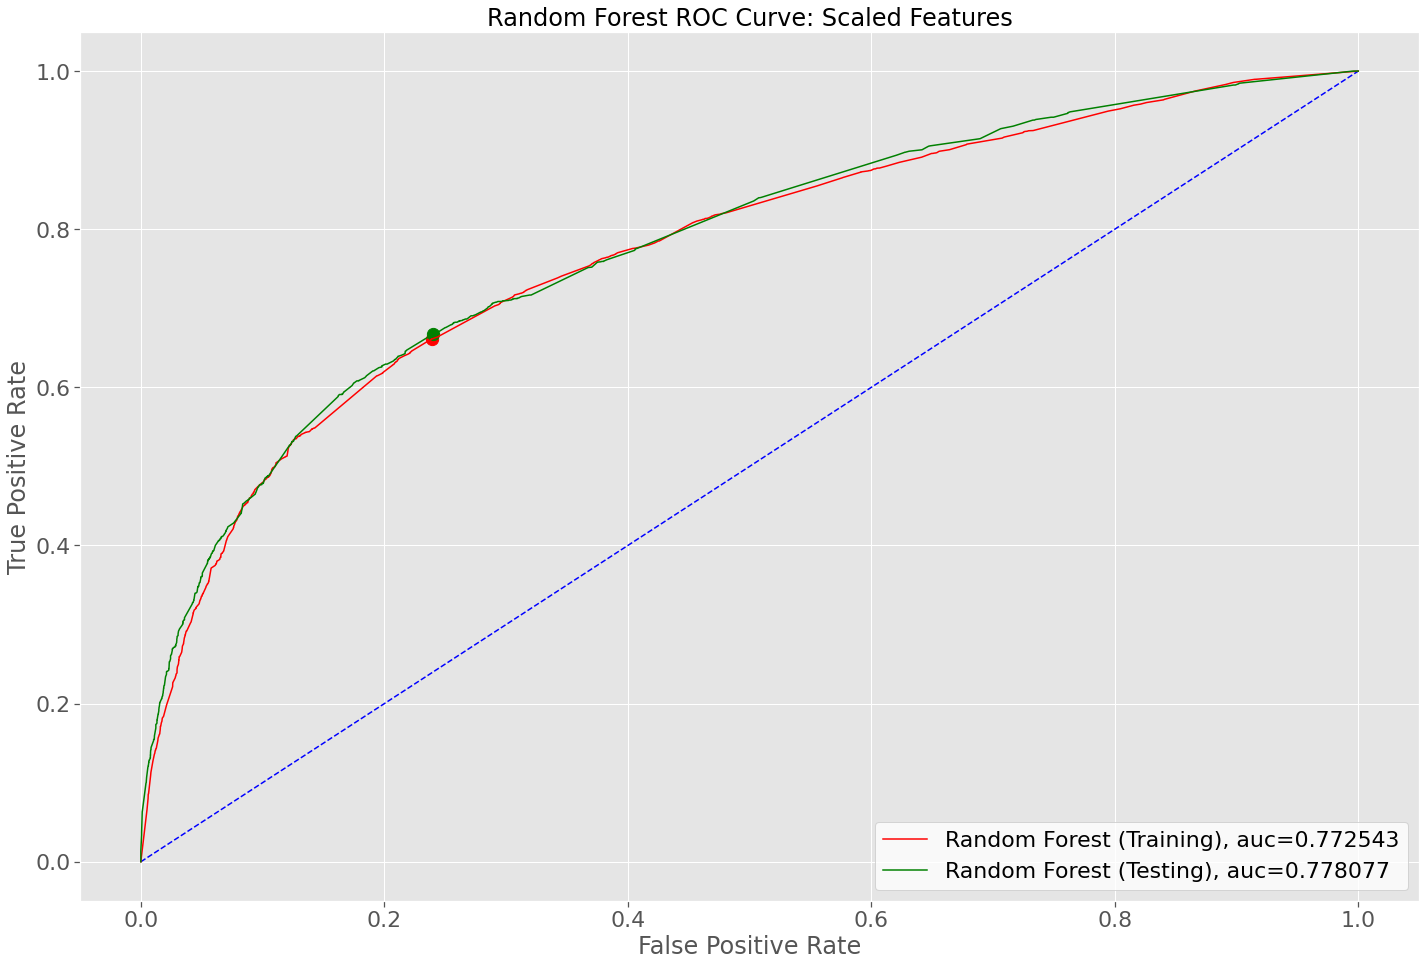

In [ ]:
# Estimate probabilities, and calcualate relevant ROC/AUC scores 
rf_calibrated_classifier_cv_ccd_scaled = CalibratedClassifierCV(dt_ccd_scaled) 
rf_calibrated_classifier_cv_ccd_scaled.fit(X_scaled_train, y_scaled_train)
y_scaled_pred_proba_train = rf_calibrated_classifier_cv_ccd_scaled.predict_proba(X_scaled_train)[::,1]

fpr_scaled_train, tpr_scaled_train, threshold_scaled_train  = metrics.roc_curve(y_scaled_train, y_scaled_pred_proba_train)
auc_scaled_train          = metrics.roc_auc_score(y_scaled_train, y_scaled_pred_proba_train)

rf_calibrated_classifier_cv_ccd_scaled.fit(X_scaled_test, y_scaled_test)
y_scaled_pred_proba_test  = rf_calibrated_classifier_cv_ccd_scaled.predict_proba(X_scaled_test)[::,1]
fpr_scaled_test, tpr_scaled_test, threshold_scaled_test = metrics.roc_curve(y_scaled_test, y_scaled_pred_proba_test)
auc_scaled_test           = metrics.roc_auc_score(y_scaled_test, y_scaled_pred_proba_test)

# Calculate the geometric mean for each threshold for the training and testing subsamples
vec_gmeans_scaled_train   = np.sqrt(tpr_scaled_train * (1-fpr_scaled_train))
vec_gmeans_scaled_test    = np.sqrt(tpr_scaled_test * (1-fpr_scaled_test))

# locate the index of the largest g-mean
ix_scaled_train = np.argmax(vec_gmeans_scaled_train)
ix_scaled_test  = np.argmax(vec_gmeans_scaled_test)

# Summarize the results
print('Training (Scaled features):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_scaled_train[ix_scaled_train], vec_gmeans_scaled_train[ix_scaled_train]))
print(100*'-')
print('Testing (Scaled features):')
print('Best threshold = %f, Geometric mean = %.3f' % (threshold_scaled_test[ix_scaled_test], vec_gmeans_scaled_test[ix_scaled_test]))
print(100*'-')

# Plot the ROC curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [0, 1], 'b--')
plt.plot(fpr_scaled_train, tpr_scaled_train, 'r-', label='Random Forest (Training), auc='+str(round(auc_scaled_train,6)))
plt.plot(fpr_scaled_test, tpr_scaled_test, 'g-', label='Random Forest (Testing), auc='+str(round(auc_scaled_test,6)))
plt.scatter(fpr_scaled_train[ix_scaled_train], tpr_scaled_train[ix_scaled_train], marker='o', color='red', s=150)
plt.scatter(fpr_scaled_test[ix_scaled_test], tpr_scaled_test[ix_scaled_test], marker='o', color='green', s=150)
plt.legend(loc=4, facecolor='white')
plt.xlabel('False Positive Rate', size=24)
plt.ylabel('True Positive Rate', size=24)
plt.title('Random Forest ROC Curve: Scaled Features', size=24)
plt.show()

model_summary_rf = {'Model name': 'Random Forest', 'AUC Train': auc_scaled_train, 'AUC Test': auc_scaled_test}

Training (Scaled features):
Best threshold = 0.230846, F1 score = 0.540
----------------------------------------------------------------------------------------------------
Testing (Scaled features):
Best threshold = 0.234123, F1 score = 0.546
----------------------------------------------------------------------------------------------------


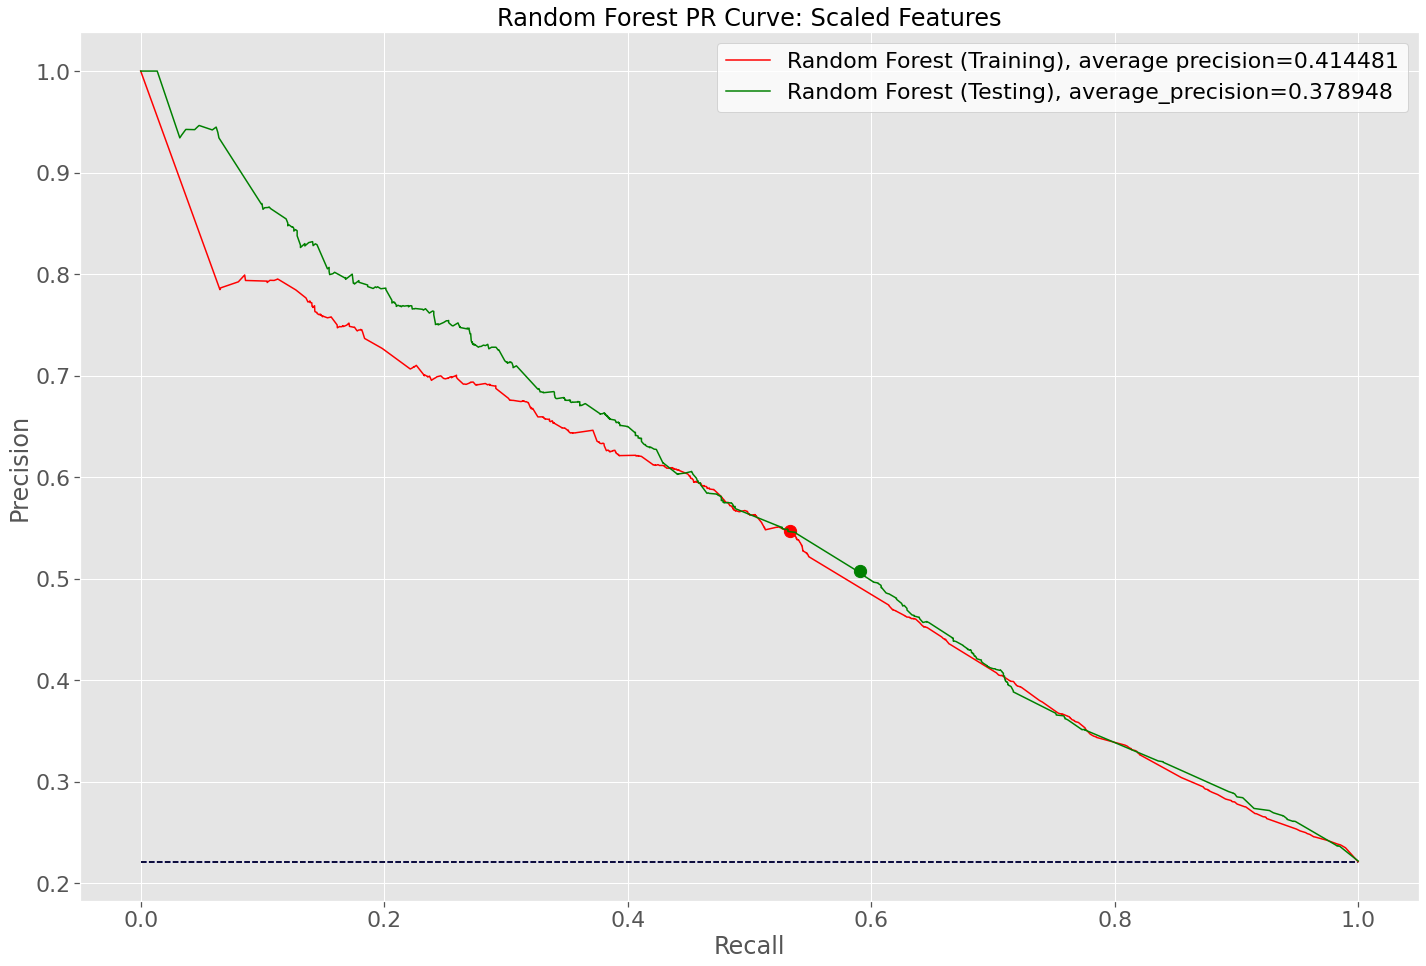

In [ ]:
# Calculate the precision and recall for different values of threshold in the training and testing subsamples
precision_scaled_train, recall_scaled_train, threshold_scaled_train = metrics.precision_recall_curve(y_scaled_train, y_scaled_pred_proba_train)
average_precision_scaled_train = metrics.average_precision_score(y_scaled_train, y_scaled_pred_train)

precision_scaled_test, recall_scaled_test, threshold_scaled_test = metrics.precision_recall_curve(y_scaled_test, y_scaled_pred_proba_test)
average_precision_scaled_test = metrics.average_precision_score(y_scaled_test, y_scaled_pred_test)

# Calculate the F1 score
vec_f1_scaled_train = 2 * precision_scaled_train * recall_scaled_train / (precision_scaled_train + recall_scaled_train)
vec_f1_scaled_test  = 2 * precision_scaled_test * recall_scaled_test / (precision_scaled_test + recall_scaled_test)

# locate the index of the largest F1 score
ix_f1_scaled_train = np.argmax(vec_f1_scaled_train)
ix_f1_scaled_test  = np.argmax(vec_f1_scaled_test)

# Summarize the results
print('Training (Scaled features):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_scaled_train[ix_f1_scaled_train], vec_f1_scaled_train[ix_f1_scaled_train]))
print(100*'-')
print('Testing (Scaled features):')
print('Best threshold = %f, F1 score = %.3f' % (threshold_scaled_test[ix_f1_scaled_test], vec_f1_scaled_test[ix_f1_scaled_test]))
print(100*'-')

# Calculate benchmark values for the training and testing subsamples
nopower_scaled_train = len(y_scaled_train[y_scaled_train==1]) / len(y_scaled_train)
nopower_scaled_test = len(y_scaled_test[y_scaled_test==1]) / len(y_scaled_test)

# Plot the PR curve
plt.figure(figsize=(24,16))
plt.plot([0, 1], [nopower_scaled_train, nopower_scaled_train], 'b--')
plt.plot([0, 1], [nopower_scaled_test, nopower_scaled_test], 'k--')
plt.plot(recall_scaled_train, precision_scaled_train, 'r-', label='Random Forest (Training), average precision='+str(round(average_precision_scaled_train,6)))
plt.plot(recall_scaled_test, precision_scaled_test, 'g-', label='Random Forest (Testing), average_precision='+str(round(average_precision_scaled_test,6)))
plt.scatter(recall_scaled_train[ix_f1_scaled_train], precision_scaled_train[ix_f1_scaled_train], marker='o', color='red', s =150)
plt.scatter(recall_scaled_test[ix_f1_scaled_test], precision_scaled_test[ix_f1_scaled_test], marker='o', color='green', s=150)
plt.legend(loc=1, facecolor='white')
plt.xlabel('Recall', size=24)
plt.ylabel('Precision', size=24)
plt.title('Random Forest PR Curve: Scaled Features', size=24)
plt.show()

model_summary_rf['F1 Train'] = vec_f1_scaled_train[ix_f1_scaled_train]
model_summary_rf['F1 Test'] = vec_f1_scaled_test[ix_f1_scaled_test]
summary = summary.append(model_summary_rf, ignore_index=True)

In [ ]:
summary #Logistic Regression - log regression with standardized features#

Model name  AUC Train  AUC Test  F1 Train   F1 Test
0      Logistic Regression   0.720395  0.710955  0.519526  0.511708
1  Logistic Regression PCA   0.720395  0.710955  0.493983  0.466744
2               Linear SVC   0.692755  0.683367  0.514484  0.507581
3                      KNN        NaN  0.834673       NaN  0.584116
4            Decision Tree   0.777316  0.774753  0.549698  0.536749
5            Random Forest   0.772543  0.778077  0.540442  0.545873

In [ ]:

#the KNN gives the best rezults for AUC test and F1 but has NaN at auc train and f1 train field
#the overall best models apear Random forest and Decision tree with minute diffrences#

#**3**#

In [ ]:
# Import / install relevant Python packages
import numpy as np
from numpy import (where, unique)
import pandas as pd
from pandas import set_option
import datetime as dt
import statsmodels.api as sm
from scipy.stats import (randint, loguniform, multivariate_normal)

from collections import Counter

from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, cross_val_score)

from sklearn.datasets import (make_blobs, make_classification)
from sklearn.metrics import silhouette_samples
from sklearn.cluster import (KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN)
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors

from scipy.cluster.hierarchy import (linkage, dendrogram, set_link_color_palette)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('ggplot')
import seaborn as sns

In [ ]:
data['X6']

0        PAY_0
1            2
2           -1
3            0
4            0
         ...  
29996        0
29997       -1
29998        4
29999        1
30000        0
Name: X6, Length: 30001, dtype: object

In [ ]:
data['X12']

0        BILL_AMT1
1             3913
2             2682
3            29239
4            46990
           ...    
29996       188948
29997         1683
29998         3565
29999        -1645
30000        47929
Name: X12, Length: 30001, dtype: object

In [ ]:
X.index

RangeIndex(start=1, stop=30001, step=1)

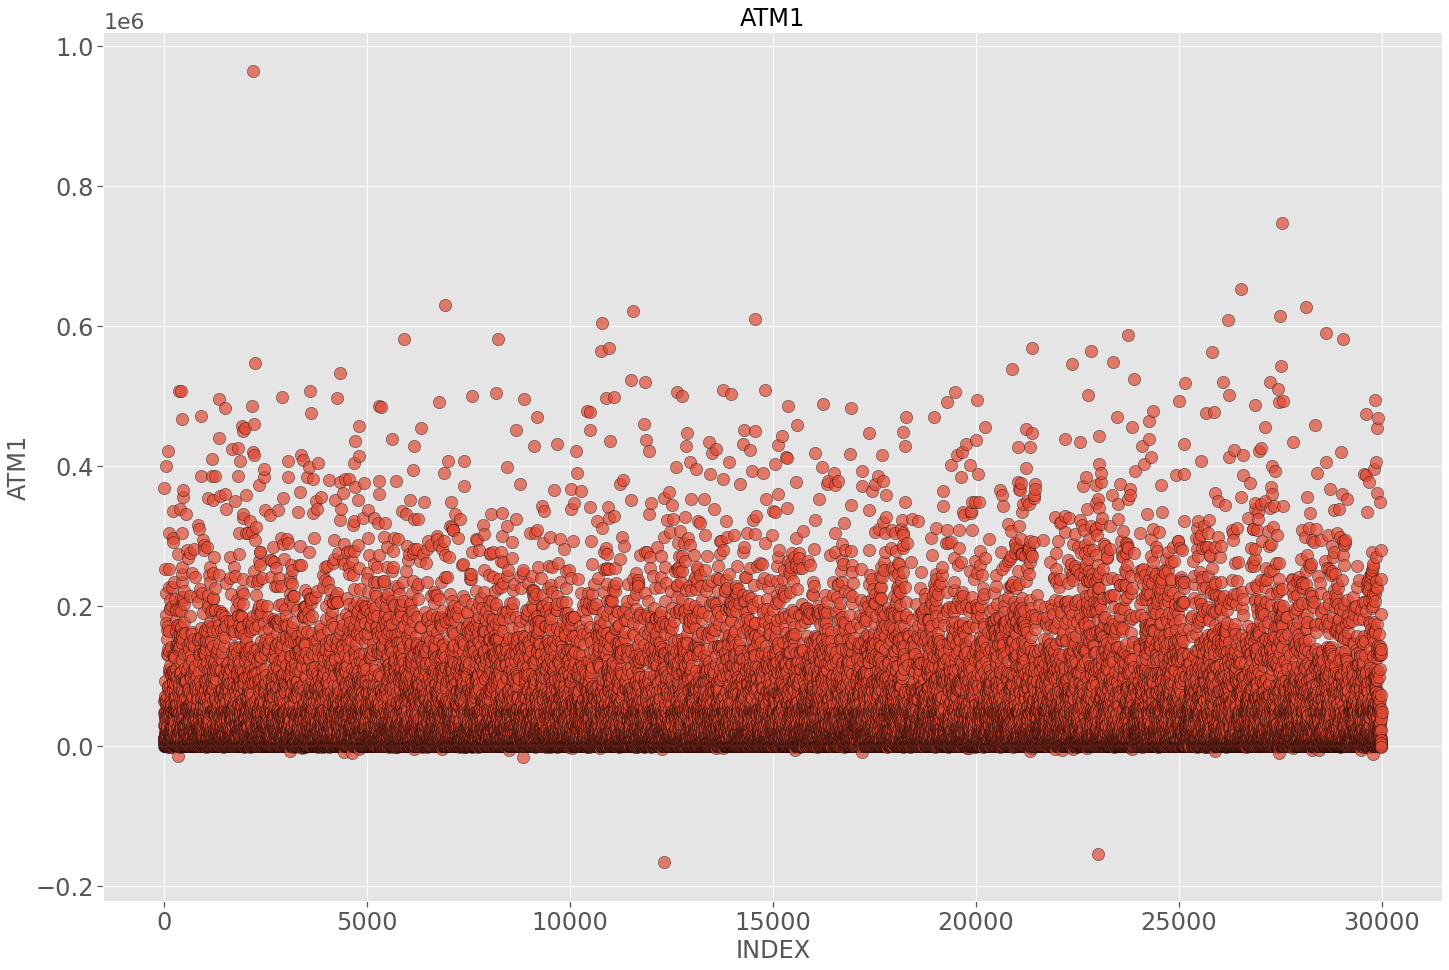

In [ ]:
#lets check out the data on a graph#

plt.figure(figsize=(24,16))
plt.scatter(X.index, 
            X['X12'],
            s=150, 
            edgecolor = 'k',
            alpha=0.7)

plt.title('ATM1', size=24)
plt.xlabel('INDEX', size=24)
plt.ylabel('ATM1', size=24)
plt.xticks(size=24) 
plt.yticks(size=24)   
plt.show()

In [ ]:
#there seems to be some inconcistencies amount of bill statement should not be negative be negative#

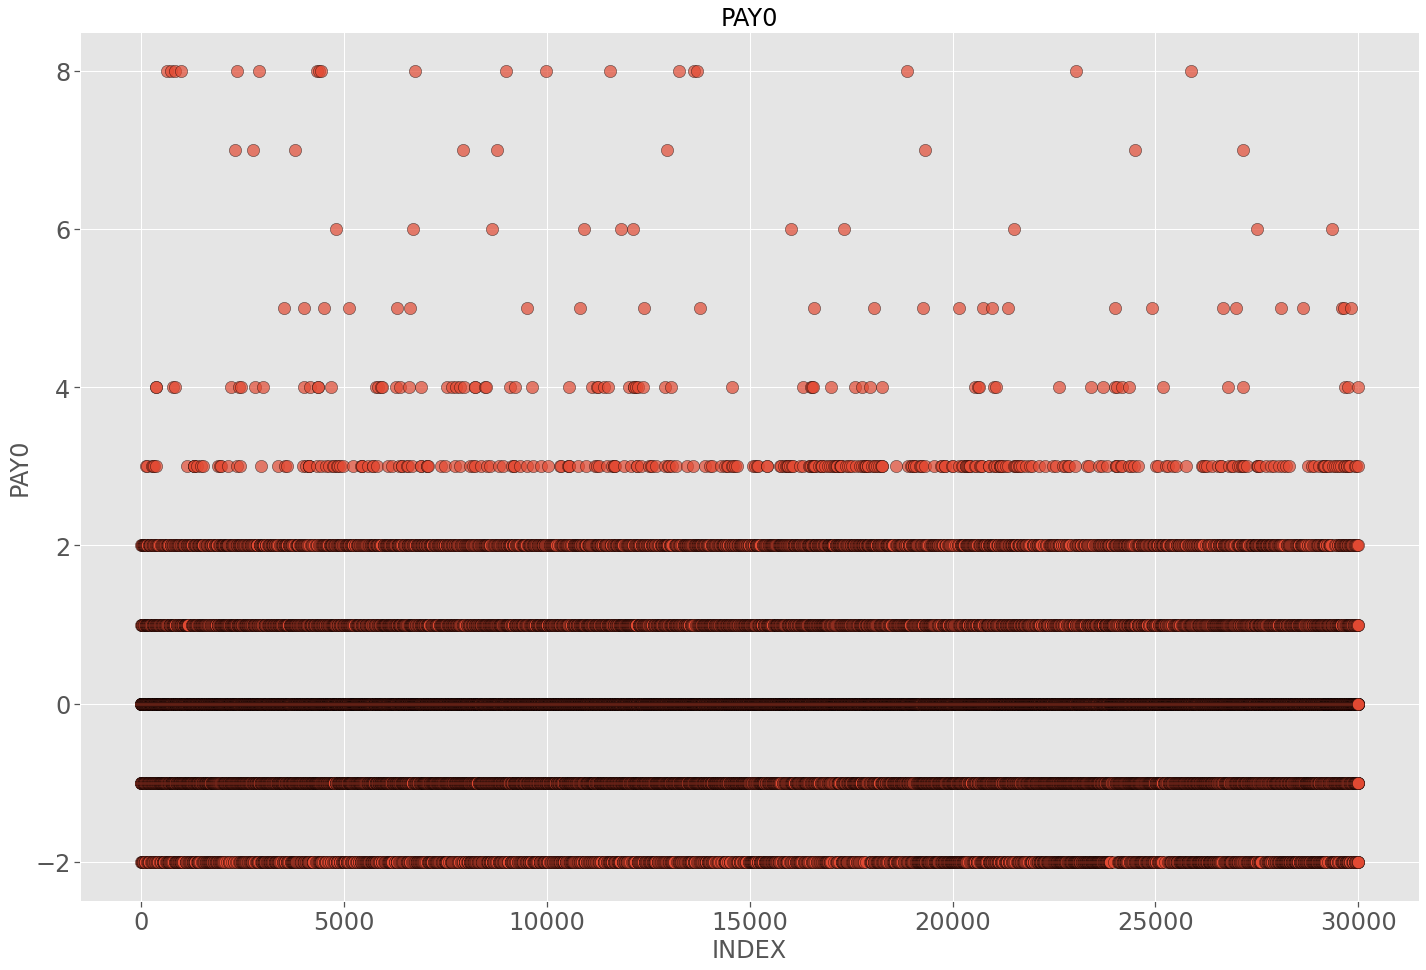

In [ ]:
plt.figure(figsize=(24,16))
plt.scatter(X.index, 
            X['X6'],
            s=150, 
            edgecolor = 'k',
            alpha=0.7)

plt.title('PAY0', size=24)
plt.xlabel('INDEX', size=24)
plt.ylabel('PAY0', size=24)
plt.xticks(size=24) 
plt.yticks(size=24)   
plt.show()

In [ ]:
#A negative balance indicates that your bill was overpaid and that you may be eligible for a refund.#
#we should not take these records in account#

In [ ]:
#data cleanup#
data_for_clustering=X[np.logical_or(X['X6']>0,X['X12']>0)]
#We will proceed to standardize the data#
data_for_clustering=(data_for_clustering - data_for_clustering.mean()) / (data_for_clustering.std()) 


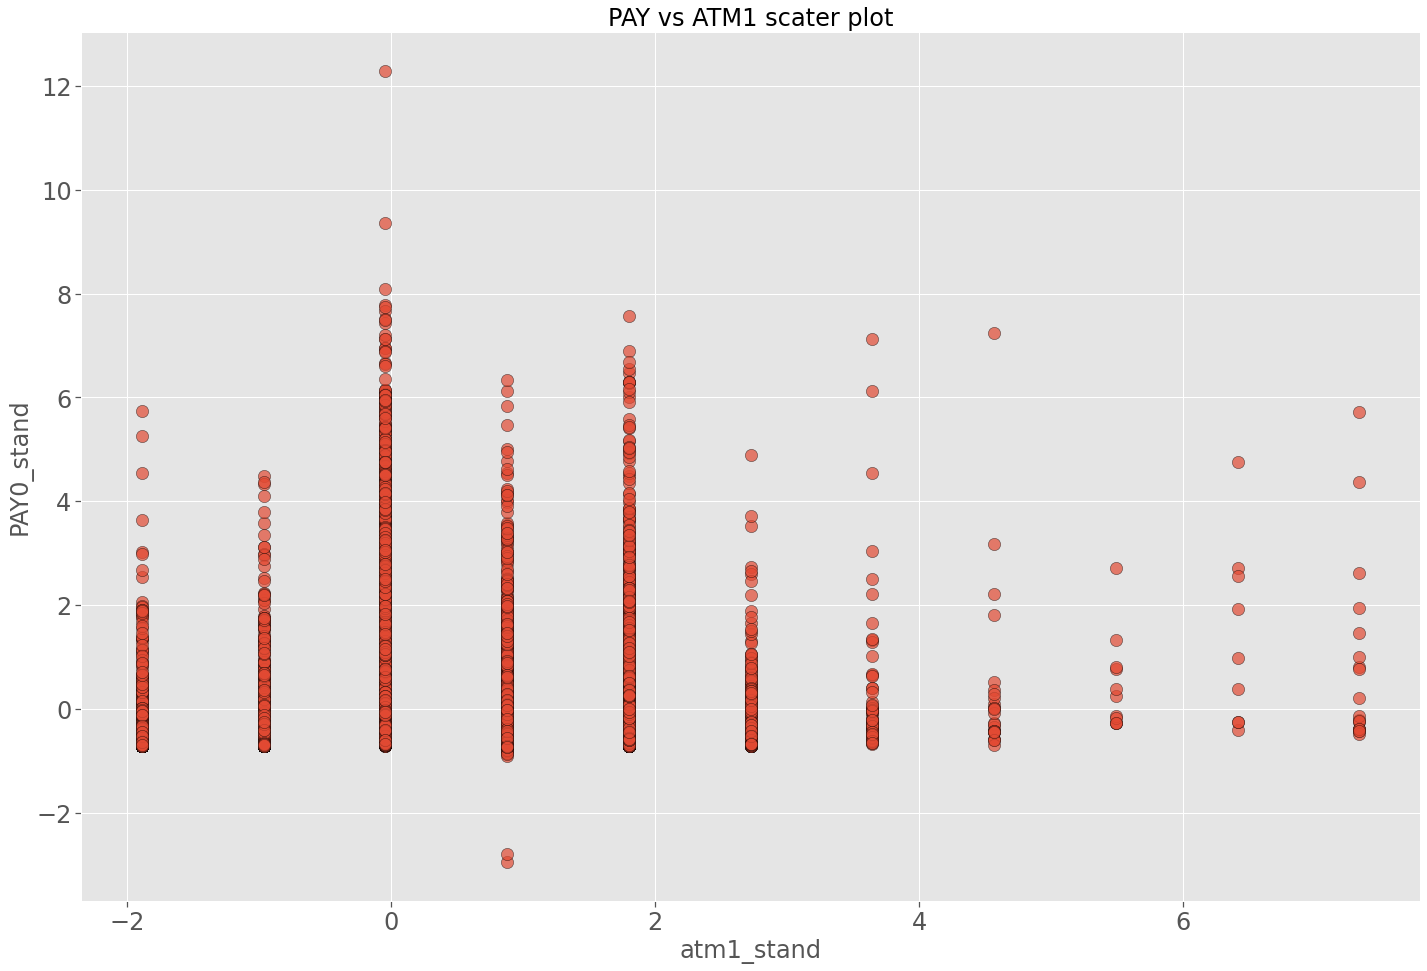

In [ ]:
# Create a scatter plot
plt.figure(figsize=(24,16))
plt.scatter(data_for_clustering['X6'], 
            data_for_clustering['X12'],
            s=150, 
            edgecolor = 'k',
            alpha=0.7)

plt.title('PAY vs ATM1 scater plot', size=24)
plt.xlabel('atm1_stand', size=24)
plt.ylabel('PAY0_stand', size=24)
plt.xticks(size=24) 
plt.yticks(size=24)   
plt.show()

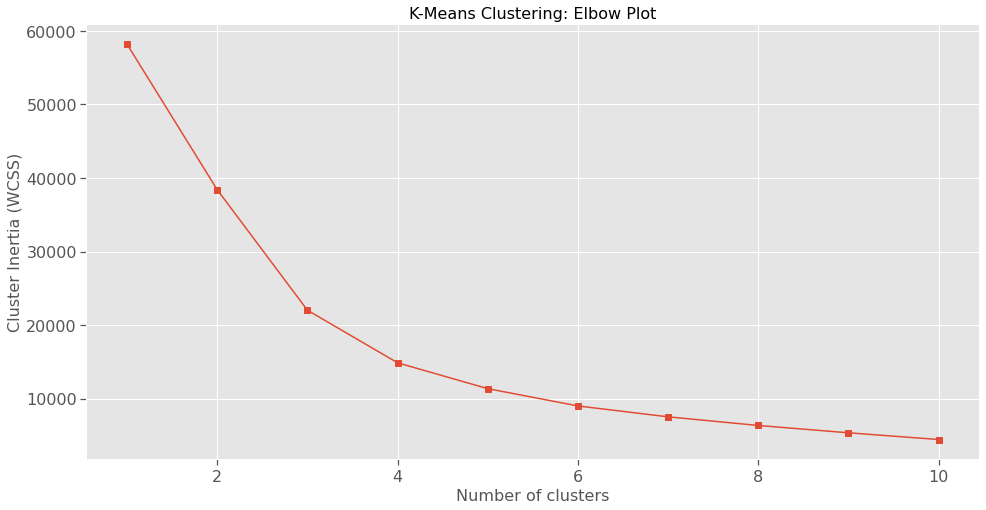

In [ ]:
#1 K-means Clustering#
# Define the bounds for the number of clusters
n_clusters_lb = 1
n_clusters_ub = 11

# Initiate the cluster inertia (WCSS) vector 
kmeans_interia = []

# Fit K-means model for different numbers of clusters
for ix_clusters in range(n_clusters_lb, n_clusters_ub):
    kmeans_model = KMeans(n_clusters=ix_clusters,
                          init='k-means++',
                          n_init=10,
                          max_iter=1000,
                          random_state=1)
    kmeans_model.fit(data_for_clustering[['X6','X12']])
    kmeans_interia.append(kmeans_model.inertia_)

# Create the elbow plot
plt.figure(figsize=(16,8))    
plt.plot(range(n_clusters_lb,n_clusters_ub), kmeans_interia, marker='s')
plt.title('K-Means Clustering: Elbow Plot', size=16)
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Cluster Inertia (WCSS)', size=16)
plt.xticks(size=16) 
plt.yticks(size=16)  
plt.show()




In [ ]:
#the curve levels of around 7 clusters#

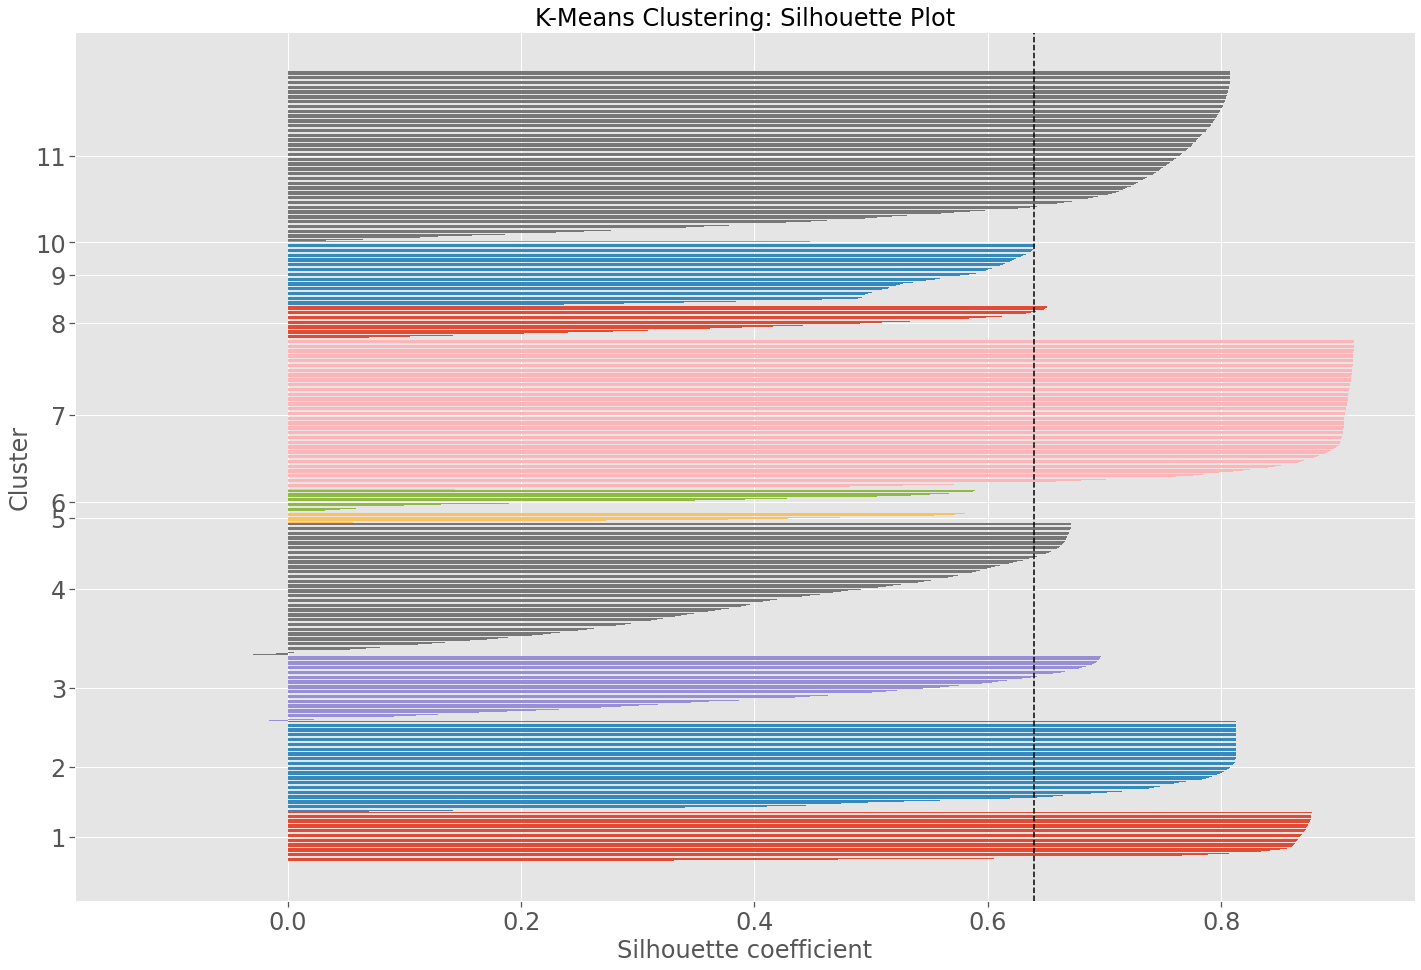

In [ ]:
# Define the key inputs for the K-means model silhoutte plot
n_clusters = 11
n_max_iter = 1000
n_init     = 10
init_type  = 'k-means++'

# Create an instance of the class KMeans, fit the model, and predict cluster memberships
kmeans_model = KMeans(n_clusters=n_clusters,
                      init=init_type,
                      n_init=n_init,
                      max_iter=n_max_iter,
                      random_state=1)
y_pred = kmeans_model.fit_predict(data_for_clustering[['X6','X12']])

# Retrieve and count unique clusters
kmeans_clusters = np.unique(y_pred)
n_clusters      = kmeans_clusters.shape[0]

# Calculate silhouette values for all samples
silhouette_vals = silhouette_samples(data_for_clustering[['X6','X12']], y_pred, metric='euclidean')

# Create the silhouette plot
plt.figure(figsize=(24,16)) 

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for ix_clusters in kmeans_clusters:    
    c_silhouette_vals = silhouette_vals[y_pred == ix_clusters]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=0.7,
             edgecolor='none')
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='k',
            linestyle='--')
plt.yticks(yticks, kmeans_clusters + 1)
plt.xticks(size=24) 
plt.yticks(size=24)
plt.title('K-Means Clustering: Silhouette Plot', size=24)
plt.ylabel('Cluster', size=24)
plt.xlabel('Silhouette coefficient', size=24)
plt.show()    

In [ ]:
#thec silhoute coefficient should be as close to one as posible #

In [ ]:
#it would seem that both methods agree on the optimal number of clusters that is 7#

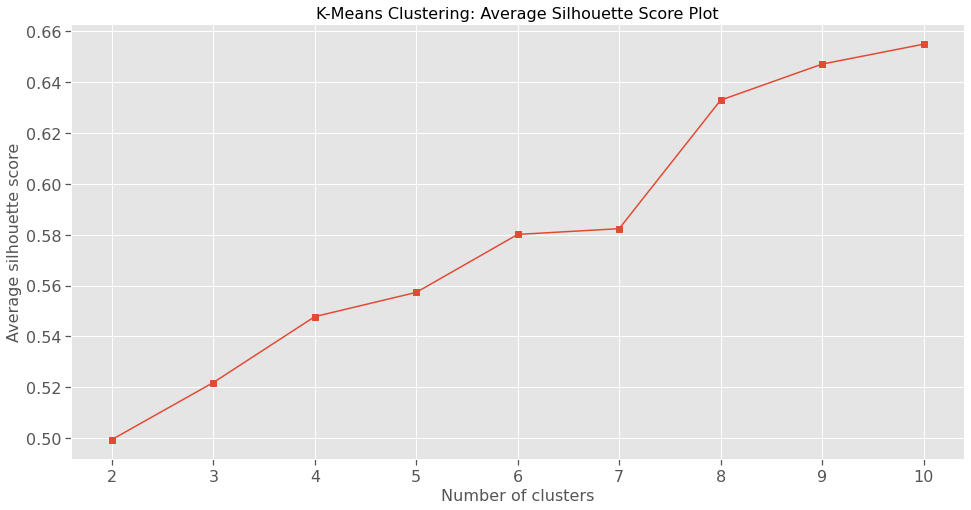

In [ ]:
# Define the avrage Silhouette Score
n_clusters_lb = 2
n_clusters_ub = 11

# Initiate the average silhouette score vector 
kmeans_silhouette_avg = []

# Fit K-means model for different numbers of clusters
for ix_clusters in range(n_clusters_lb, n_clusters_ub):
    kmeans_model = KMeans(n_clusters=ix_clusters,
                          init='k-means++',
                          n_init=10,
                          max_iter=1000,
                          random_state=1)
    y_pred = kmeans_model.fit_predict(data_for_clustering[['X6','X12']])
    silhouette_vals = silhouette_samples(data_for_clustering[['X6','X12']], y_pred, metric='euclidean')
    kmeans_silhouette_avg.append(np.mean(silhouette_vals))

# Create the elbow plot
plt.figure(figsize=(16,8))    
plt.plot(range(n_clusters_lb,n_clusters_ub), kmeans_silhouette_avg, marker='s')
plt.title('K-Means Clustering: Average Silhouette Score Plot', size=16)
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Average silhouette score', size=16)
plt.xticks(size=16) 
plt.yticks(size=16)  
plt.show()

In [ ]:
# Define the cross-validation approach
n_cv_kmeans = 5

# Define the maximum number of iterations
n_max_iter = 500
init_type  = 'k-means++'

# Create an instance of the class KMeans
kmeans_model = KMeans(init=init_type,
                      max_iter=n_max_iter)

# Define the search space for the hyperparameters
search_space = dict()
search_space['n_clusters'] = [2, 3, 4, 5, 6, 7, 8, 9, 10]
search_space['n_init']     = [10, 20, 30, 40, 50]

# Create an instance of the class GridSearchCV with desired characteristics
kmeans_grid_search_cv = GridSearchCV(estimator=kmeans_model, 
                                     param_grid=search_space, 
                                     scoring='adjusted_mutual_info_score', 
                                     cv=n_cv_kmeans, 
                                     n_jobs=-1)

# Run the search algorithm and summarize resuts 
kmeans_grid_search_cv.fit(data_for_clustering[['X6','X12']].to_numpy())

print(f'Best score: {kmeans_grid_search_cv.best_score_:.4f}')
print('Best hyperparameters: %s' % kmeans_grid_search_cv.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


Best score: nan
Best hyperparameters: {'n_clusters': 2, 'n_init': 10}


In [ ]:
#we will stay with the previous conclusion of 7#
#it seems the algoritham encounters some computational problems #

In [ ]:
# Gaussian Mixture Models#

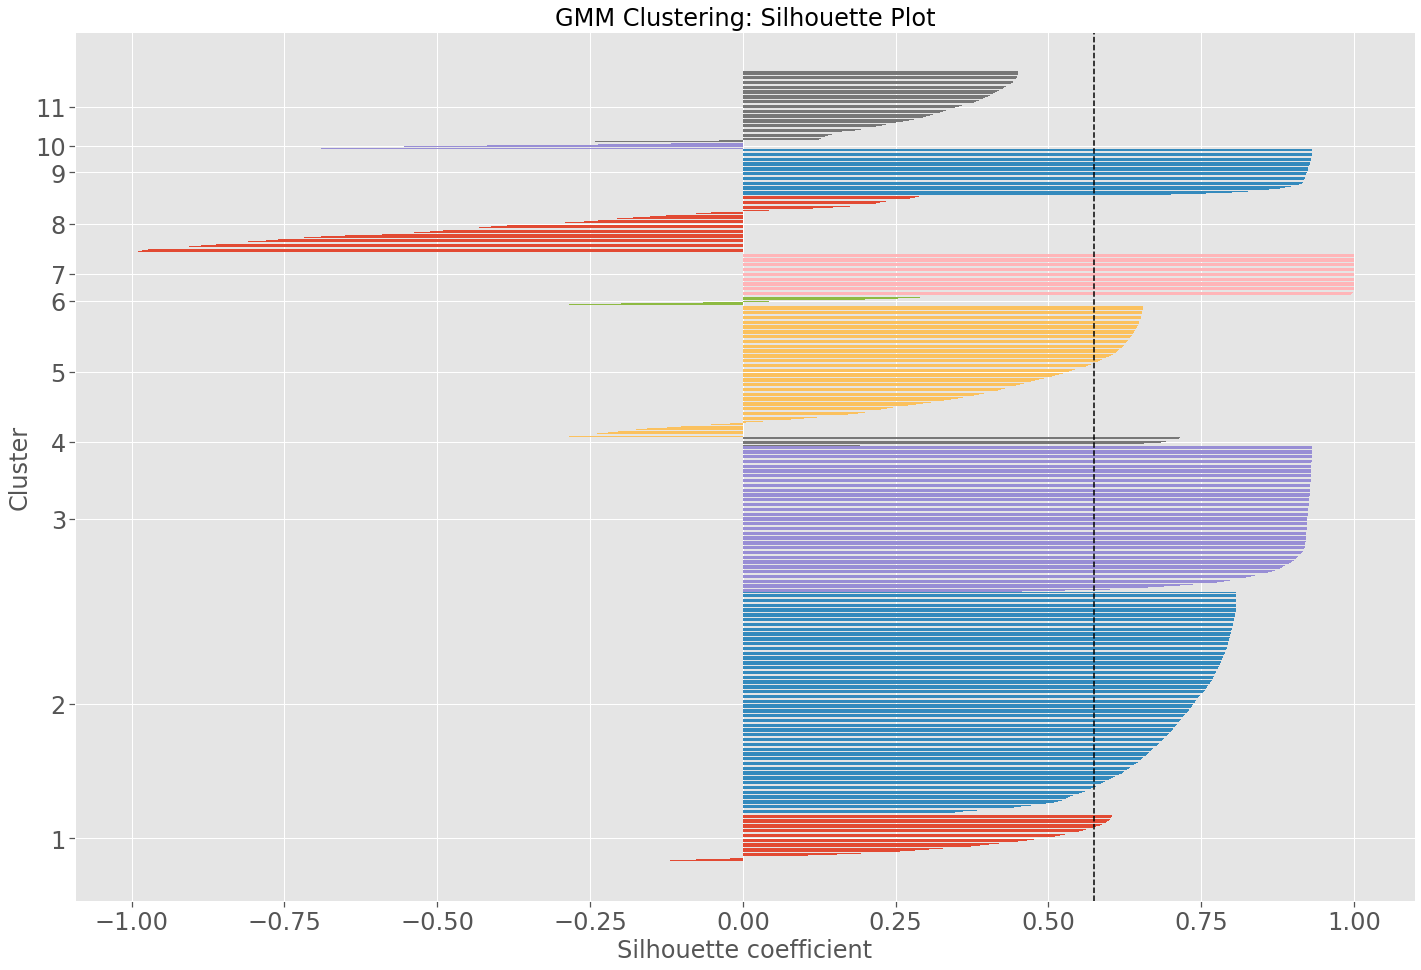

In [ ]:
# Define the key inputs for the GMM
n_components = 11
n_init       = 10
random_state = 1

# Create an instance of the class GaussianMixture, fit the model, and predict the cluster membership
gmm_model = GaussianMixture(n_components=n_components,
                            n_init=n_init,
                            random_state=random_state)
y_pred = gmm_model.fit_predict(data_for_clustering[['X6','X12']])

# Retrieve and count unique clusters
gmm_clusters = np.unique(y_pred)
n_clusters   = gmm_clusters.shape[0]

# Calculate silhouette values for all samples
silhouette_vals = silhouette_samples(data_for_clustering[['X6','X12']], y_pred, metric='euclidean')

# Create the silhouette plot
plt.figure(figsize=(24,16)) 

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for ix_clusters in gmm_clusters:    
    c_silhouette_vals = silhouette_vals[y_pred == ix_clusters]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=0.7,
             edgecolor='none')
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='k',
            linestyle='--')
plt.yticks(yticks, gmm_clusters + 1)
plt.xticks(size=24) 
plt.yticks(size=24)
plt.title('GMM Clustering: Silhouette Plot', size=24)
plt.ylabel('Cluster', size=24)
plt.xlabel('Silhouette coefficient', size=24)
plt.show()

In [ ]:
#it seem that we are seing again 7 for the number of clusters but this time the GMM seems to give a much better silhoutte score#

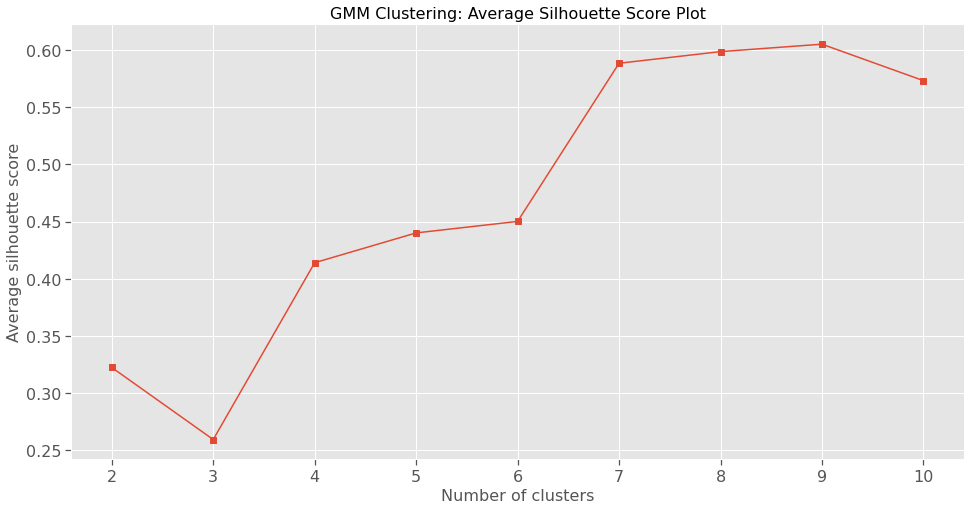

In [ ]:
# Define the bounds for the number of clusters
n_clusters_lb = 2
n_clusters_ub = 11

# Initiate the average silhouette score vector 
gmm_silhouette_avg = []

# Fit K-means model for different numbers of clusters
for ix_clusters in range(n_clusters_lb, n_clusters_ub):
    gmm_model = GaussianMixture(n_components=ix_clusters,
                                n_init=10,
                                random_state=1)
    y_pred = gmm_model.fit_predict(data_for_clustering[['X6','X12']])
    silhouette_vals = silhouette_samples(data_for_clustering[['X6','X12']], y_pred, metric='euclidean')
    gmm_silhouette_avg.append(np.mean(silhouette_vals))

# Create the elbow plot
plt.figure(figsize=(16,8))    
plt.plot(range(n_clusters_lb,n_clusters_ub), gmm_silhouette_avg, marker='s')
plt.title('GMM Clustering: Average Silhouette Score Plot', size=16)
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Average silhouette score', size=16)
plt.xticks(size=16) 
plt.yticks(size=16)  
plt.show()

In [ ]:
#the avrage score levels out at 7 with not much improvement after#

Best AIC score: -228836.37
Optimal number of clusters: 10
----------------------------------------------------------------------------------------------------
Best BIC score: -228347.96
Optimal number of clusters: 10
----------------------------------------------------------------------------------------------------


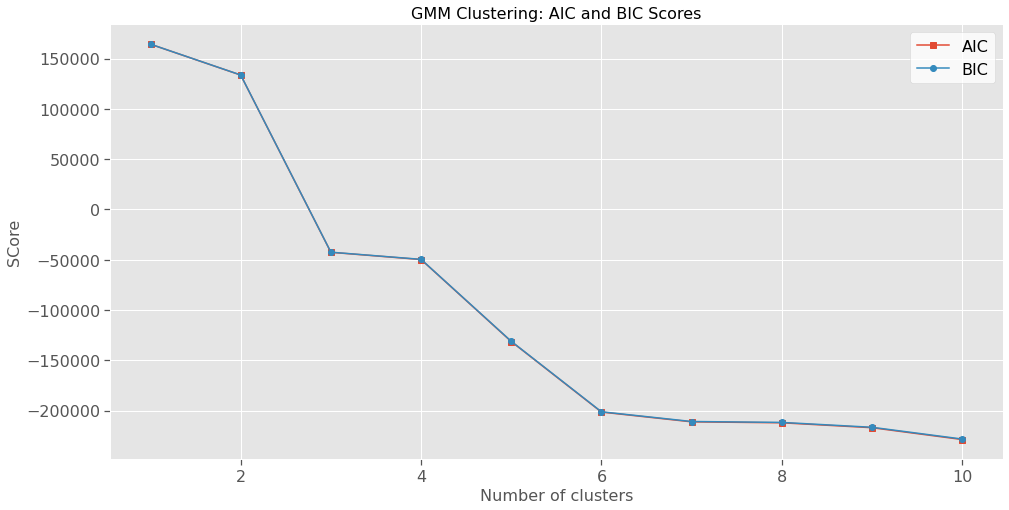

In [ ]:
#AIC and BIC
n_clusters_lb = 1
n_clusters_ub = 11

# Initiate the vectors of AIC and BIC scores
gmm_aic = []
gmm_bic = []

# Fit GMM model for different numbers of clusters
for ix_clusters in range(n_clusters_lb, n_clusters_ub):
    gmm_model = GaussianMixture(n_components=ix_clusters,
                                n_init=10,
                                random_state=1)
    gmm_model.fit(data_for_clustering[['X6','X12']])
    
    gmm_aic.append(gmm_model.aic(data_for_clustering[['X6','X12']]))
    gmm_bic.append(gmm_model.bic(data_for_clustering[['X6','X12']]))

# Display the key information       
print(f'Best AIC score: {round(min(gmm_aic),2)}')
print(f'Optimal number of clusters: {gmm_aic.index(min(gmm_aic))+1}') 
print(100*'-')
print(f'Best BIC score: {round(min(gmm_bic),2)}')
print(f'Optimal number of clusters: {gmm_bic.index(min(gmm_bic))+1}') 
print(100*'-')
    
# Create the elbow plot
plt.figure(figsize=(16,8))    
plt.plot(range(n_clusters_lb,n_clusters_ub), gmm_aic, marker='s', label='AIC')
plt.plot(range(n_clusters_lb,n_clusters_ub), gmm_bic, marker='o', label='BIC')
plt.legend(fontsize=16, facecolor='white')
plt.title('GMM Clustering: AIC and BIC Scores', size=16)
plt.xlabel('Number of clusters', size=16)
plt.ylabel('SCore', size=16)
plt.xticks(size=16) 
plt.yticks(size=16)  
plt.show()

In [ ]:
#here the algoritham sugests 10 but from the chart we can see that the curves level of after 7 clusters#

In [ ]:
#3 Hierarchical Clustering#

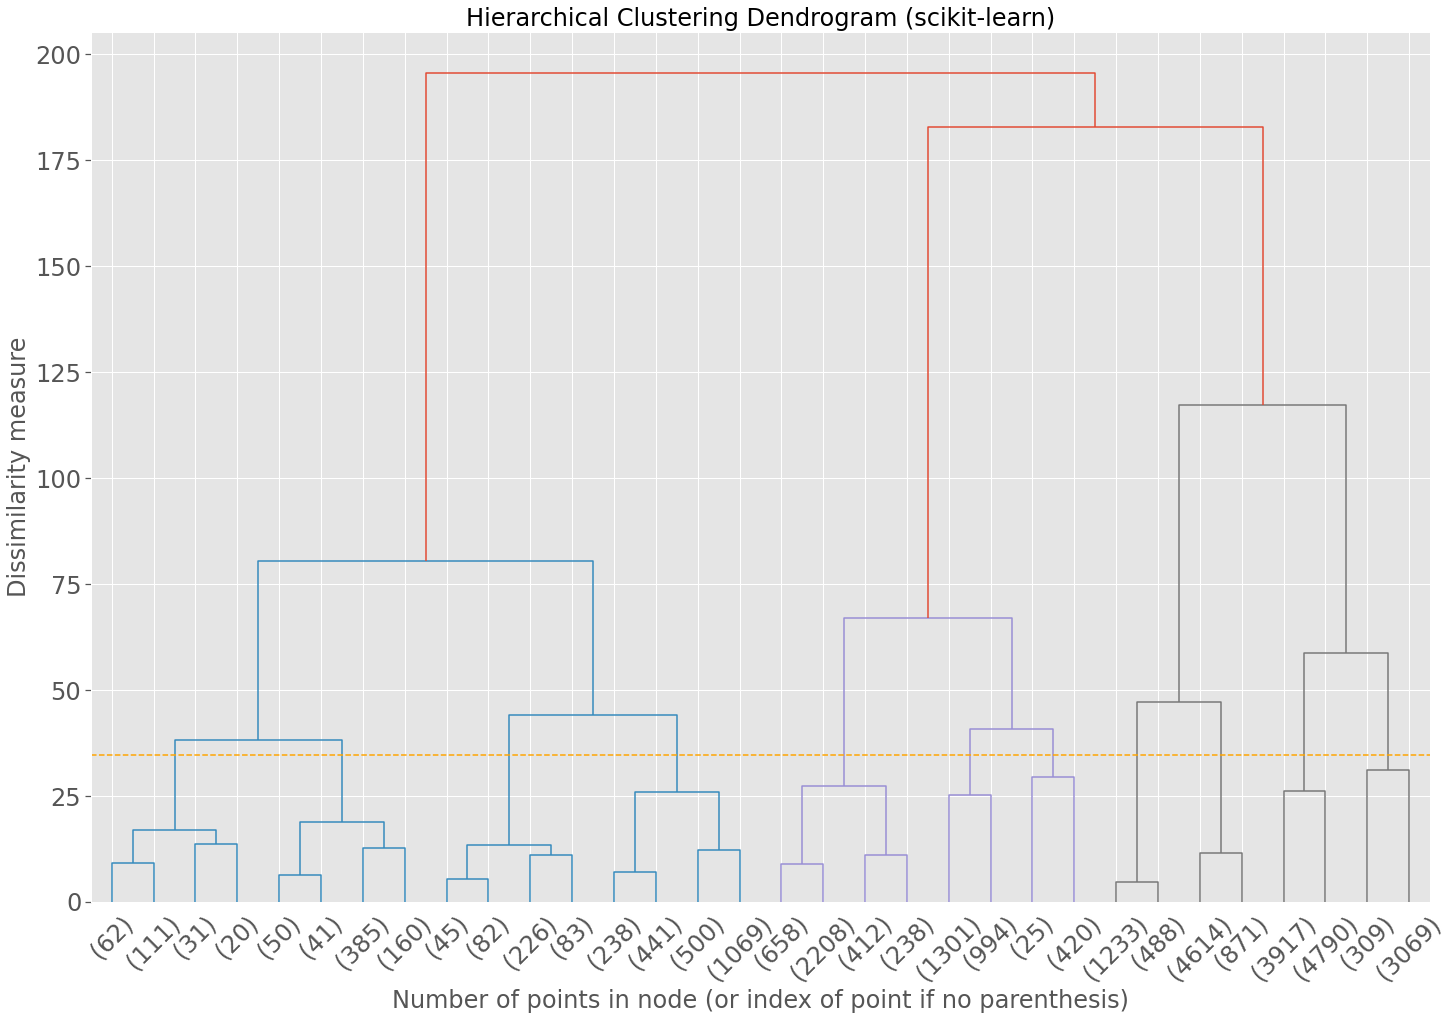

In [ ]:
# Define the key inputs for the AgglomerativeClustering model
distance_threshold = 0
n_clusters         = 11
linkage_type       = 'ward' 

# Create an instance of the class AgglomerativeClustering and fit the model
hca_model = AgglomerativeClustering(linkage=linkage_type, 
                                    distance_threshold=distance_threshold, 
                                    n_clusters=None)
hca_model.fit(data_for_clustering[['X6','X12']])

# Prepare inputs for the linkage matrix
counts = np.zeros(hca_model.children_.shape[0])
n_samples = len(hca_model.labels_)

for i, children in enumerate(hca_model.children_):
    current_count = 0
    for ix_child in children:
        if ix_child < n_samples:
            current_count += 1  
        else:
            current_count += counts[ix_child - n_samples]
    counts[i] = current_count

# Compute the linkage matrix    
linkage_matrix = np.column_stack([hca_model.children_, hca_model.distances_, counts]).astype(float)

# Calculate the distance threshold (cut-off level) given the number of clusters
distances_sorted = np.sort(linkage_matrix[:,2])
distances_sorted = distances_sorted[::-1]
n_color_threshold  = 0.5 * (distances_sorted[n_clusters-2] + distances_sorted[n_clusters-1])

# Specify the color palette
#set_link_color_palette(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])

# Create a dendogram plot (and add the threshold line)
plt.figure(figsize=(24,16))
dendrogram(linkage_matrix, truncate_mode='level', p=4)
#dendrogram(linkage_matrix, truncate_mode='level', p=4, color_threshold=n_color_threshold, above_threshold_color='k')
plt.axhline(n_color_threshold, color='orange', linestyle='--')
plt.title('Hierarchical Clustering Dendrogram (scikit-learn)', size=24)
plt.xlabel('Number of points in node (or index of point if no parenthesis)', size=24)
plt.ylabel('Dissimilarity measure', size=24)
plt.xticks(size=24) 
plt.yticks(size=24)   
plt.show()

# Reset the color palette to the default values
set_link_color_palette(None)

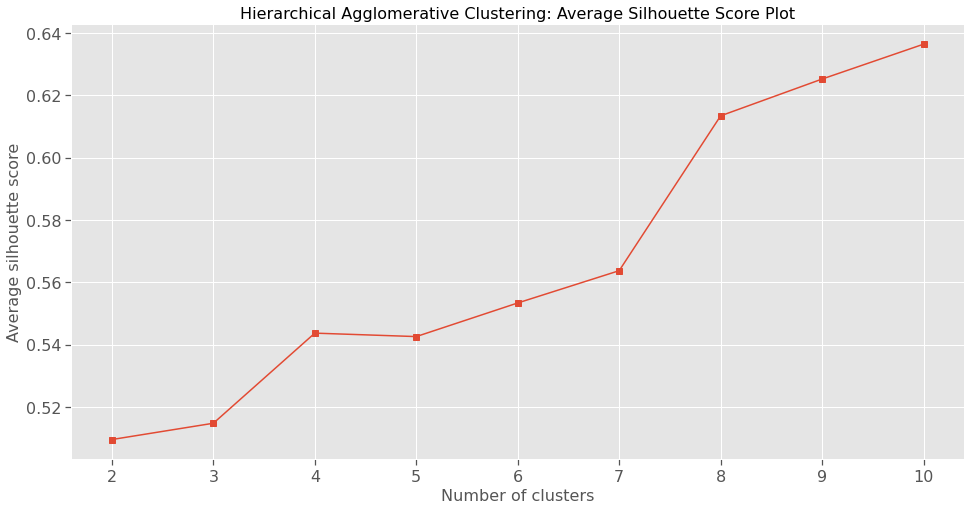

In [ ]:
# Define the bounds for the number of clusters
n_clusters_lb = 2
n_clusters_ub = 11

# Initiate the average silhouette score vector 
hca_silhouette_avg = []

# Fit AgglomerativeClustering model for different numbers of clusters
for ix_clusters in range(n_clusters_lb, n_clusters_ub):
    hca_model = AgglomerativeClustering(n_clusters=ix_clusters,
                                        linkage='ward')
    y_pred = hca_model.fit_predict(data_for_clustering[['X6','X12']])
    silhouette_vals = silhouette_samples(data_for_clustering[['X6','X12']], y_pred, metric='euclidean')
    hca_silhouette_avg.append(np.mean(silhouette_vals))

# Create the elbow plot
plt.figure(figsize=(16,8))    
plt.plot(range(n_clusters_lb,n_clusters_ub), hca_silhouette_avg, marker='s')
plt.title('Hierarchical Agglomerative Clustering: Average Silhouette Score Plot', size=16)
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Average silhouette score', size=16)
plt.xticks(size=16) 
plt.yticks(size=16)  
plt.show()

In [ ]:
#Hierarchical Agglomerative Clustering method is sugesting 8 clusters#

In [ ]:
#DBSCAN#

Best silhouette_score: 0.46
Optimal min_samples: 24
Optimal eps: 0.3
Number of clusters: 8
Number of outliers: 264
----------------------------------------------------------------------------------------------------


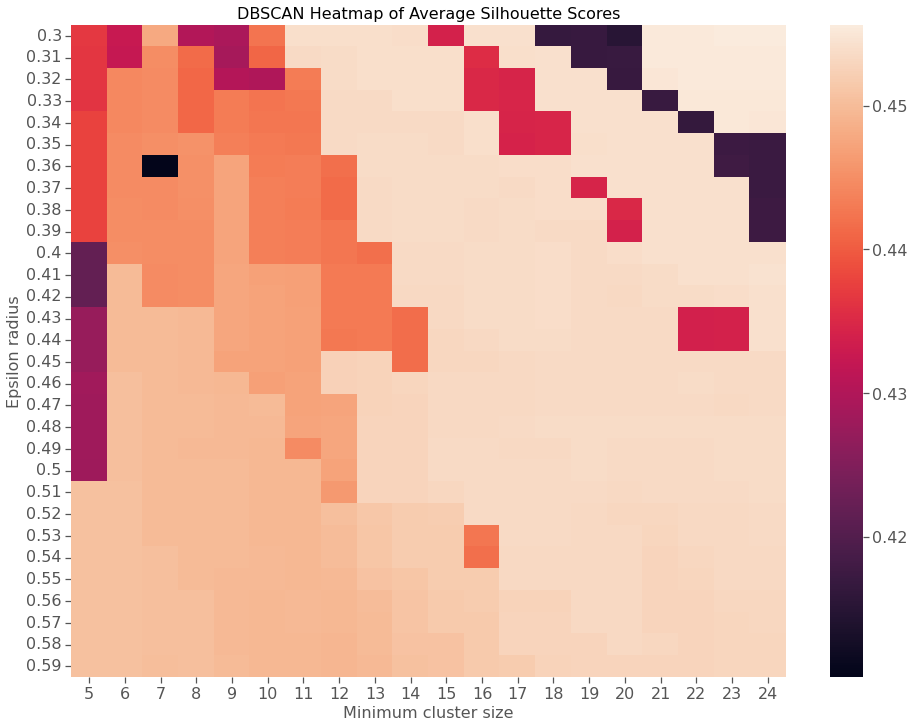

In [ ]:
# Define the bounds for the number of clusters for the entire set (goes on without end)
eps_lb   = 0.3
eps_ub   = 0.6
eps_step = 0.01

min_samples_lb   = 5
min_samples_ub   = 25
min_samples_step = 1

# Fit DBSCAN model for different eps and min_samples values
dbscan_output = []

for ix_eps in np.arange(eps_lb, eps_ub, eps_step):
    dbscan_silhouette_avg_vec = []
    
    for ix_min_samples in np.arange(min_samples_lb, min_samples_ub, min_samples_step):
        dbscan_model = DBSCAN(eps=ix_eps,
                              min_samples=ix_min_samples)
        y_pred = dbscan_model.fit_predict(data_for_clustering[['X6','X12']])
        
        dbscan_silhouette_vals = silhouette_samples(data_for_clustering[['X6','X12']], y_pred, metric='euclidean')
        dbscan_silhouette_avg_vec.append(np.mean(dbscan_silhouette_vals))
        
        dbscan_output.append((ix_min_samples, ix_eps, np.mean(dbscan_silhouette_vals)))
        
    dbscan_silhouette_avg_vec = np.array(dbscan_silhouette_avg_vec)
    
    if ix_eps == eps_lb:
        dbscan_silhouette_avg_mat = dbscan_silhouette_avg_vec
    else:
        dbscan_silhouette_avg_mat = np.vstack((dbscan_silhouette_avg_mat, dbscan_silhouette_avg_vec))

# Display the key information       
optimal_min_samples, optimal_eps, max_silhouette_avg = sorted(dbscan_output, key=lambda x:x[-1])[-1]
print(f'Best silhouette_score: {round(max_silhouette_avg,2)}')
print(f'Optimal min_samples: {optimal_min_samples}')
print(f'Optimal eps: {round(optimal_eps,2)}')  

labels = DBSCAN(min_samples=optimal_min_samples, eps = optimal_eps).fit(data_for_clustering[['X6','X12']]).labels_
clusters = len(Counter(labels))
print(f'Number of clusters: {clusters}')
print(f'Number of outliers: {Counter(labels)[-1]}')
print(100*'-')

# Plot distances
plt.figure(figsize=(16,12))

xticklabels=np.arange(min_samples_lb, min_samples_ub, min_samples_step)
yticklabels=np.around(np.arange(eps_lb, eps_ub, eps_step),2)

dbscan_heatmap = sns.heatmap(dbscan_silhouette_avg_mat, xticklabels=xticklabels, yticklabels=yticklabels)
plt.title('DBSCAN Heatmap of Average Silhouette Scores', size=16)
plt.xlabel('Minimum cluster size', size=16)
plt.ylabel('Epsilon radius', size=16)
plt.xticks(size=16) 
plt.yticks(size=16) 

dbscan_heatmap.set_yticklabels(dbscan_heatmap.get_yticklabels(), rotation=0)

cbar = dbscan_heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

plt.show()

In [ ]:
#Results#
#K-means:the silhoutte plot and elbow plot sugests seven the average silhoute score sugests 8 
#GMM: the silhoutte plot and average silhoute score sugests seven from the graph that minimizes the AIC and BIC it too levels of at seven
#Hierarchical Clustering: average silhoute score sugests eight
#DBSCAN:for the best silhouette score we get eight as the optimal number of clusters

#conclusion:based on the results we recommend 8 as the optimal number of clusters